In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
df=pd.read_csv(r"C:\Users\user\Downloads\Project-Housing--2---1-\Project-Housing_splitted\train.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [113]:
#Testing data
dtest=pd.read_csv(r"C:\Users\user\Downloads\Project-Housing--2---1-\Project-Housing_splitted\test.csv")
dtest

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Checking nulls

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

## Treating nulls

In [72]:
#LotFrontage
df['LotFrontage']=df['LotFrontage'].fillna(df.groupby('LotConfig')['LotFrontage'].transform('mean'))

#MasVnrType
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].agg(pd.Series.mode)[0])
#MasVnrArea
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
#BsmtQual
df['BsmtQual']=df['BsmtQual'].fillna(df.groupby('Foundation')['BsmtQual'].agg(pd.Series.mode)[0])
#BsmtExposure
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].agg(pd.Series.mode)[0])
#BsmtFinType1
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].agg(pd.Series.mode)[0])
#BsmtCond
df['BsmtCond']=df['BsmtCond'].fillna(df.groupby('BsmtFinType1')['BsmtCond'].agg(pd.Series.mode)[0])
#BsmtFinType2
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].agg(pd.Series.mode)[0])

#GarageYrBlt
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].agg(pd.Series.mode)[0])
#GarageType
df['GarageType']=df['GarageType'].fillna(df['GarageType'].agg(pd.Series.mode)[0])
#GarageFinish
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].agg(pd.Series.mode)[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].agg(pd.Series.mode)[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].agg(pd.Series.mode)[0])
df['PoolQC']=df['PoolQC'].fillna(df['PoolQC'].agg(pd.Series.mode)[0])
df['Fence']=df['Fence'].fillna(df['Fence'].agg(pd.Series.mode)[0])
df['MiscFeature']=df['MiscFeature'].fillna(df['MiscFeature'].agg(pd.Series.mode)[0])

In [73]:
#Alley
df['Alley']=df['Alley'].fillna(df['Alley'].agg(pd.Series.mode)[0])

In [74]:
#FireplaceQu
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].agg(pd.Series.mode)[0])

## Analysing relationship between features and label

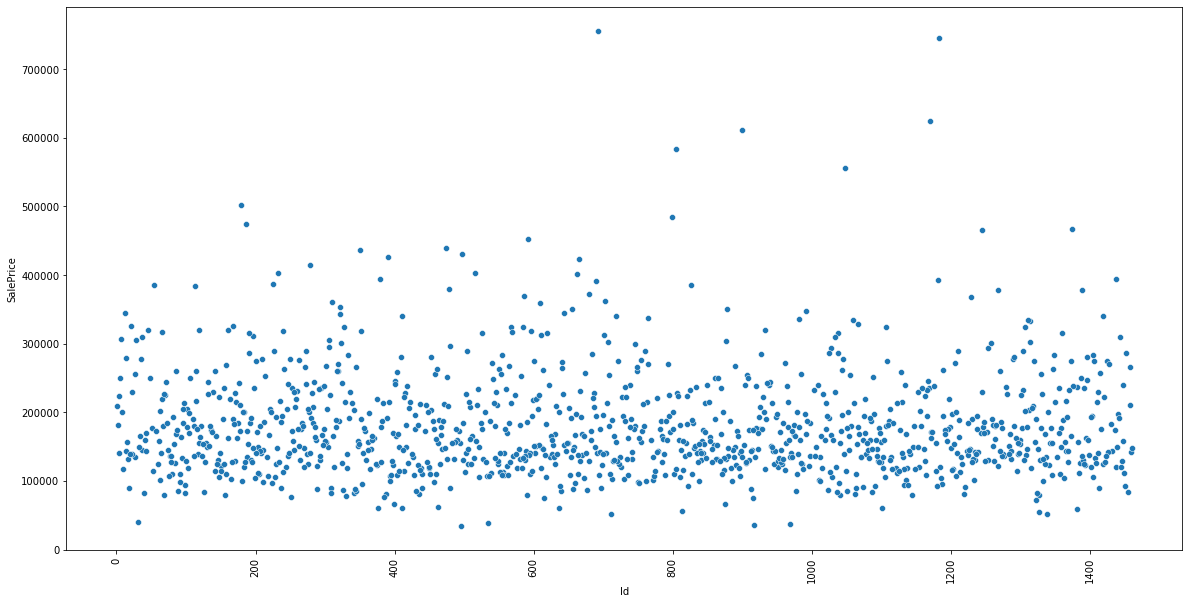

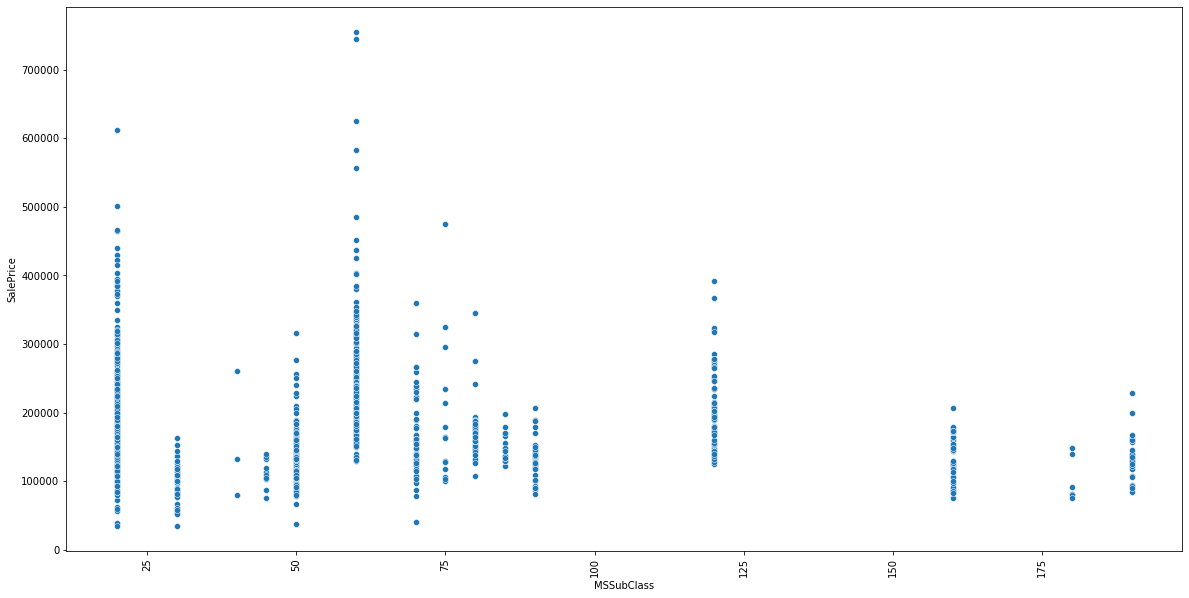

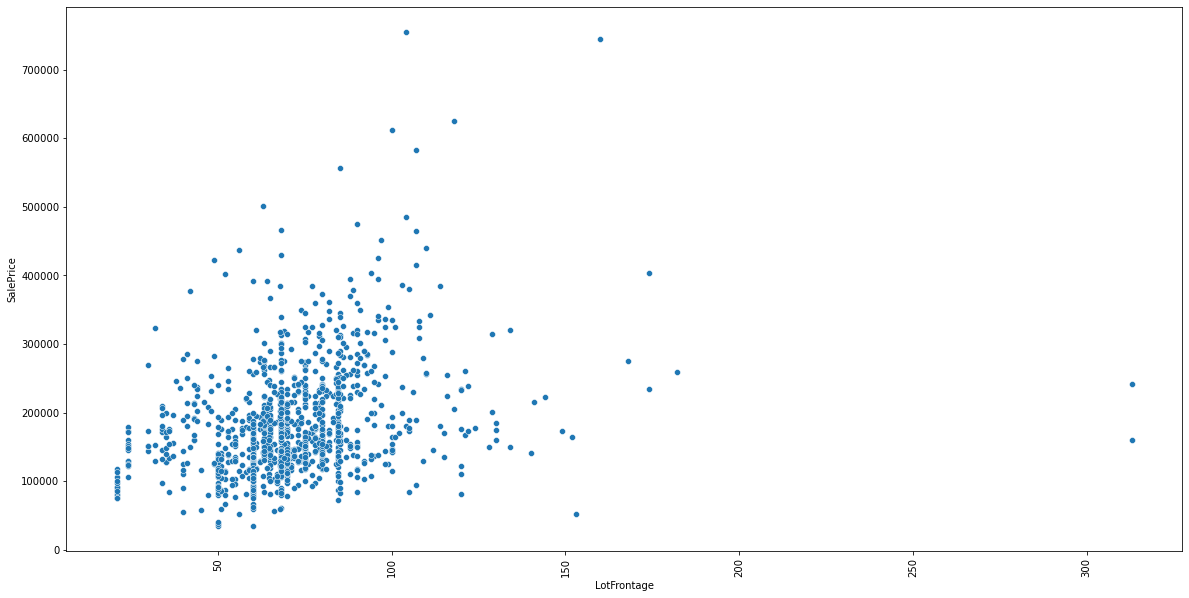

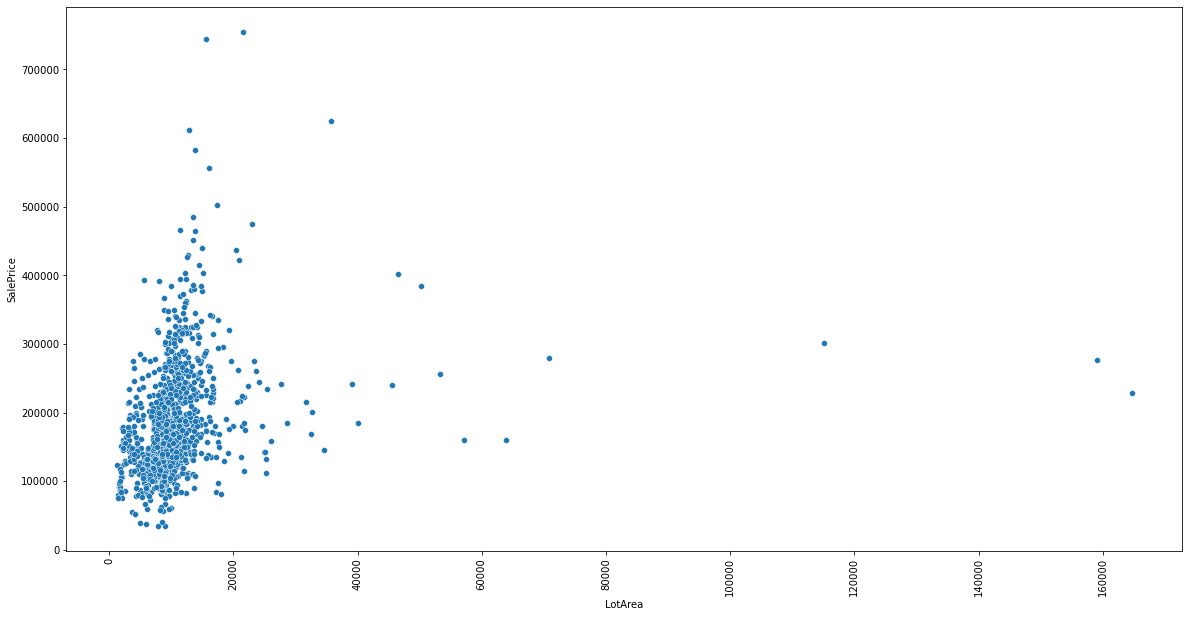

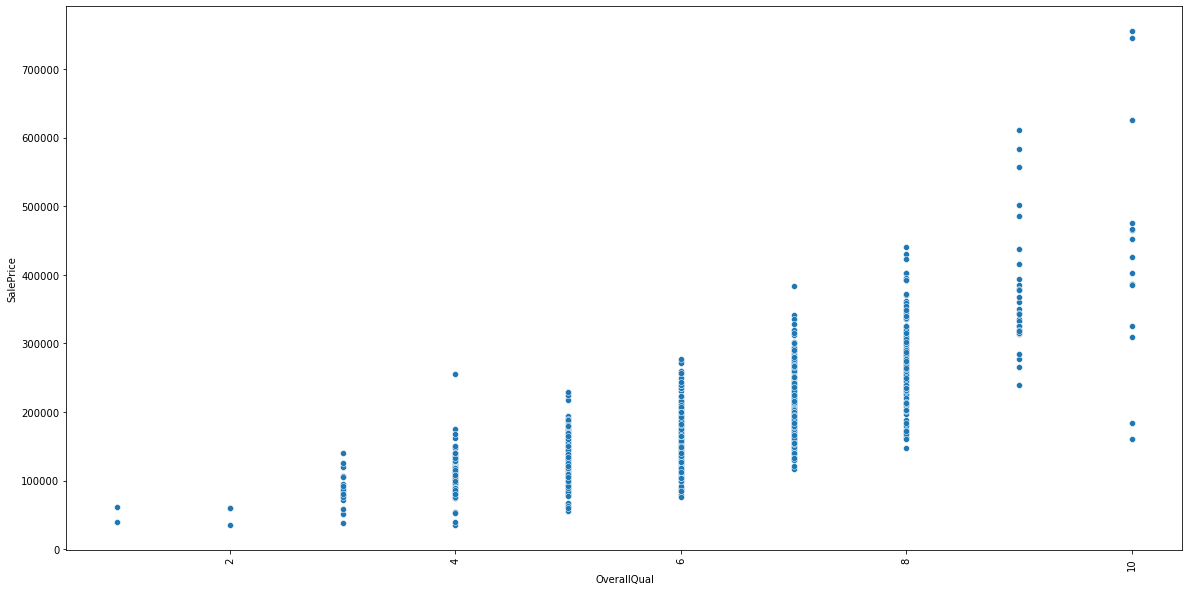

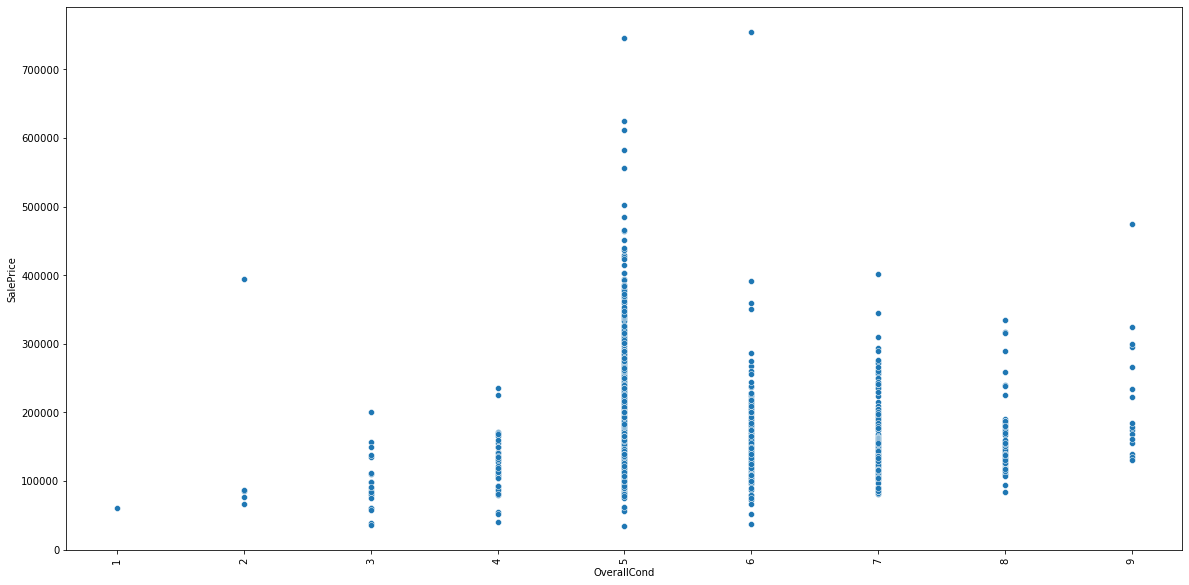

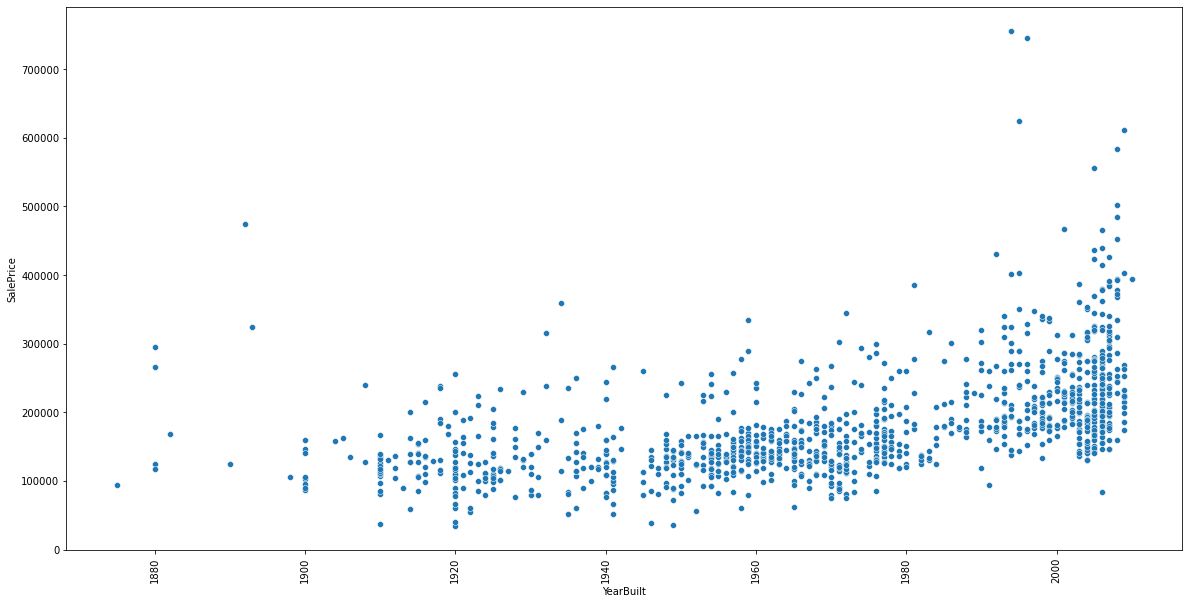

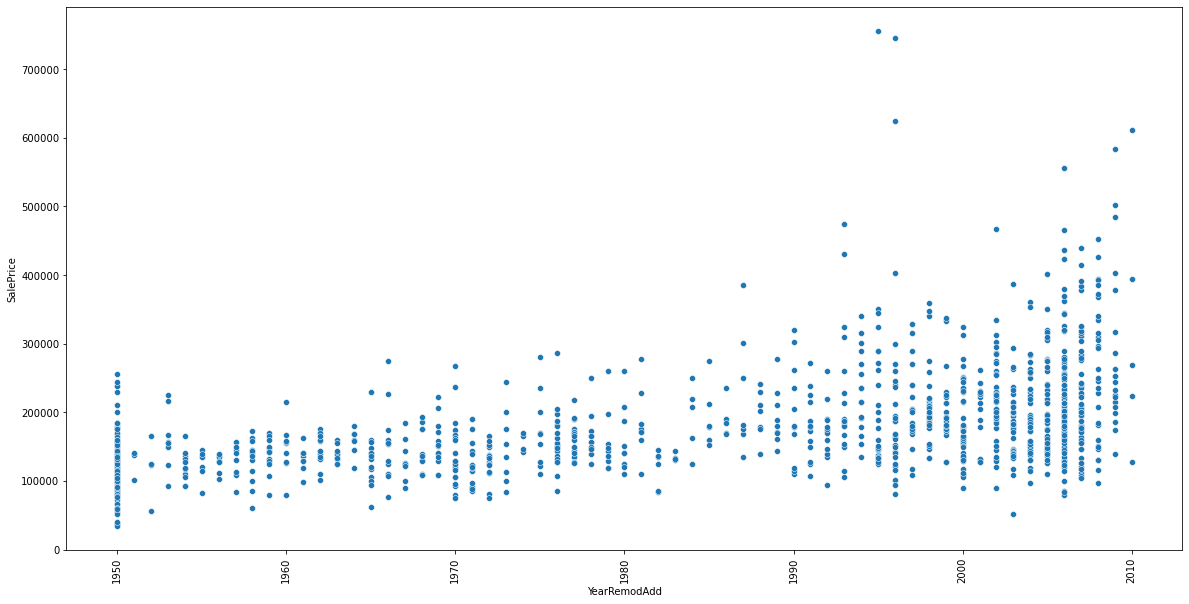

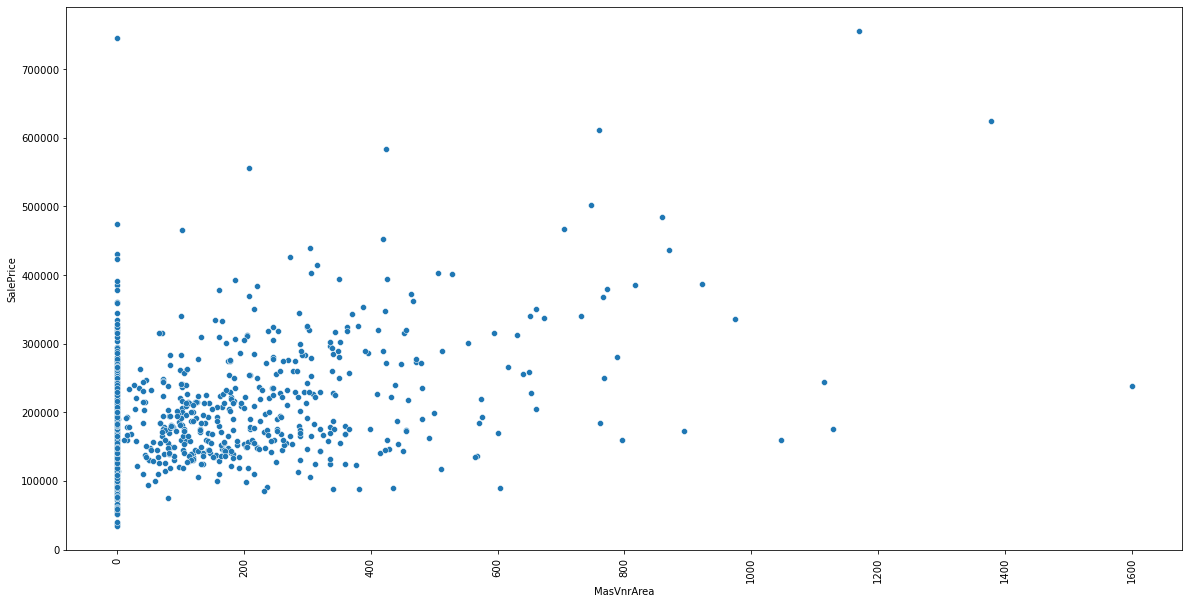

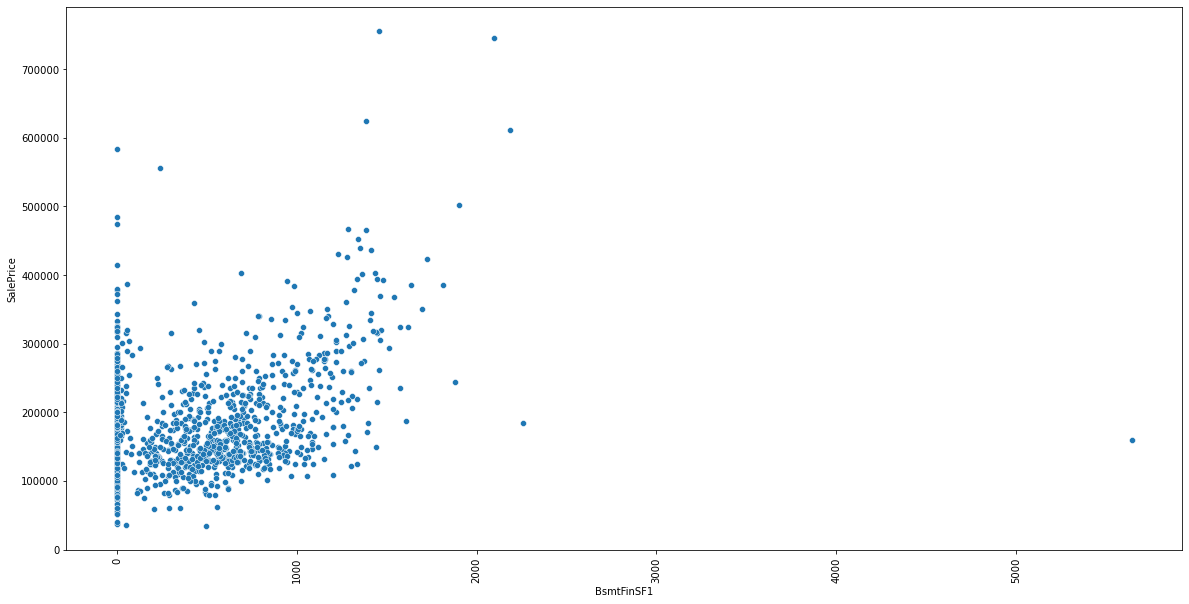

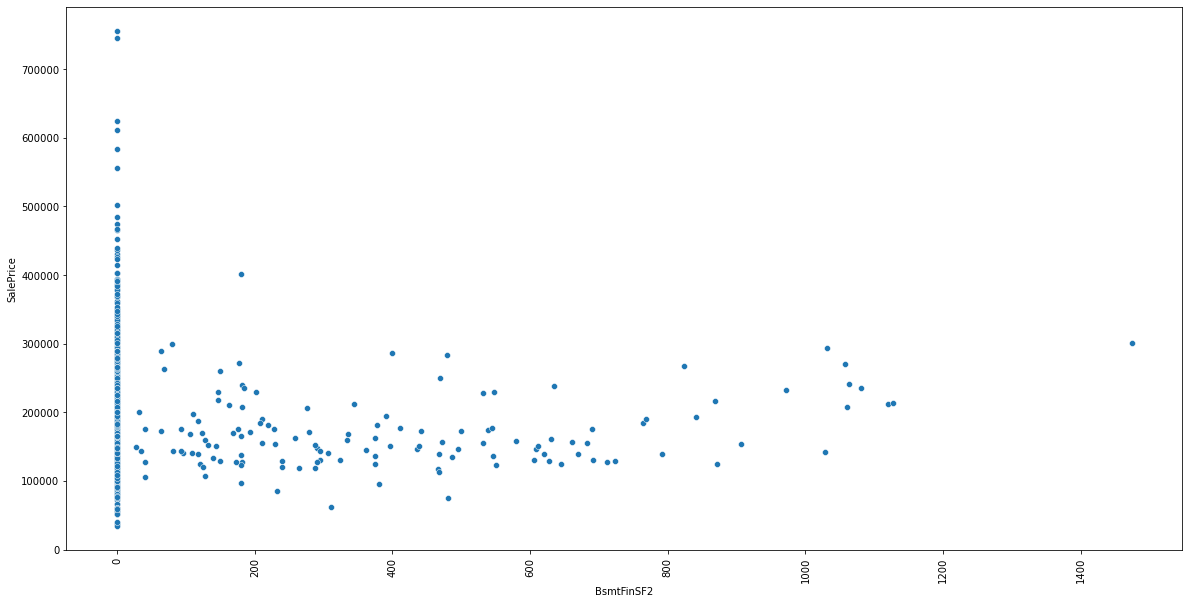

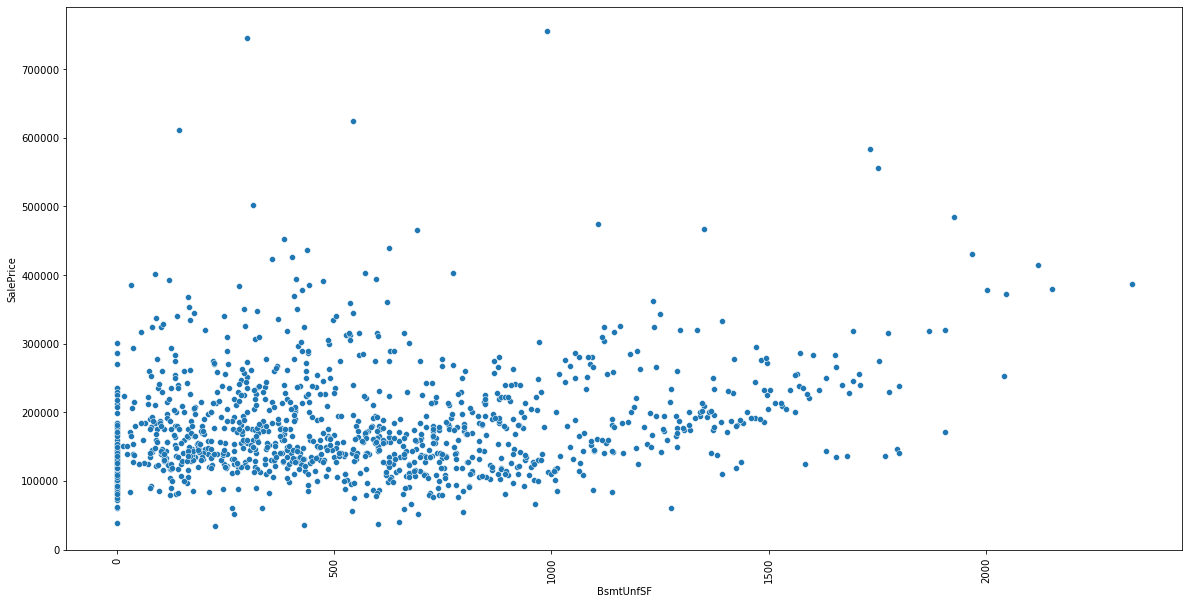

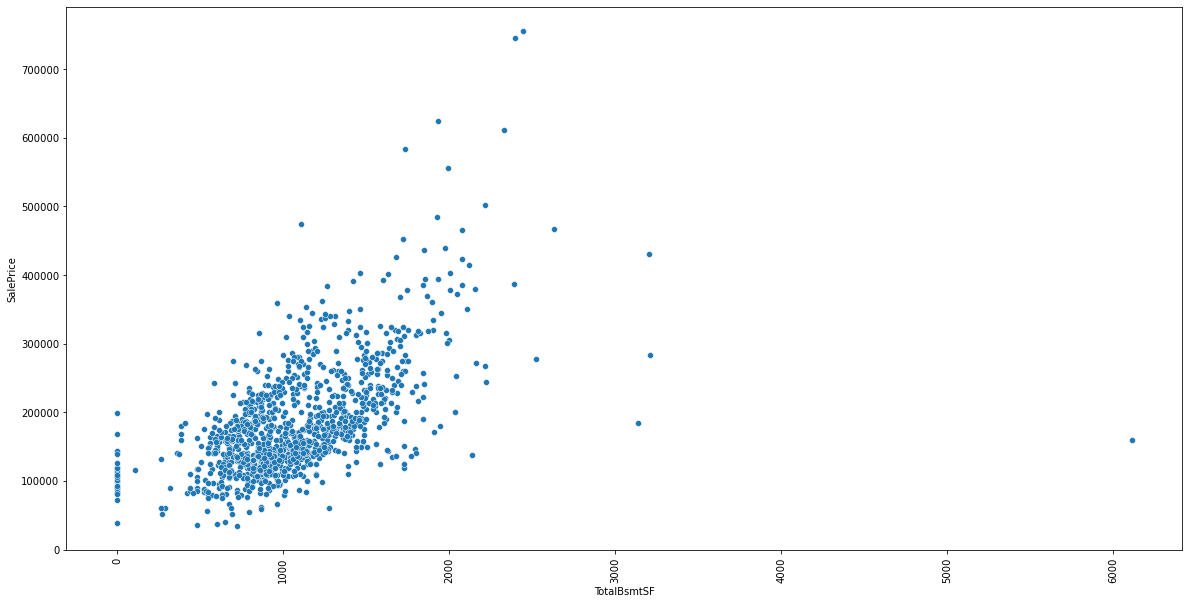

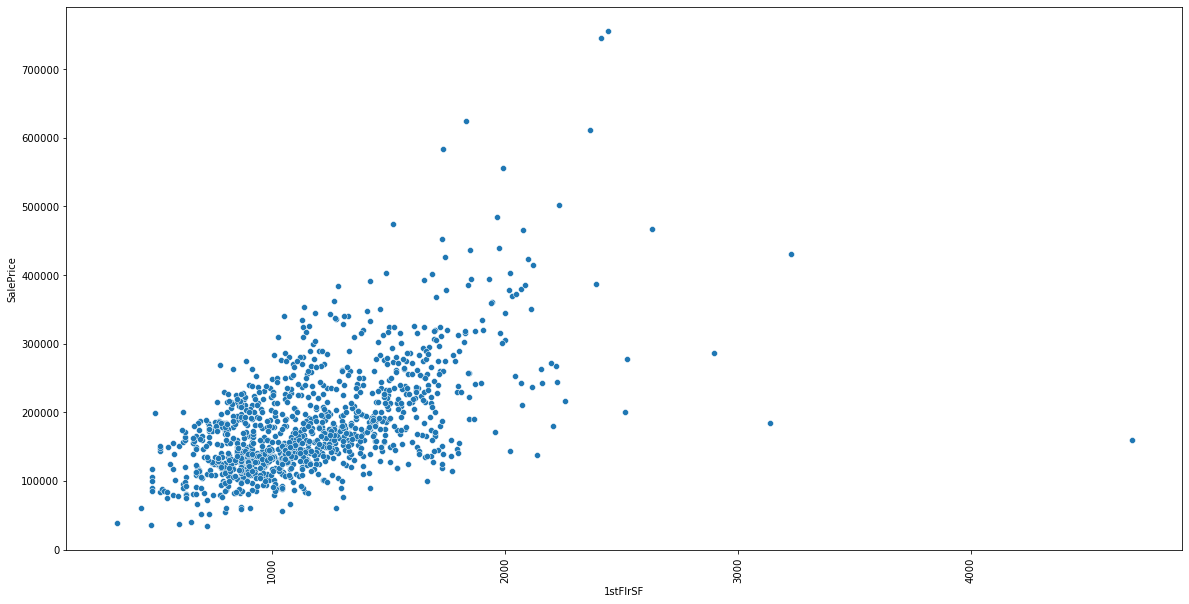

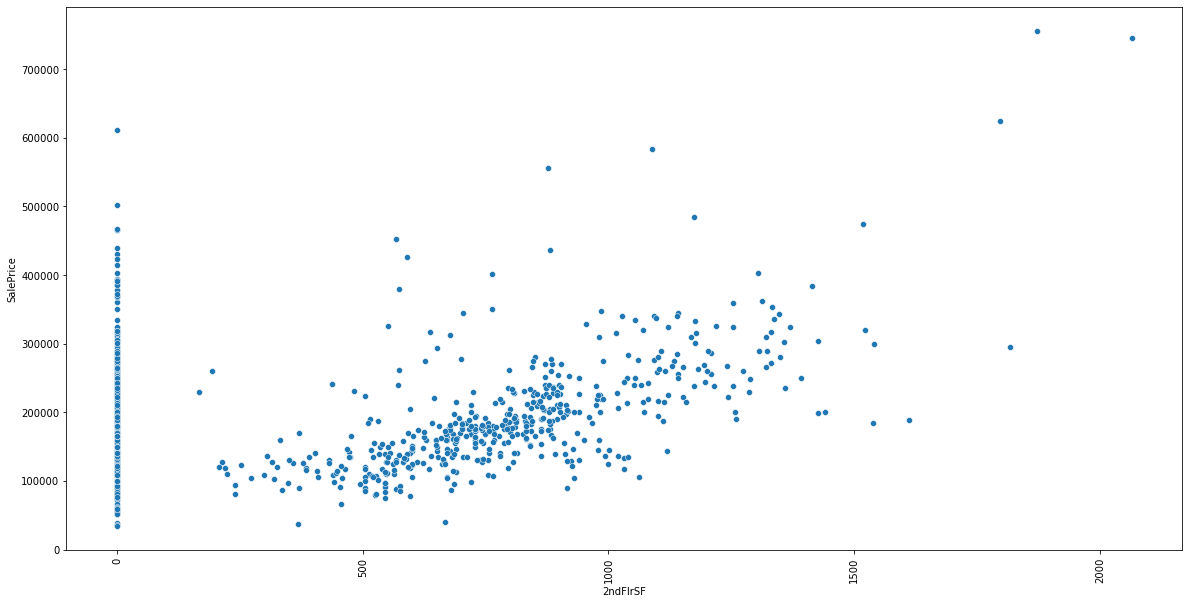

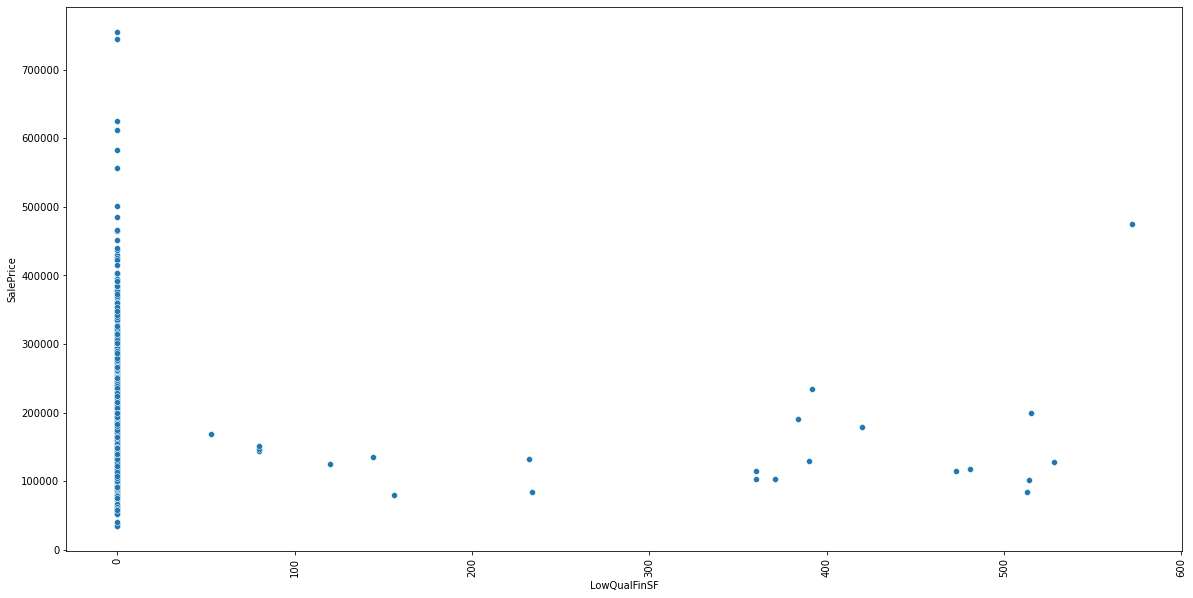

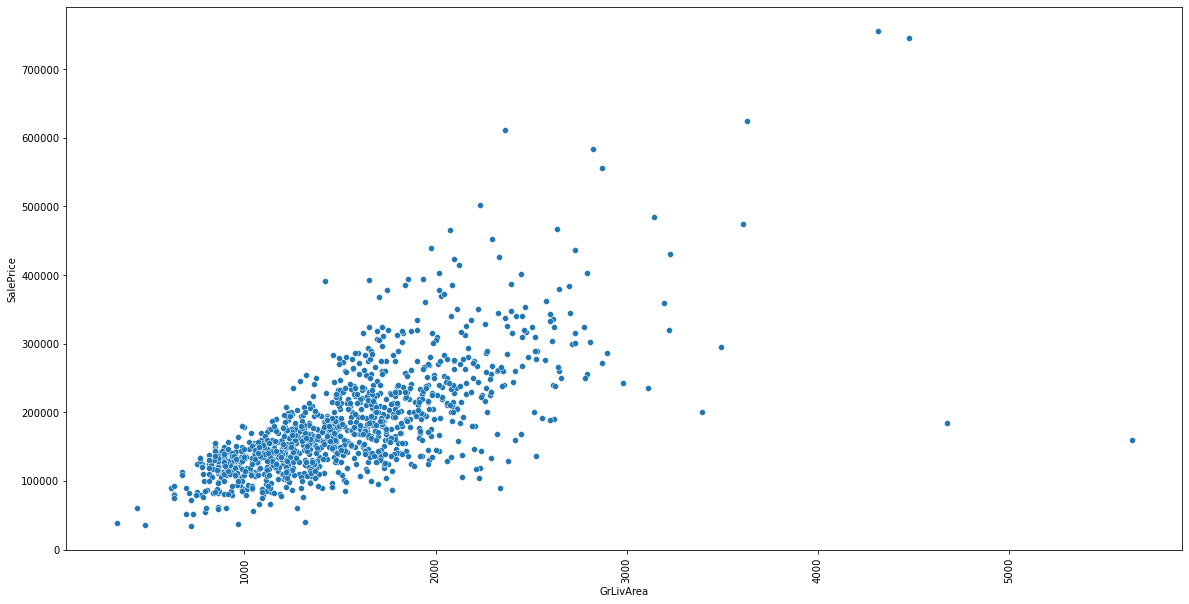

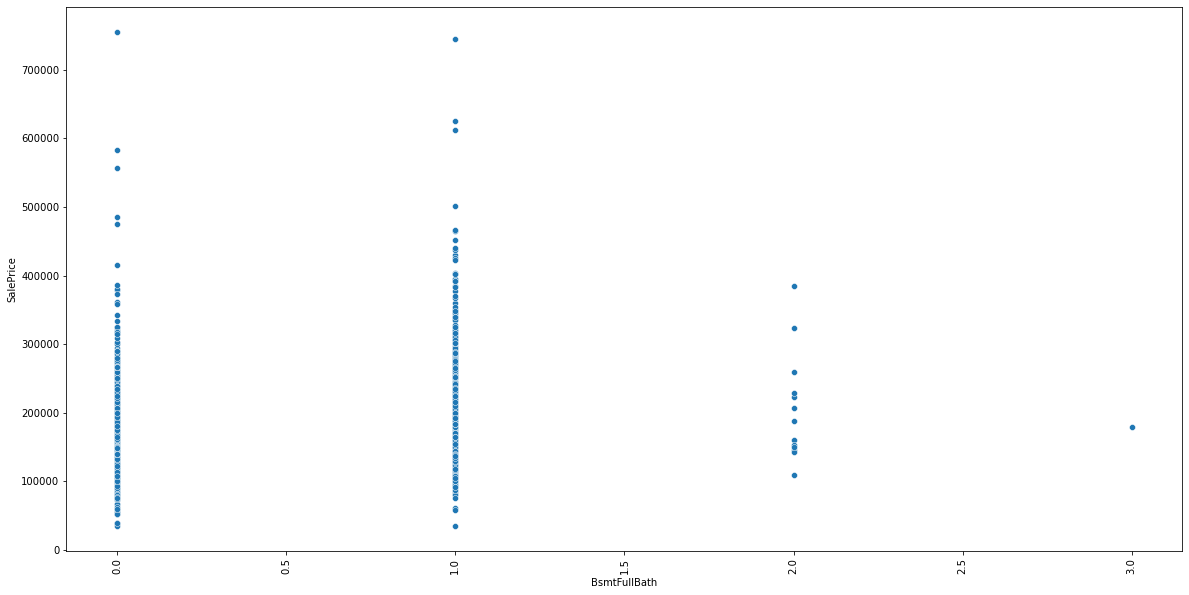

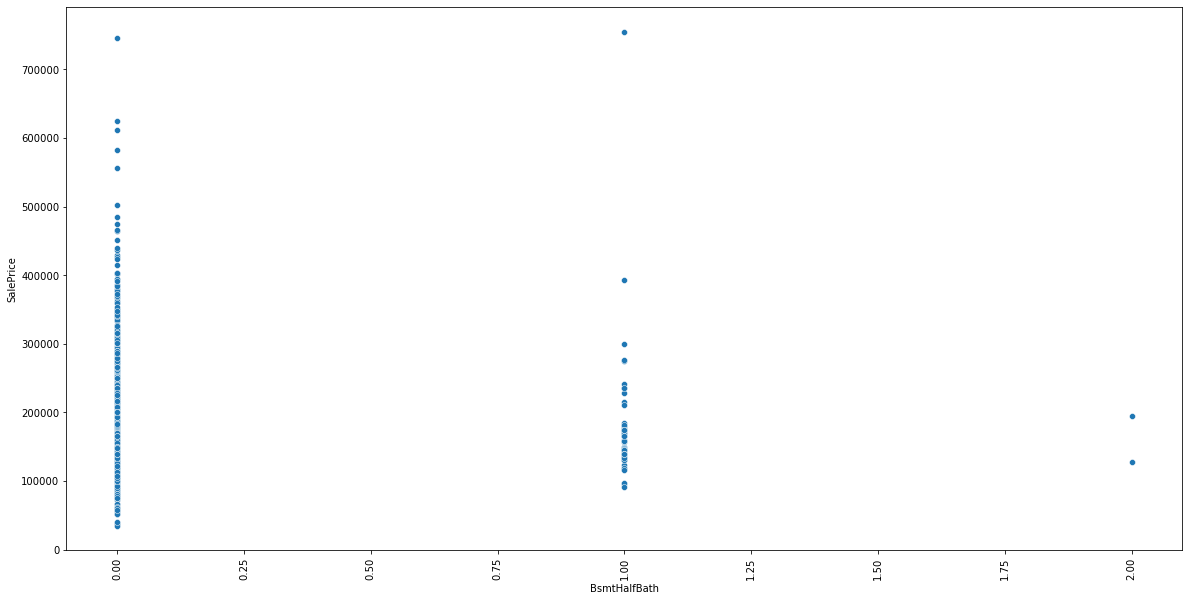

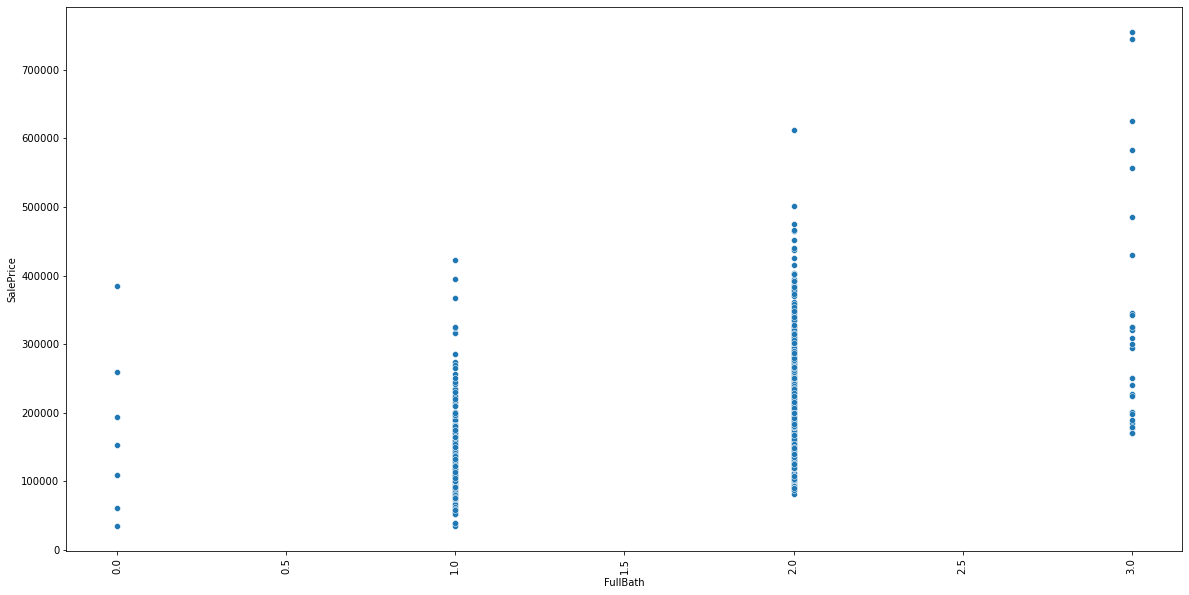

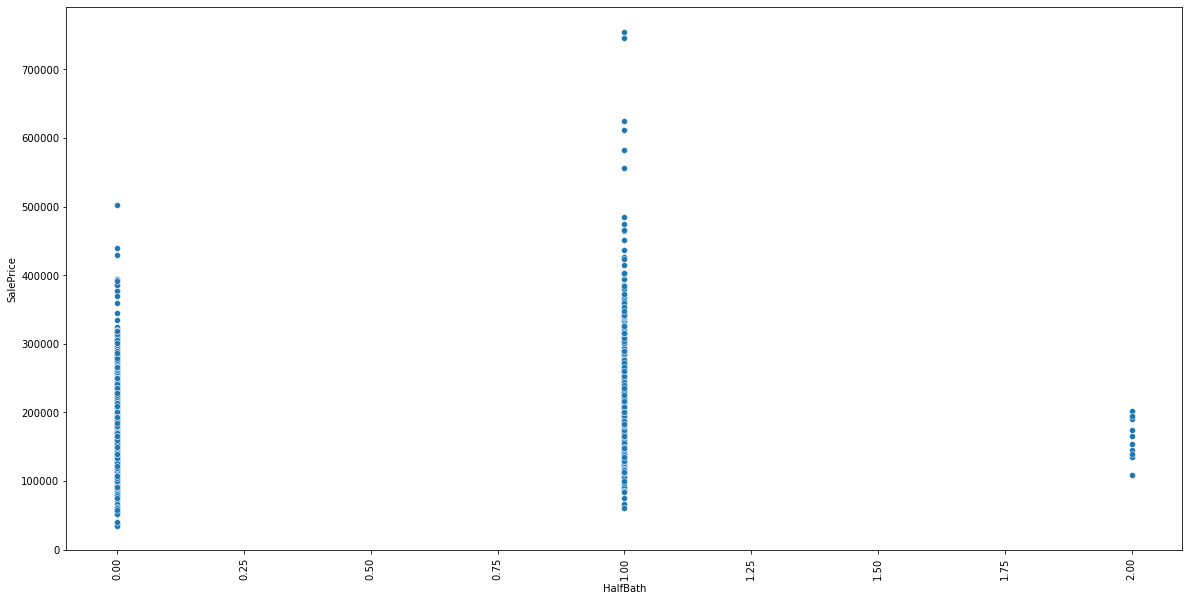

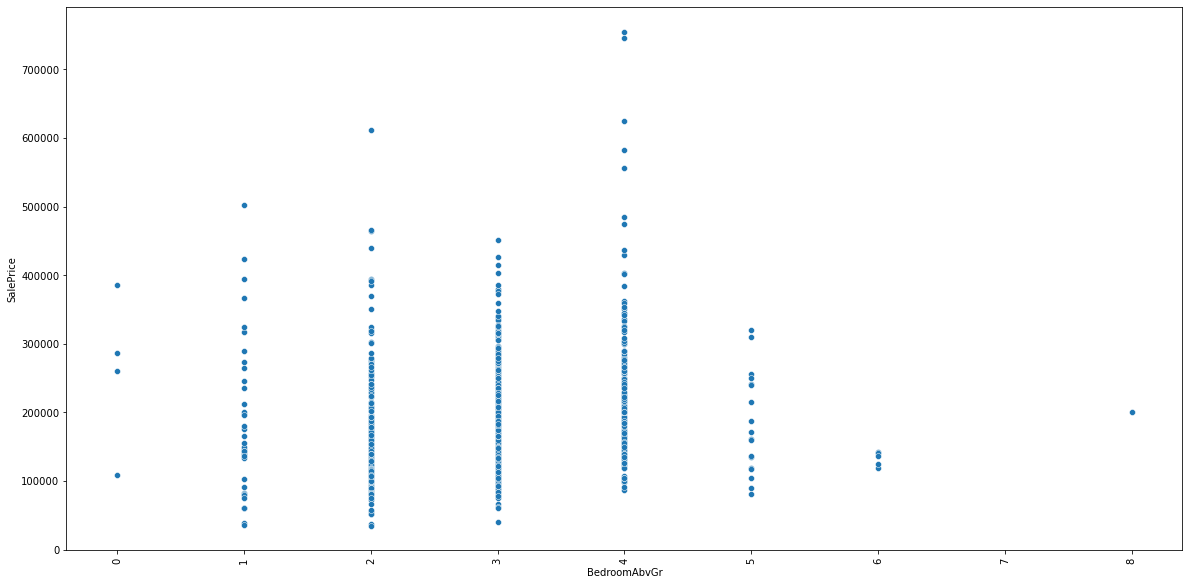

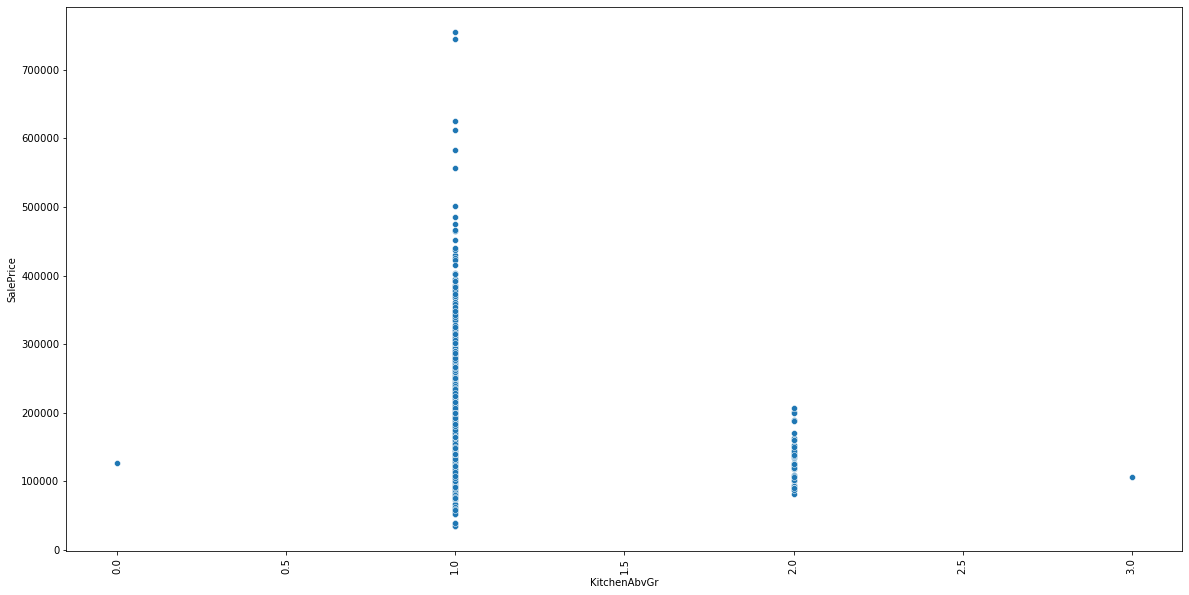

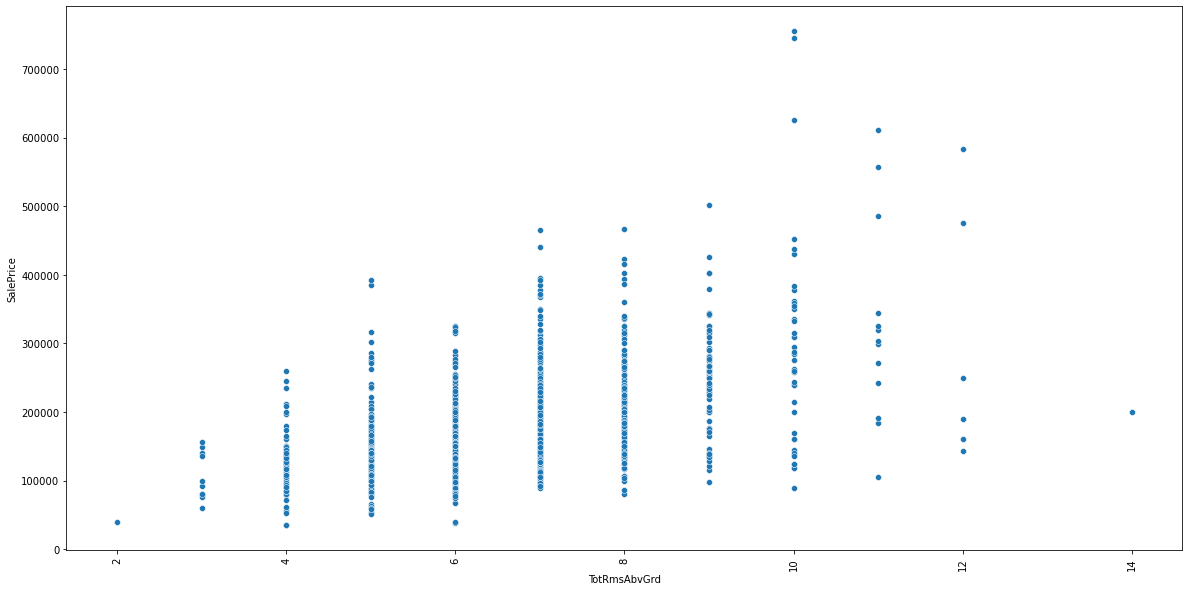

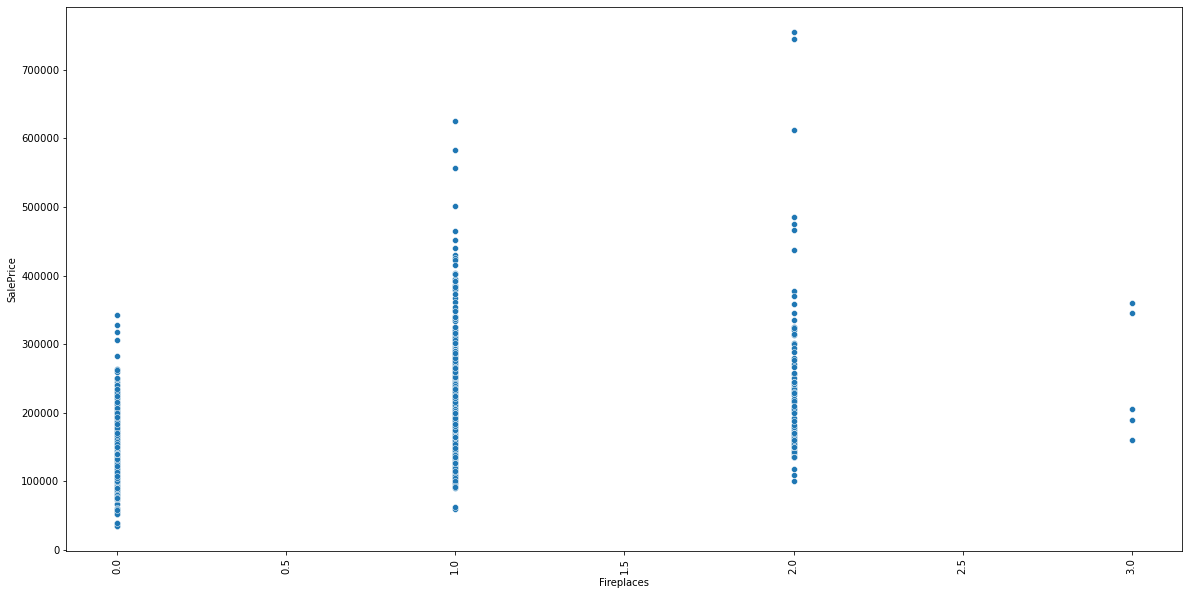

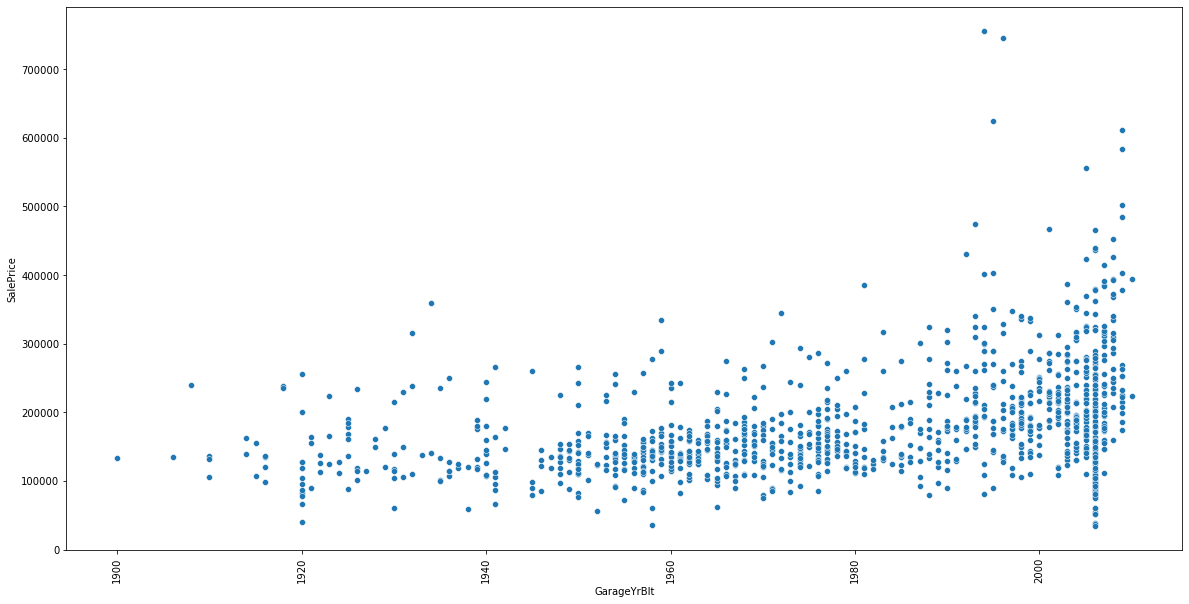

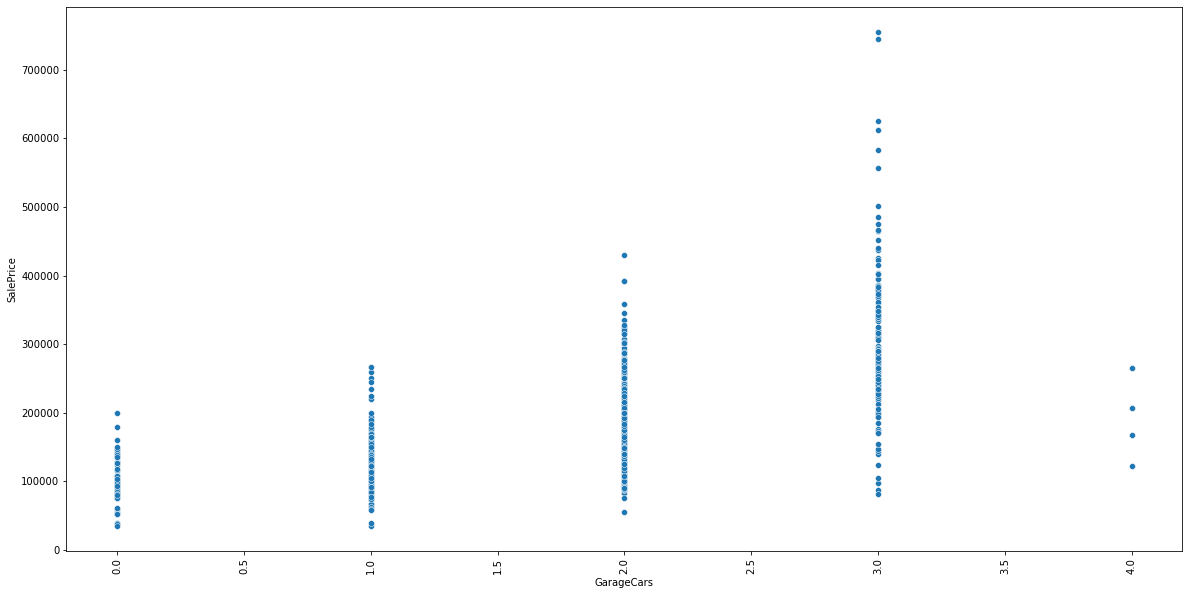

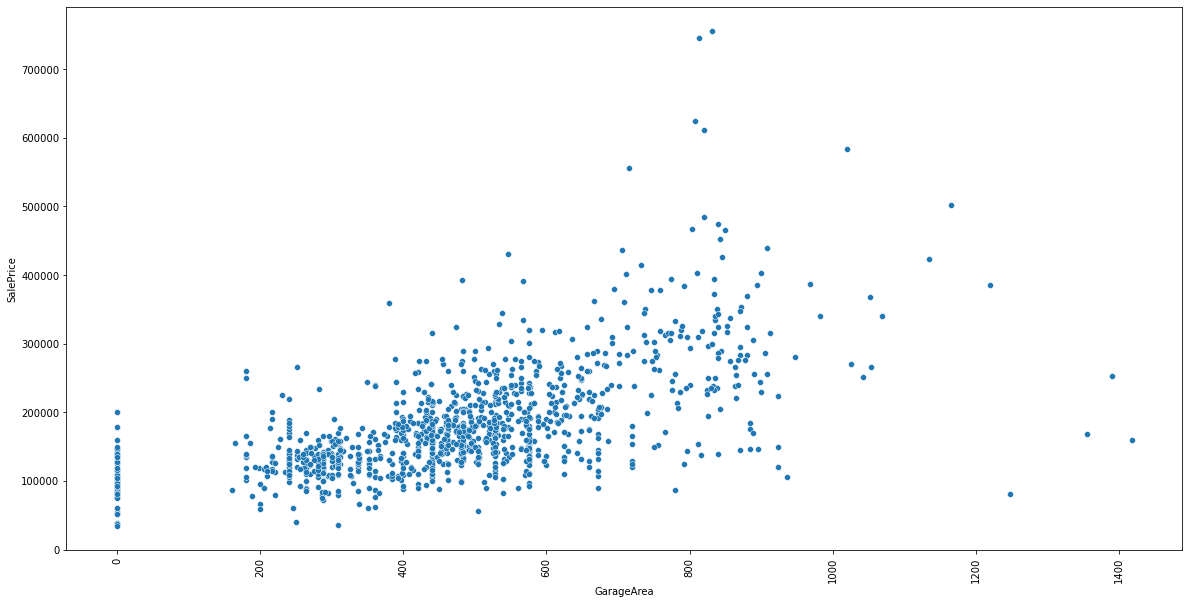

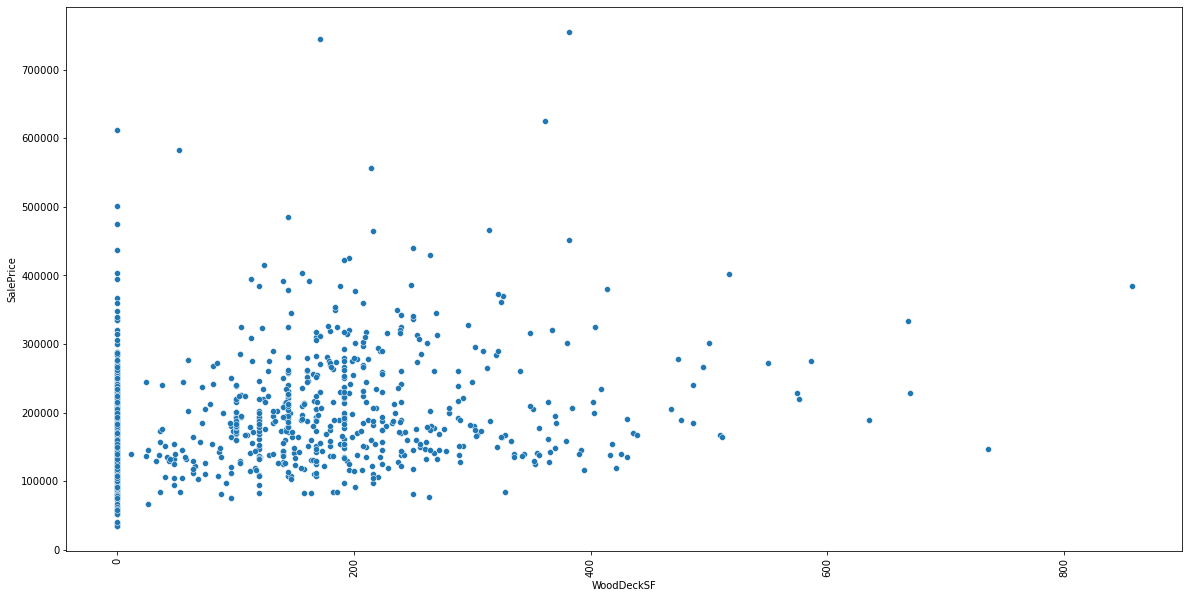

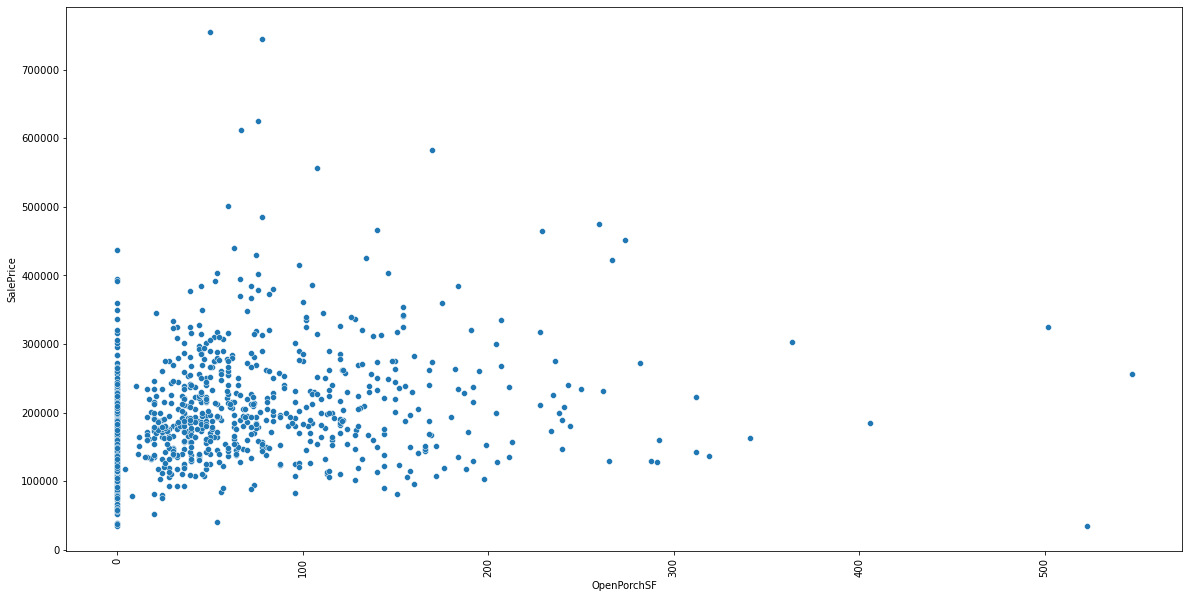

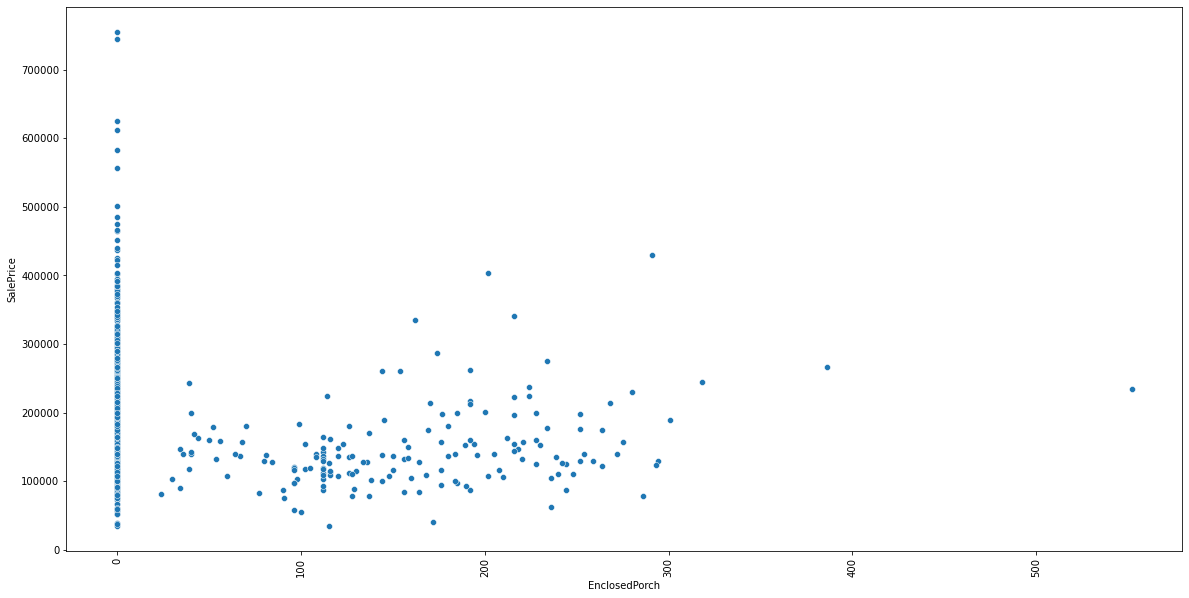

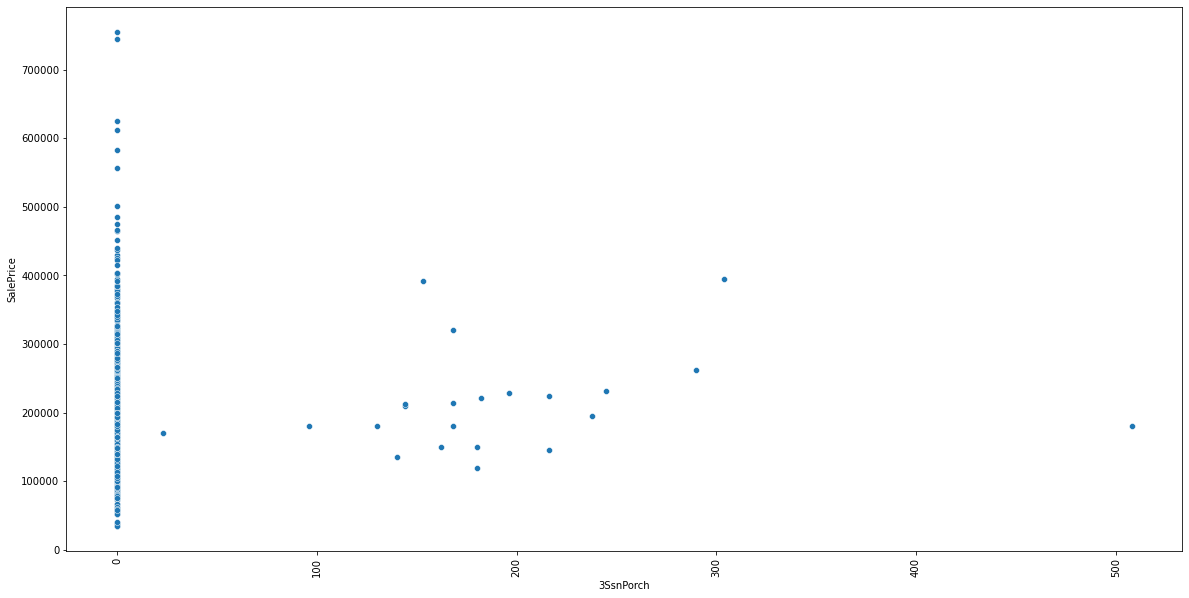

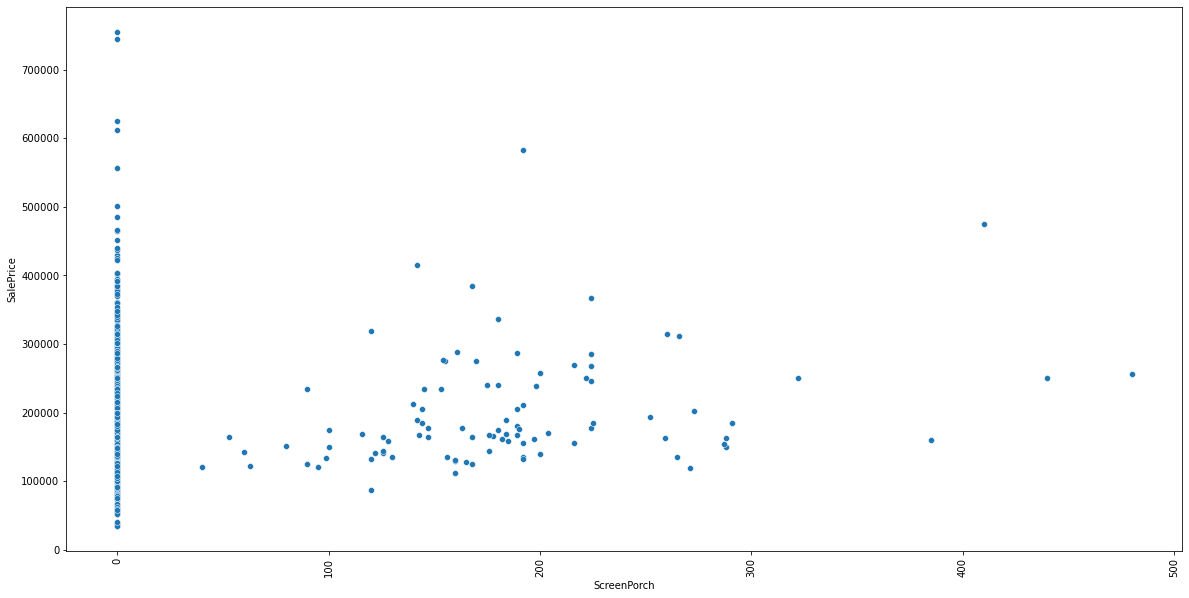

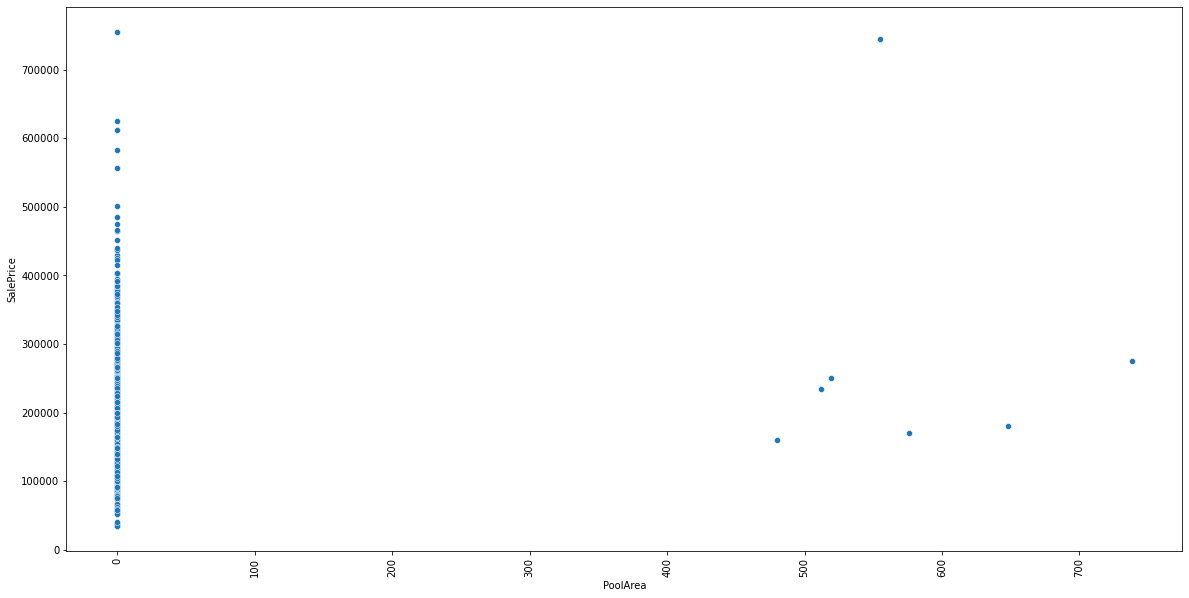

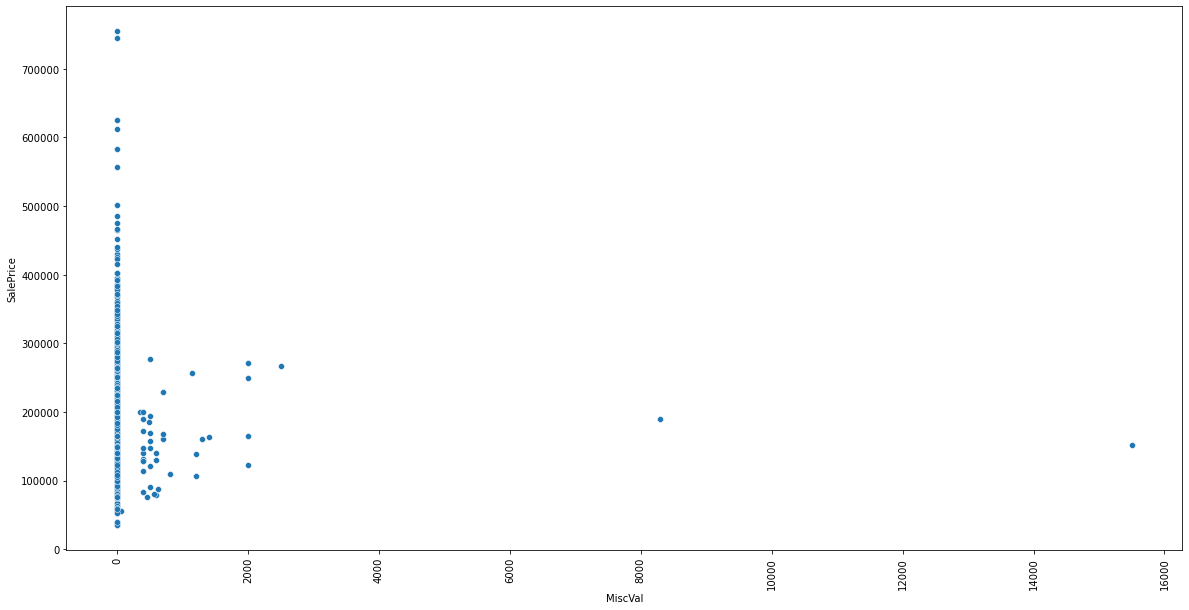

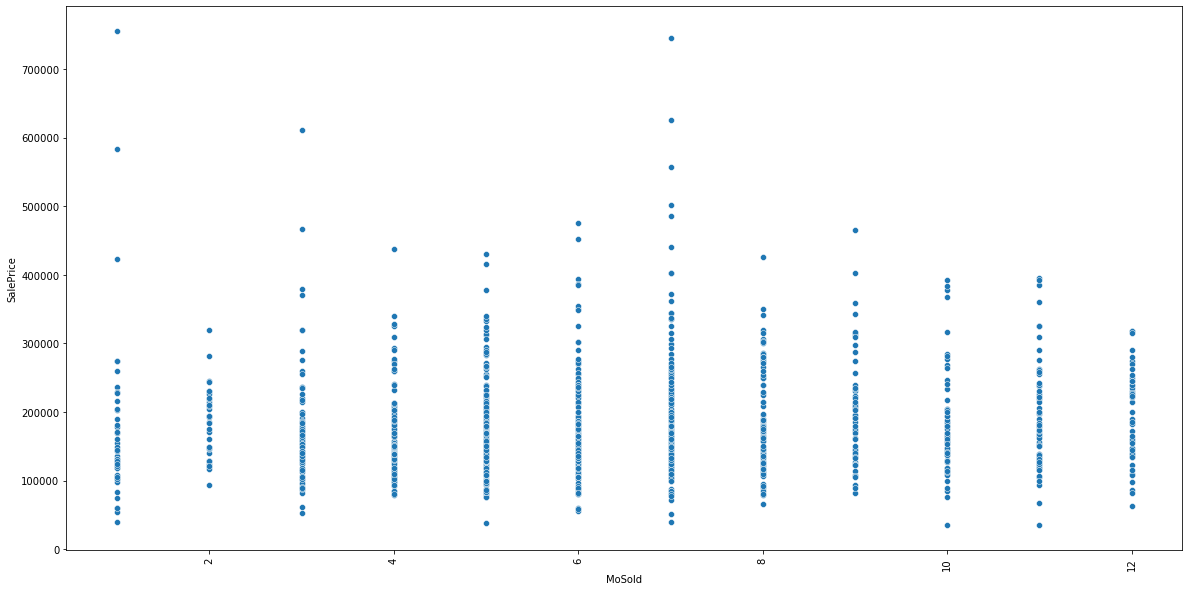

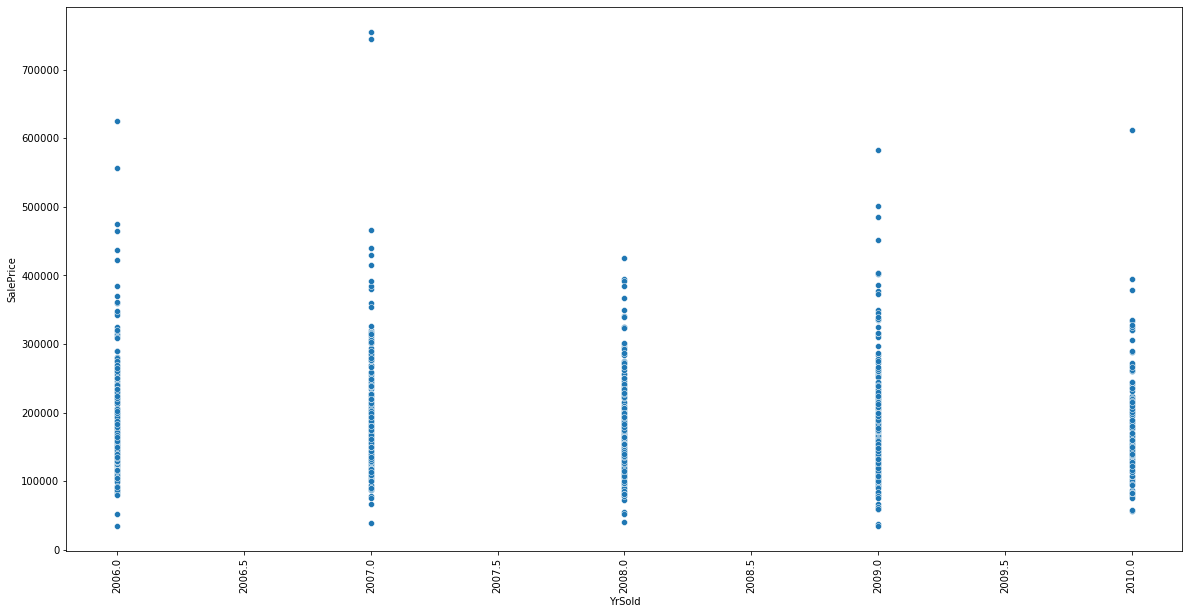

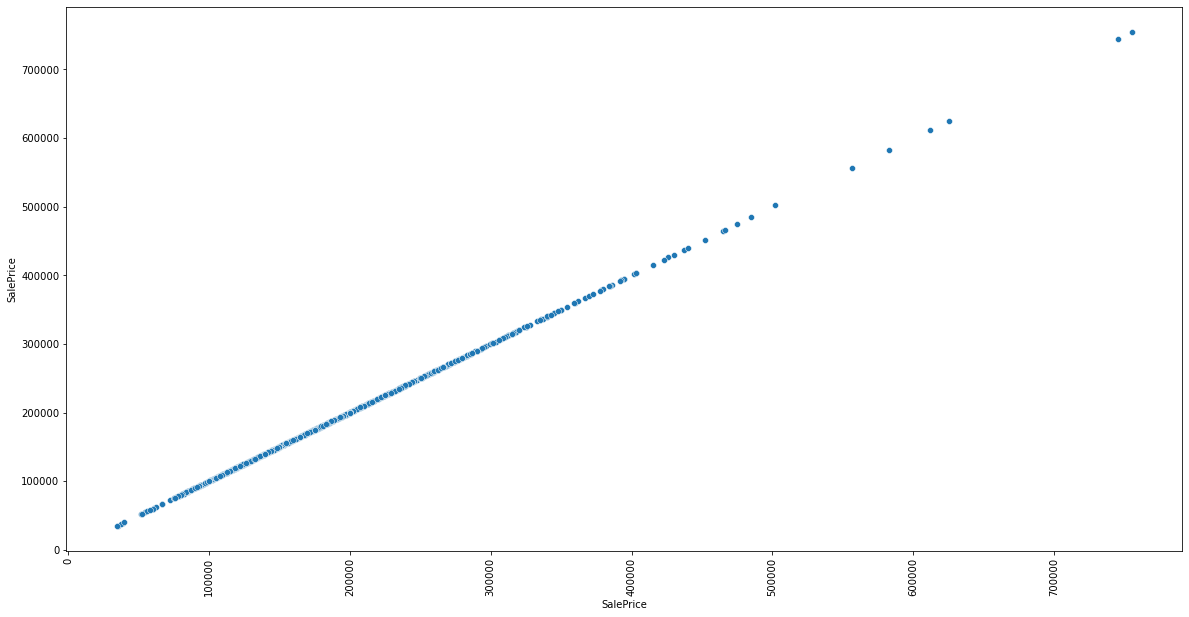

In [6]:
cont_data=df.select_dtypes(include='number')
#Plotting Scatter plot for each feature

for i in cont_data:
    plt.figure(figsize=(20,10))
    a=sns.scatterplot(x=df[i],y=df['SalePrice'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

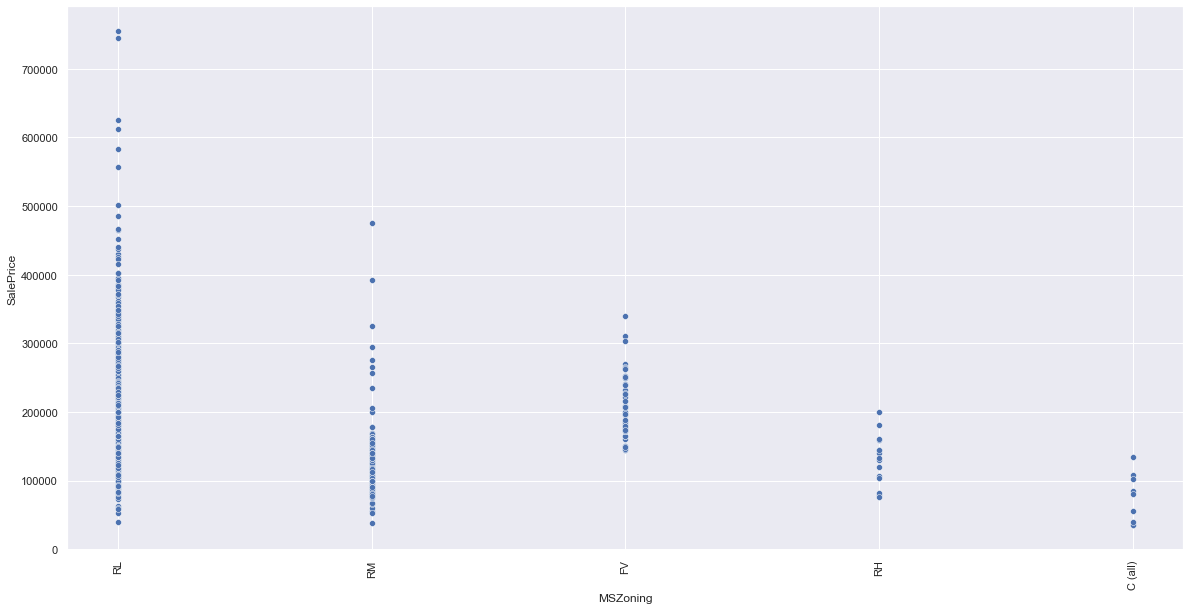

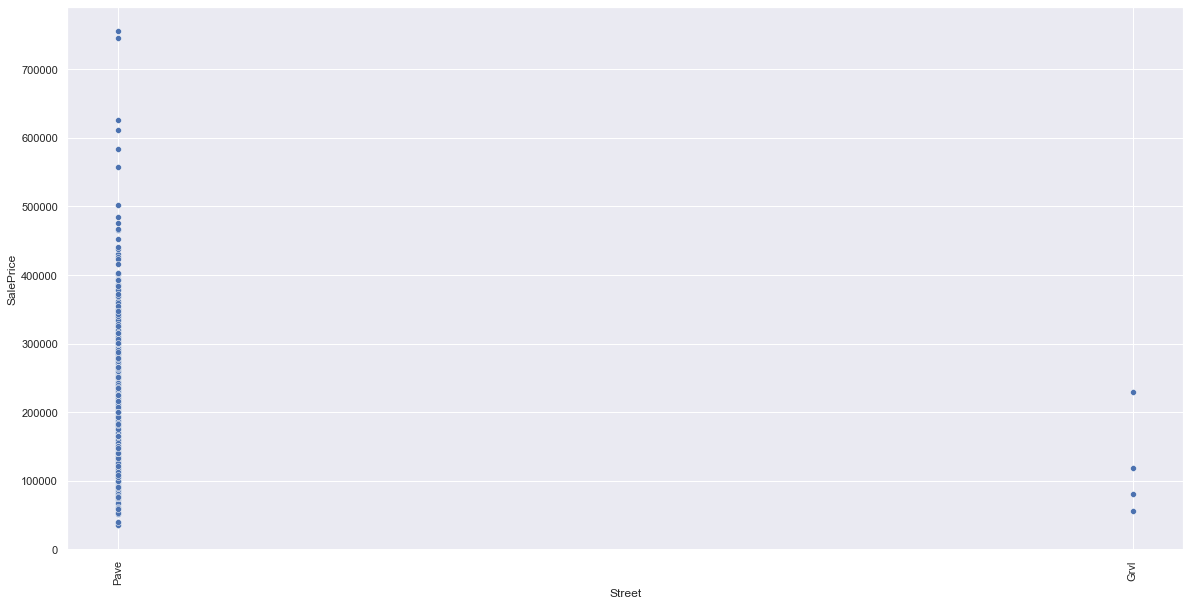

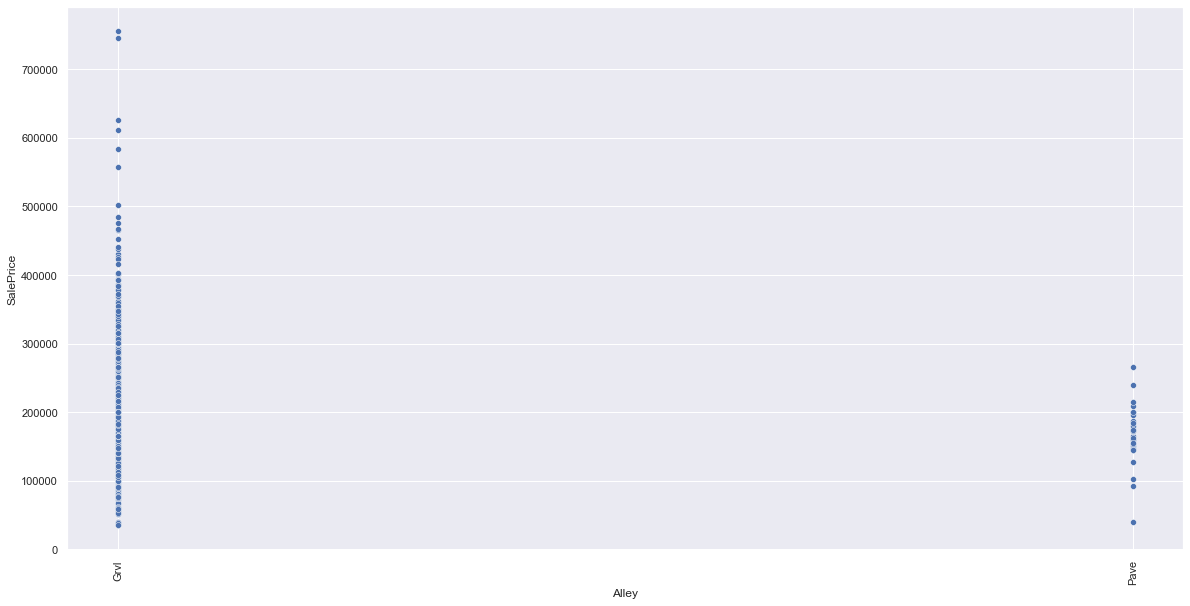

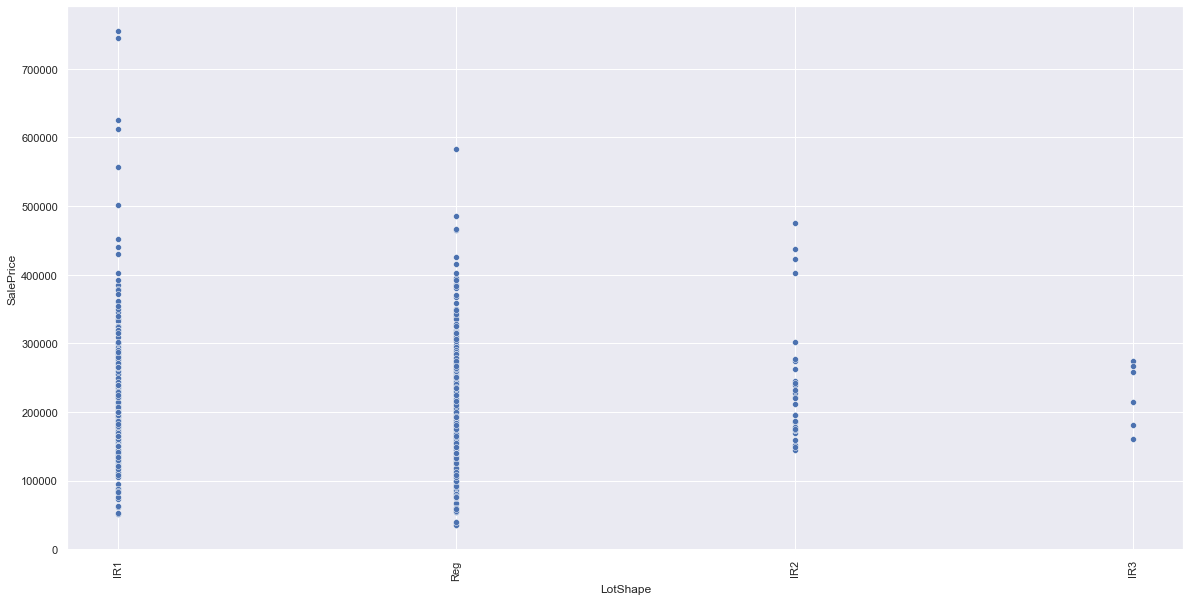

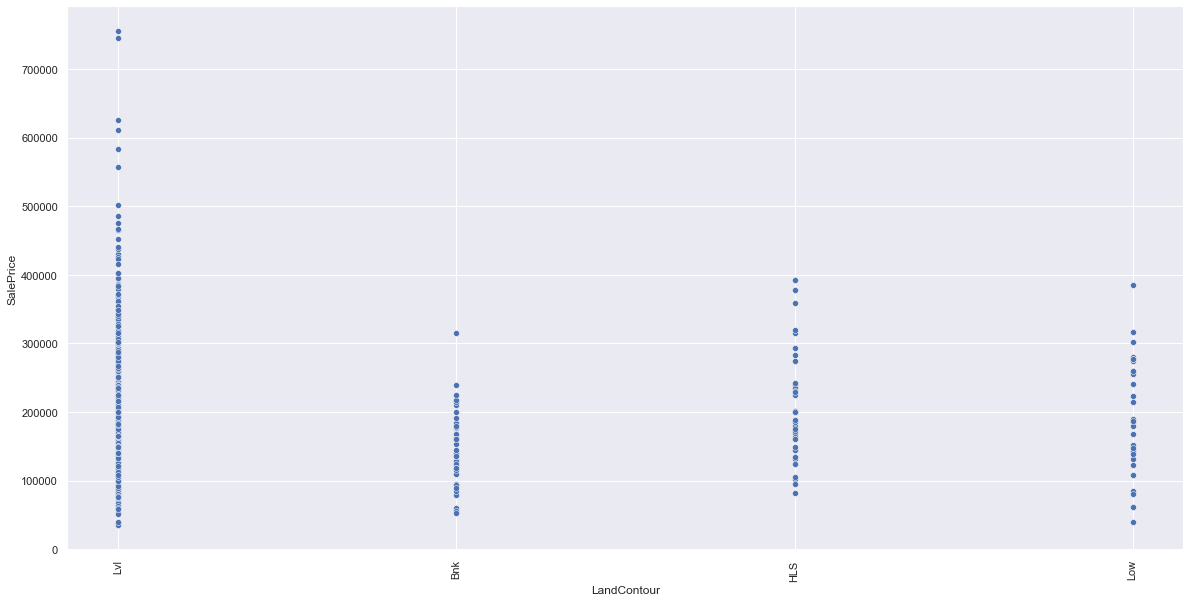

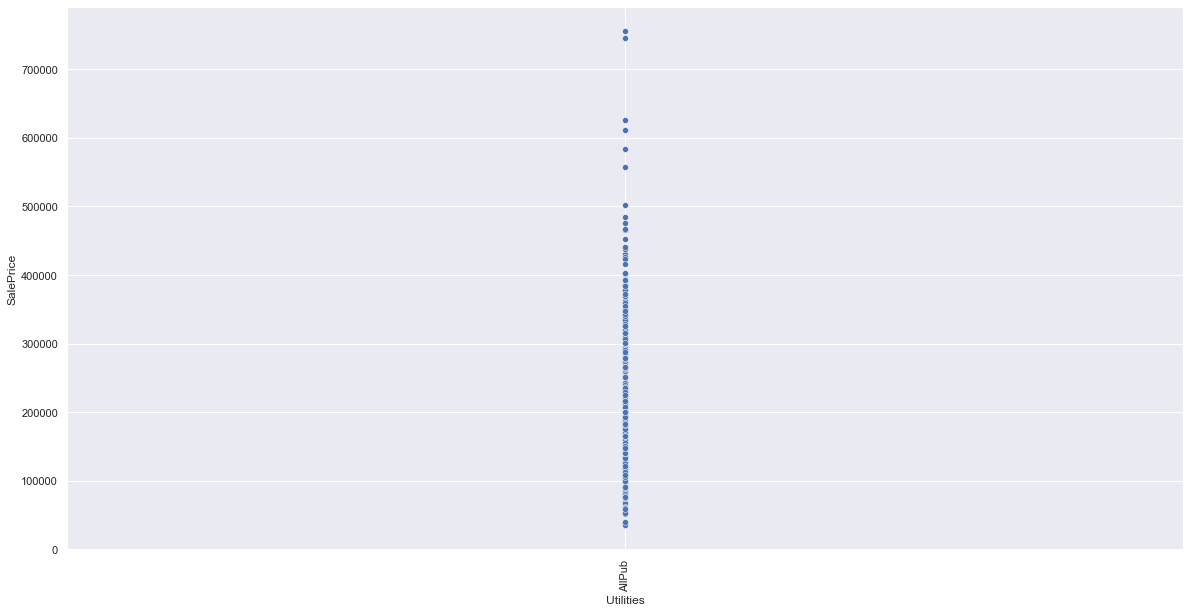

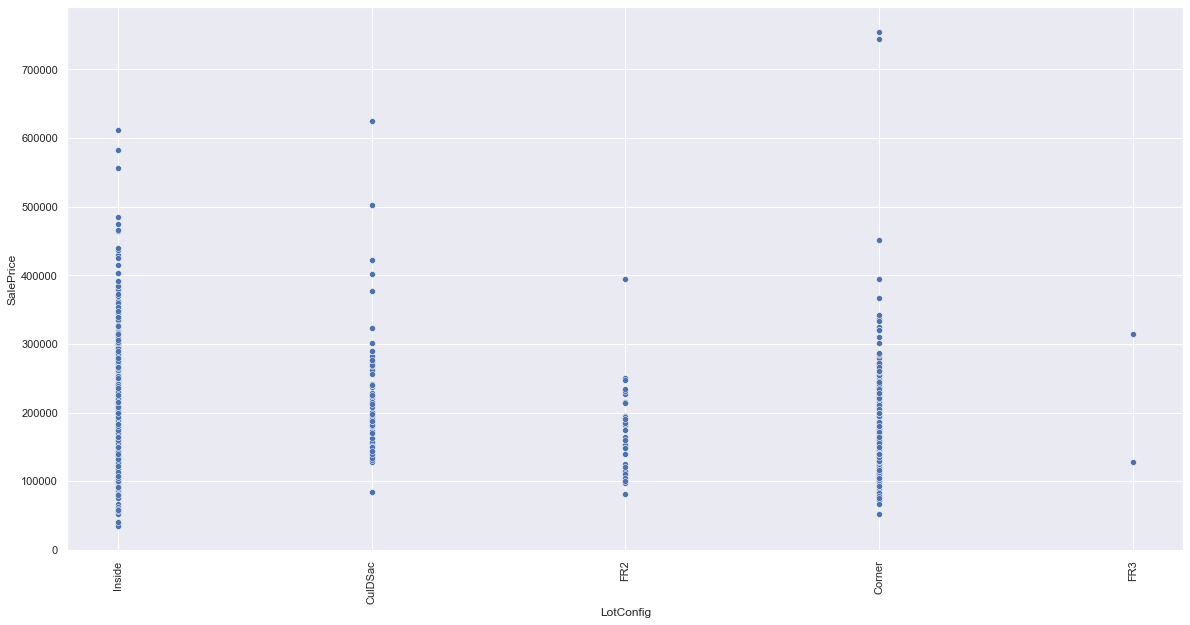

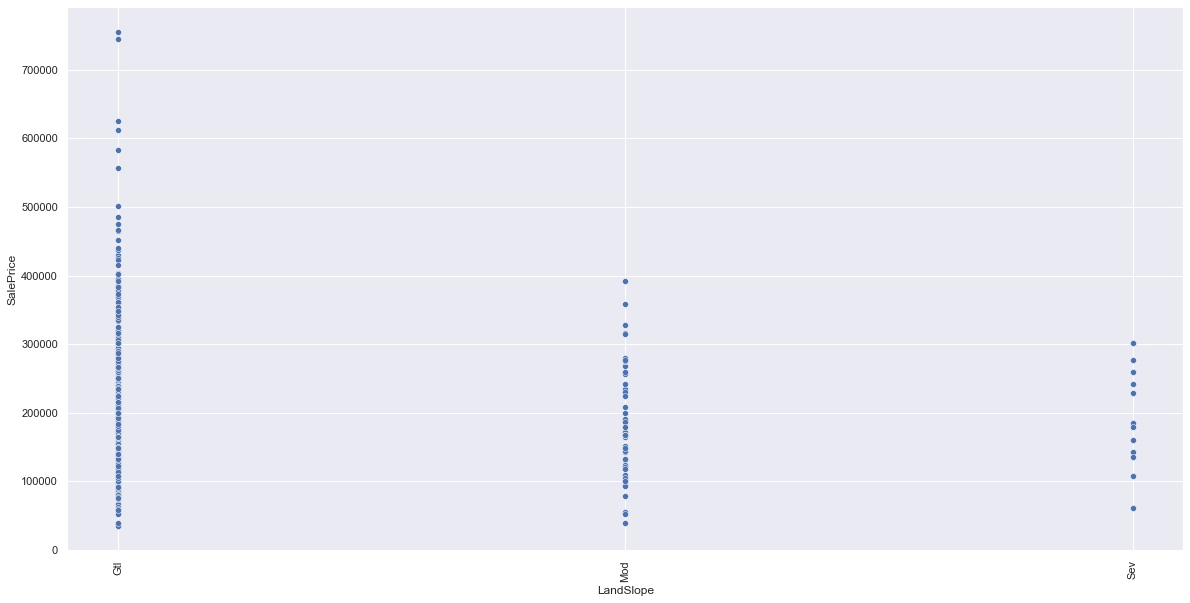

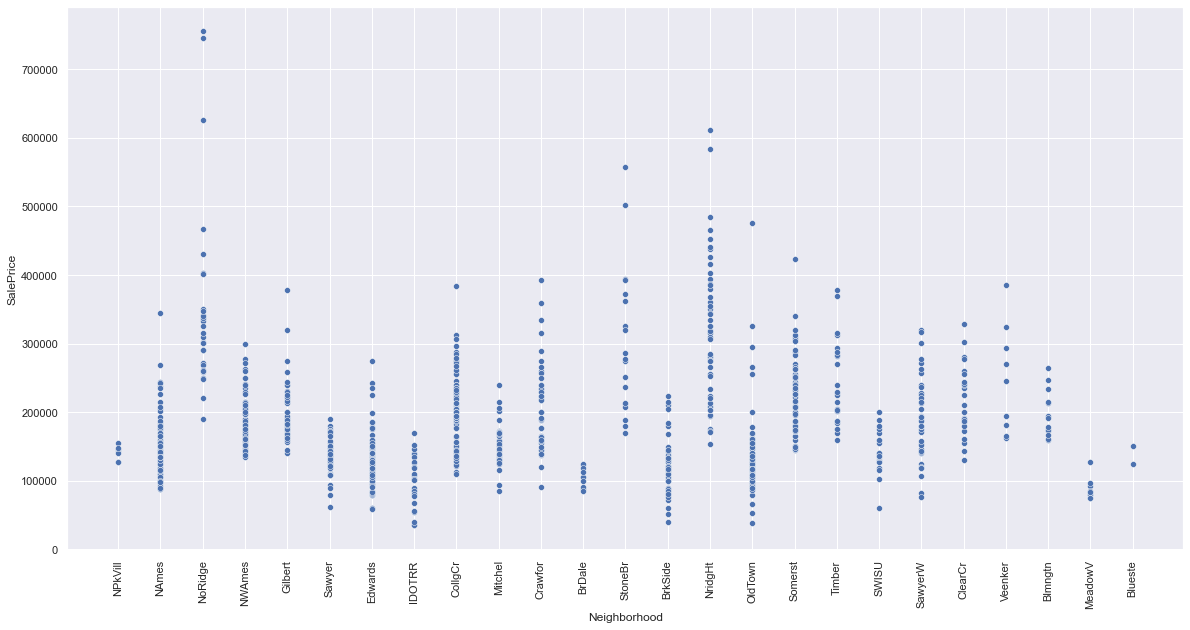

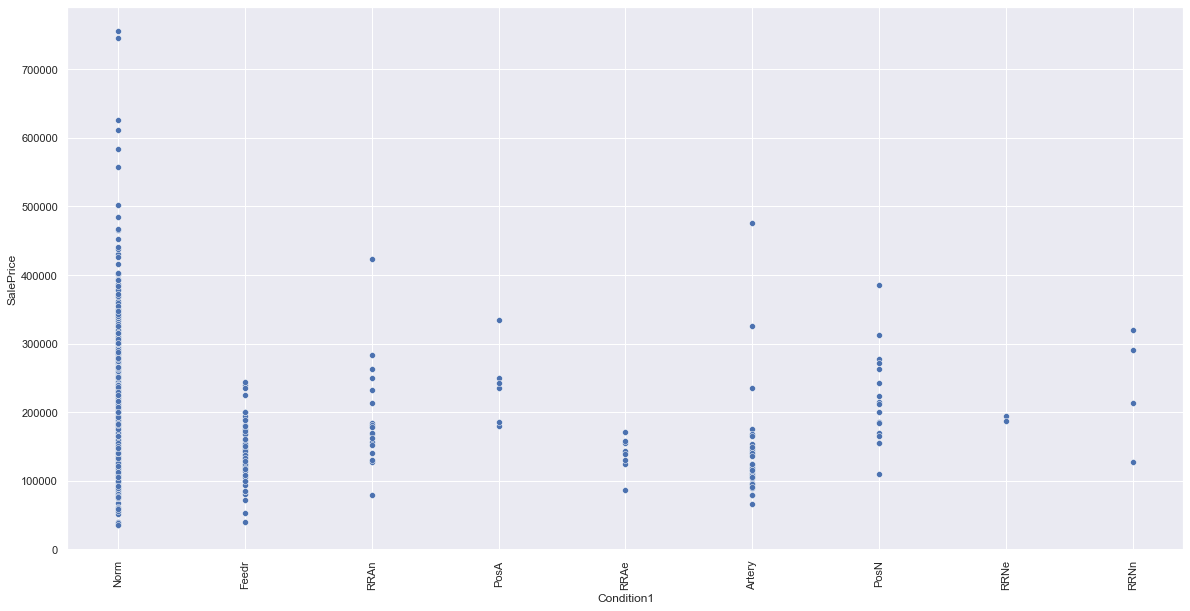

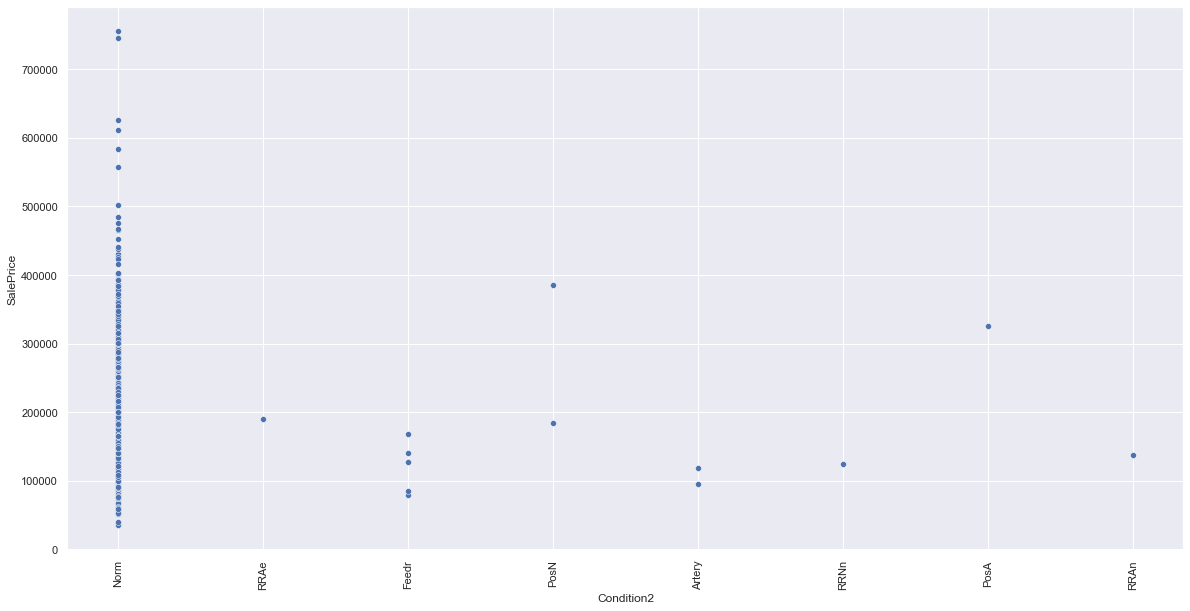

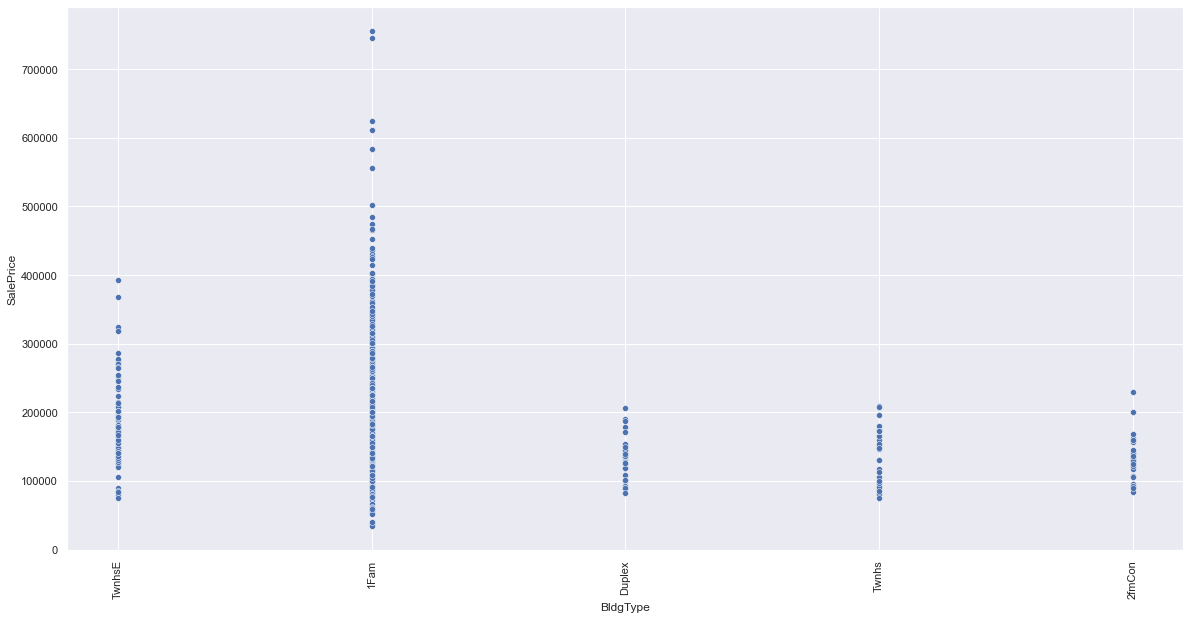

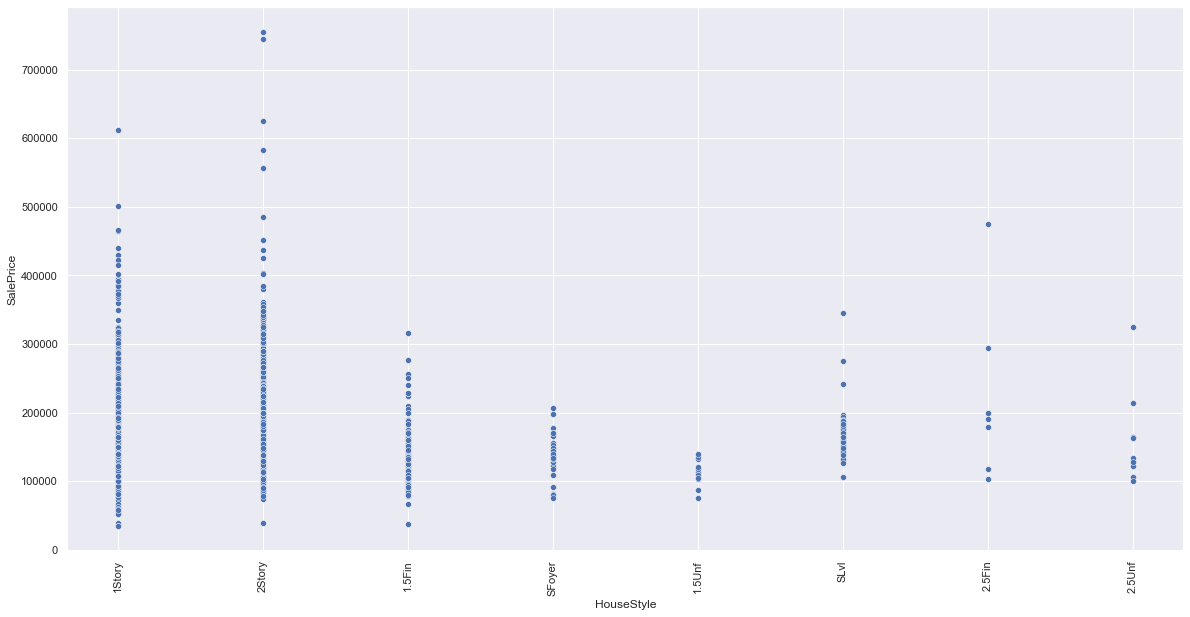

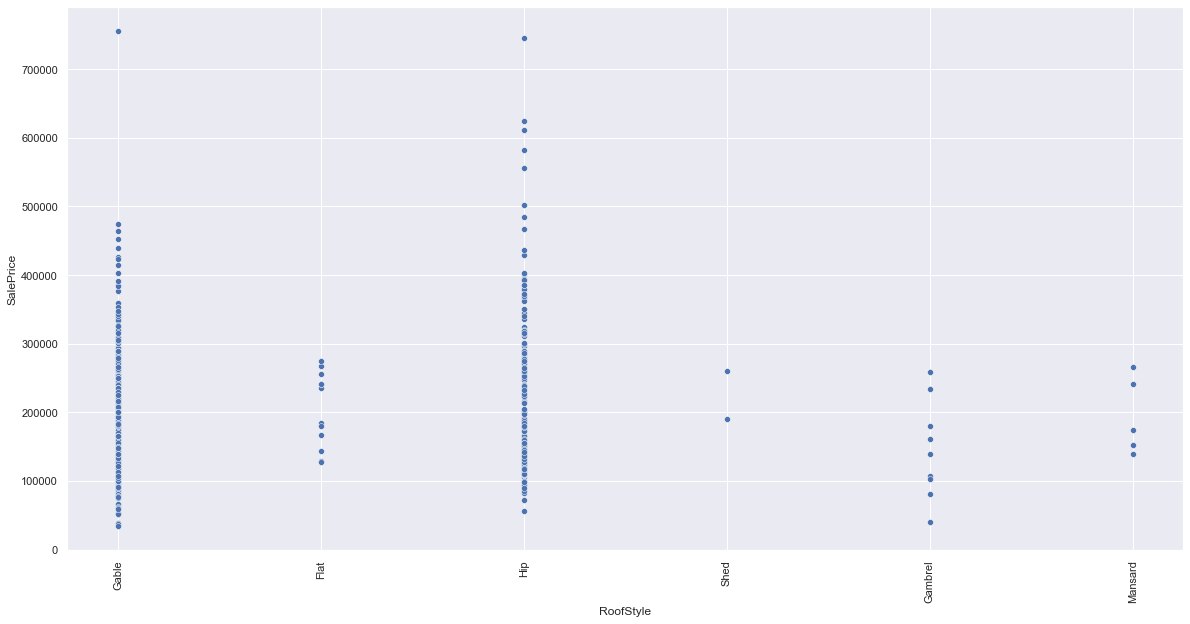

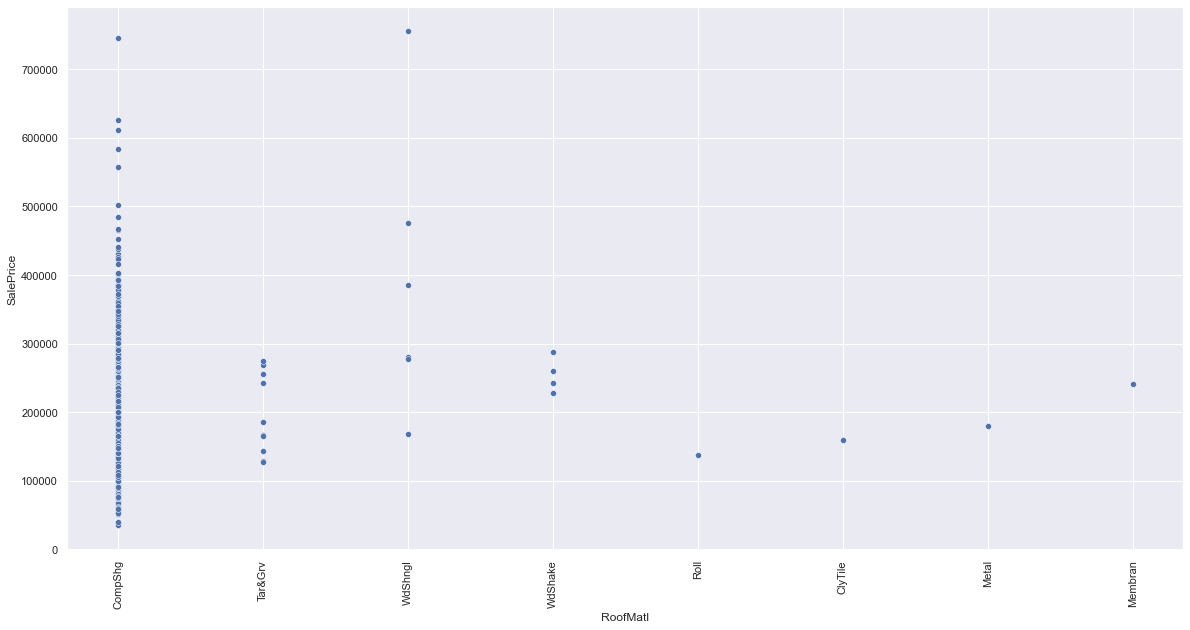

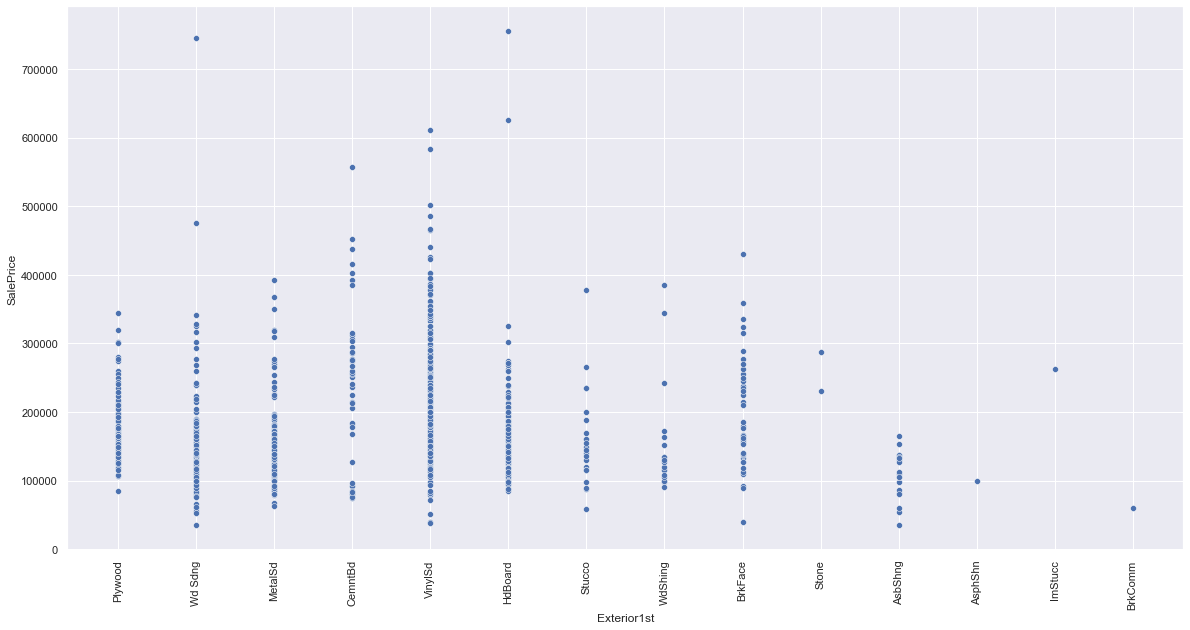

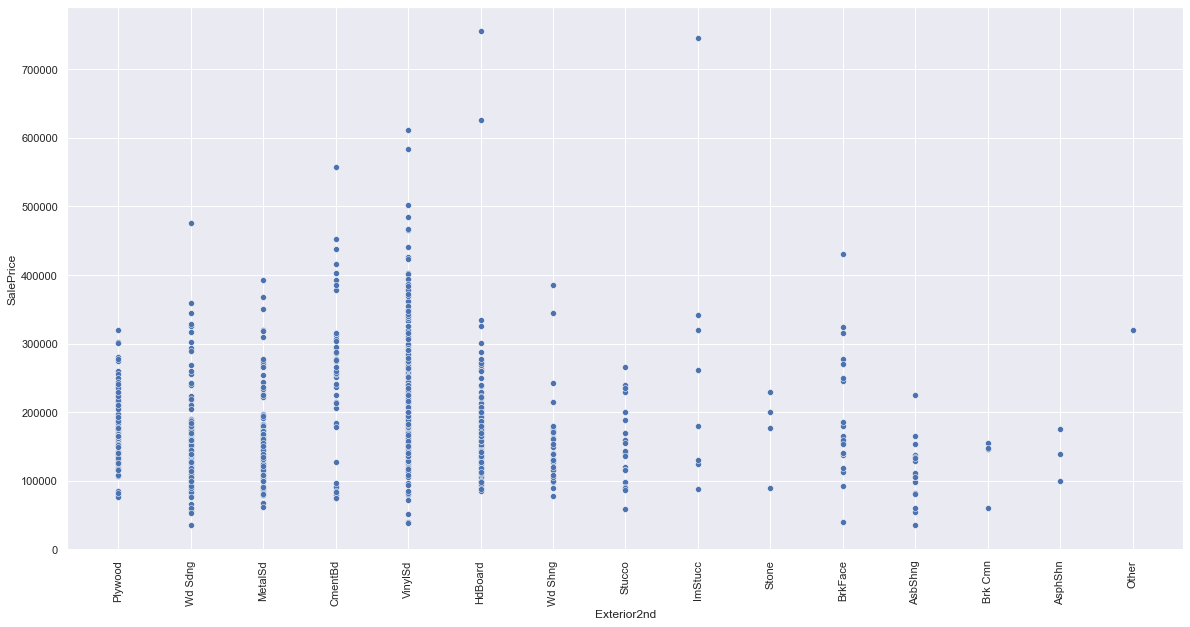

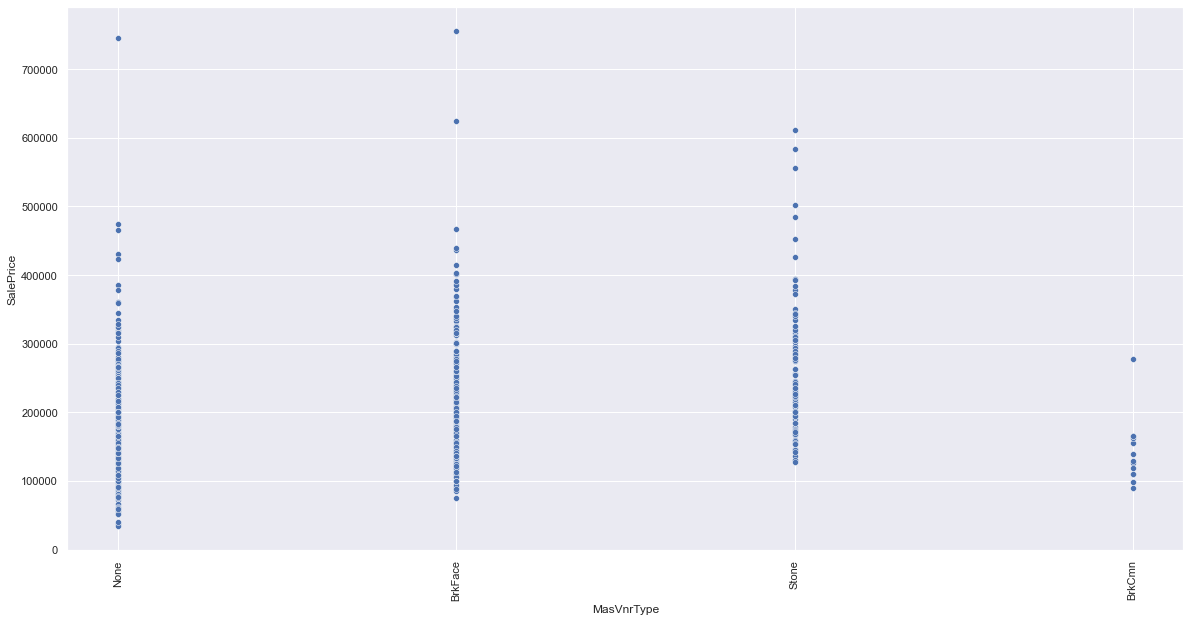

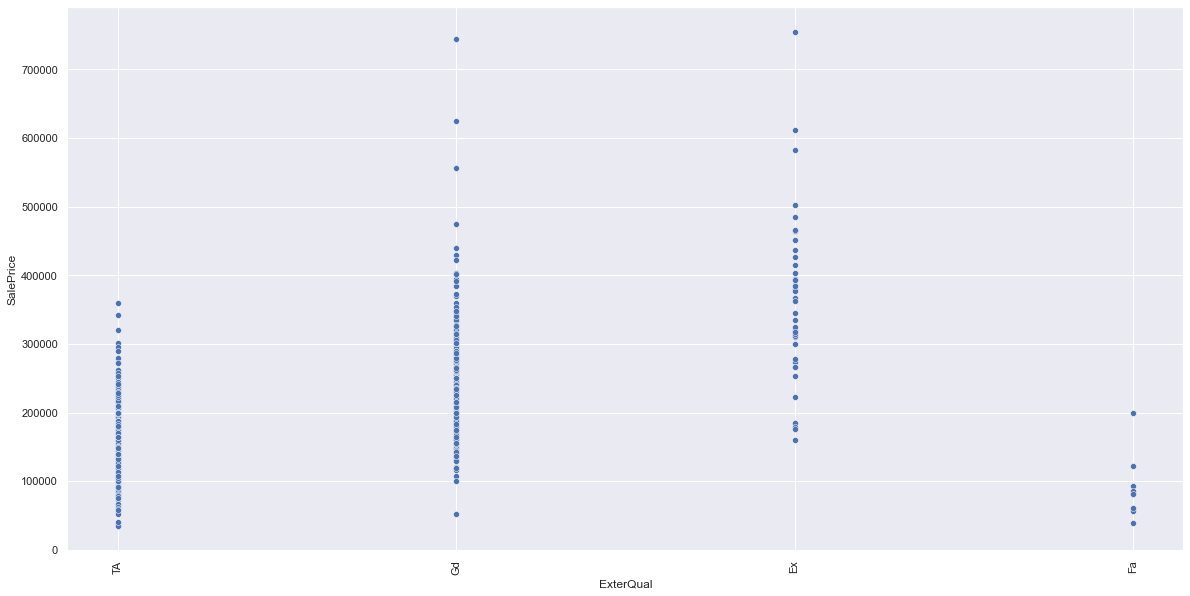

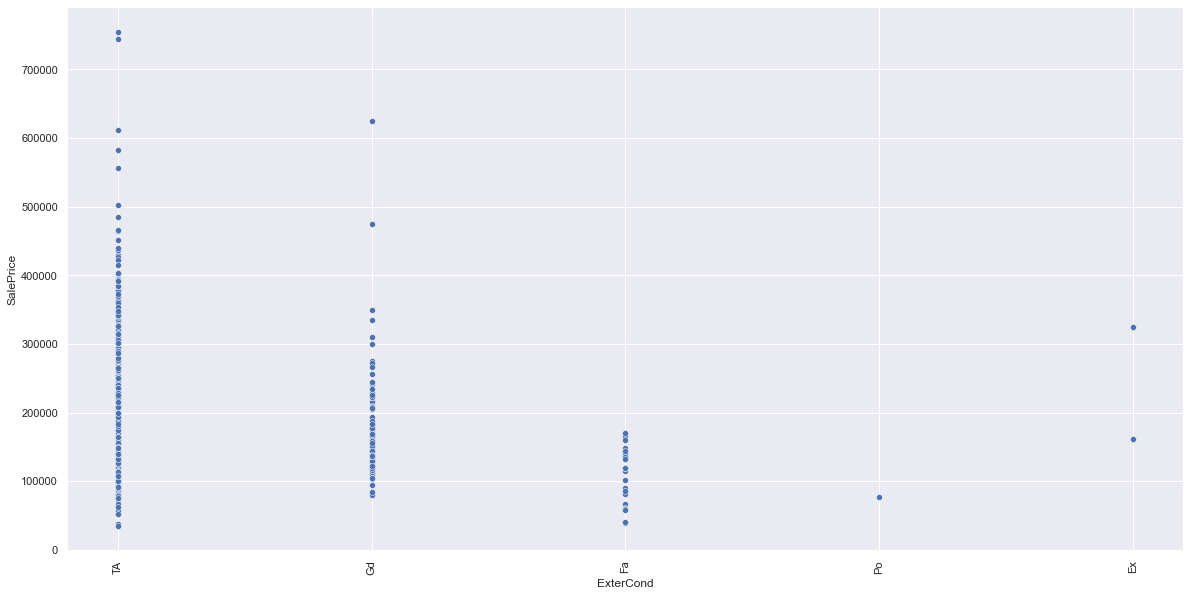

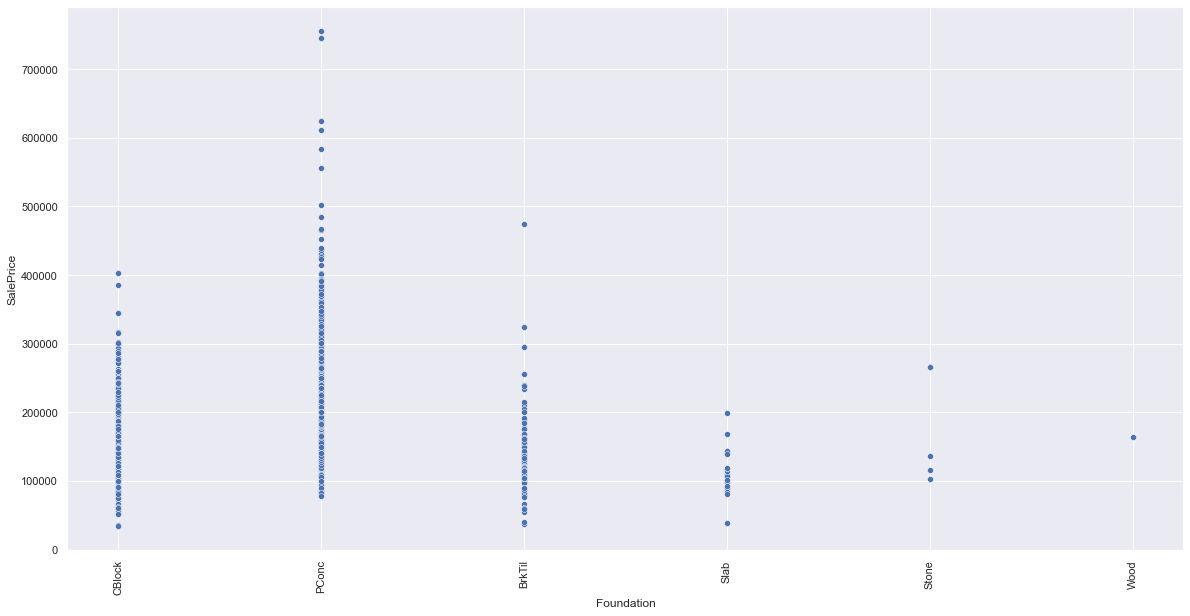

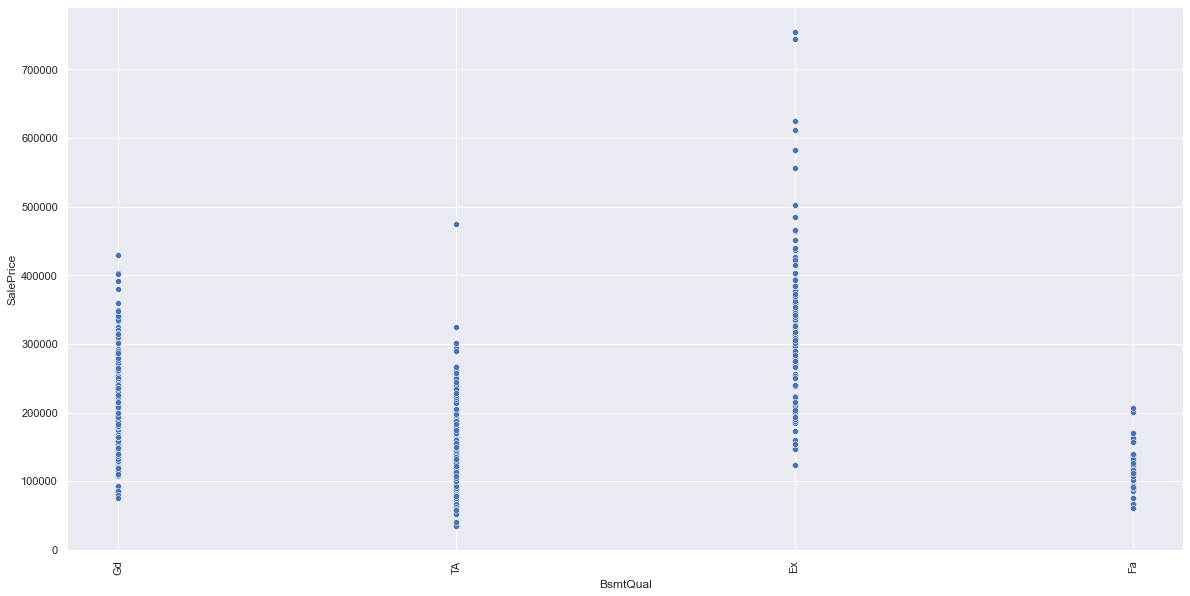

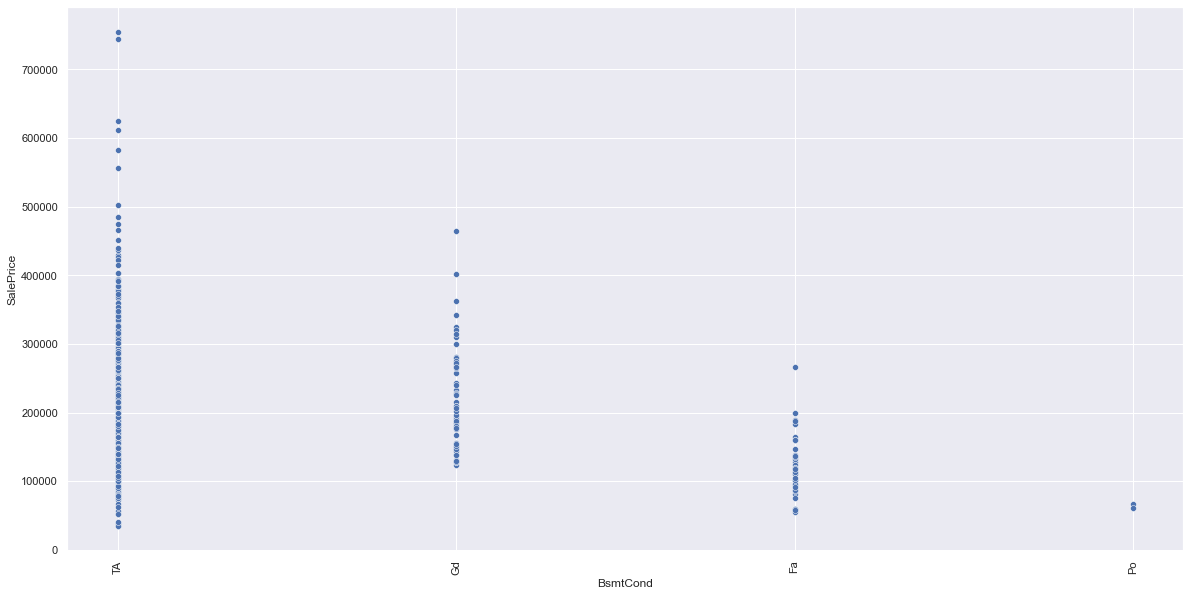

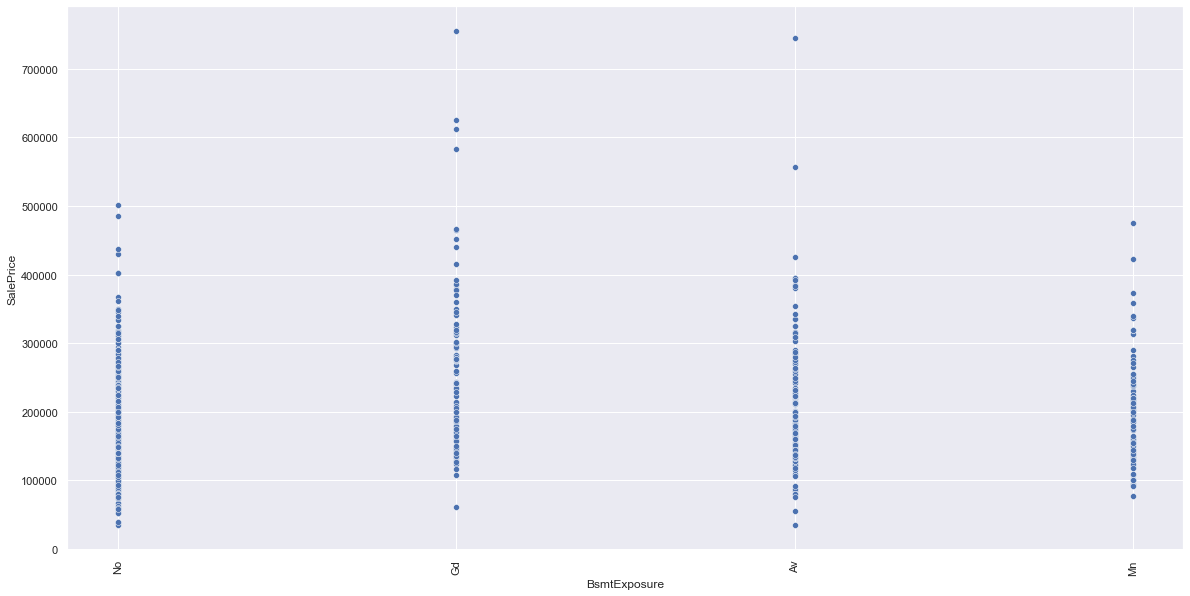

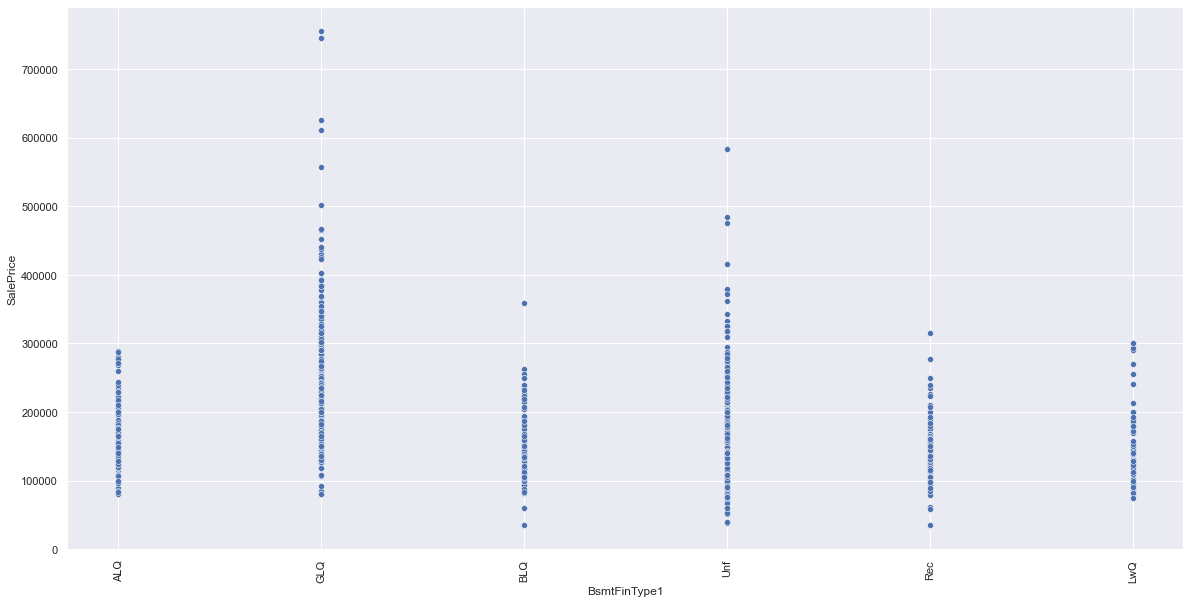

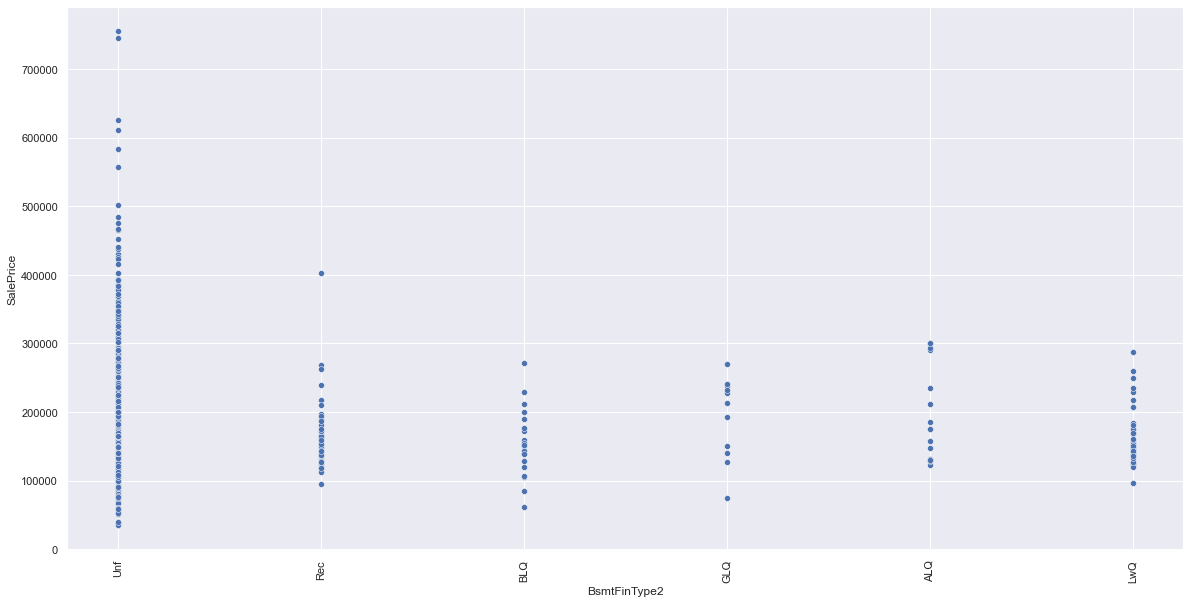

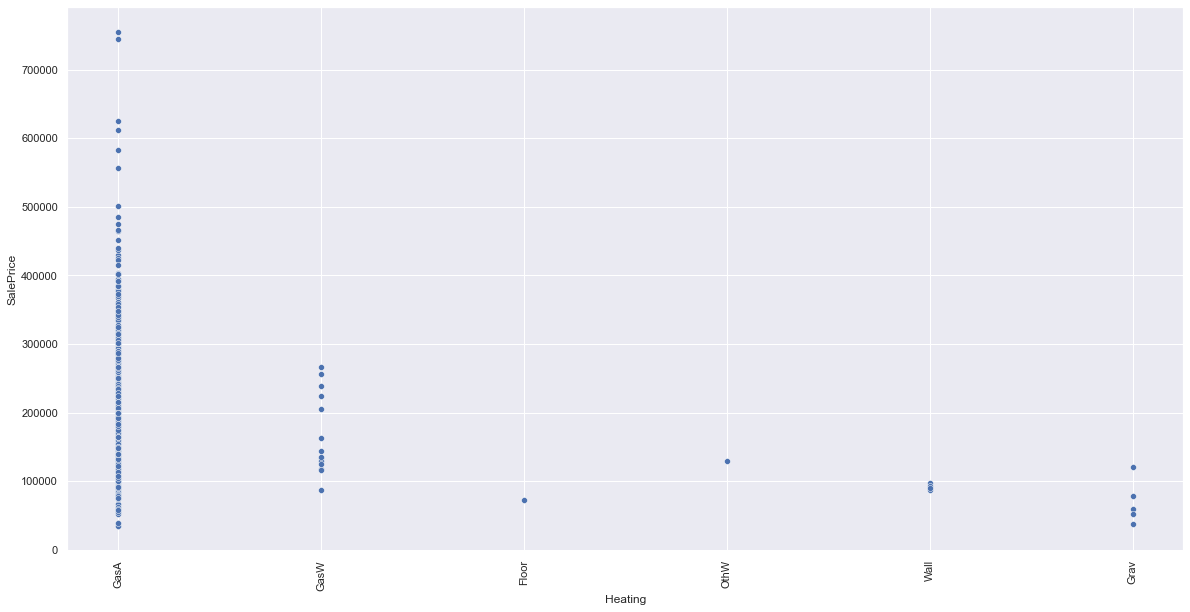

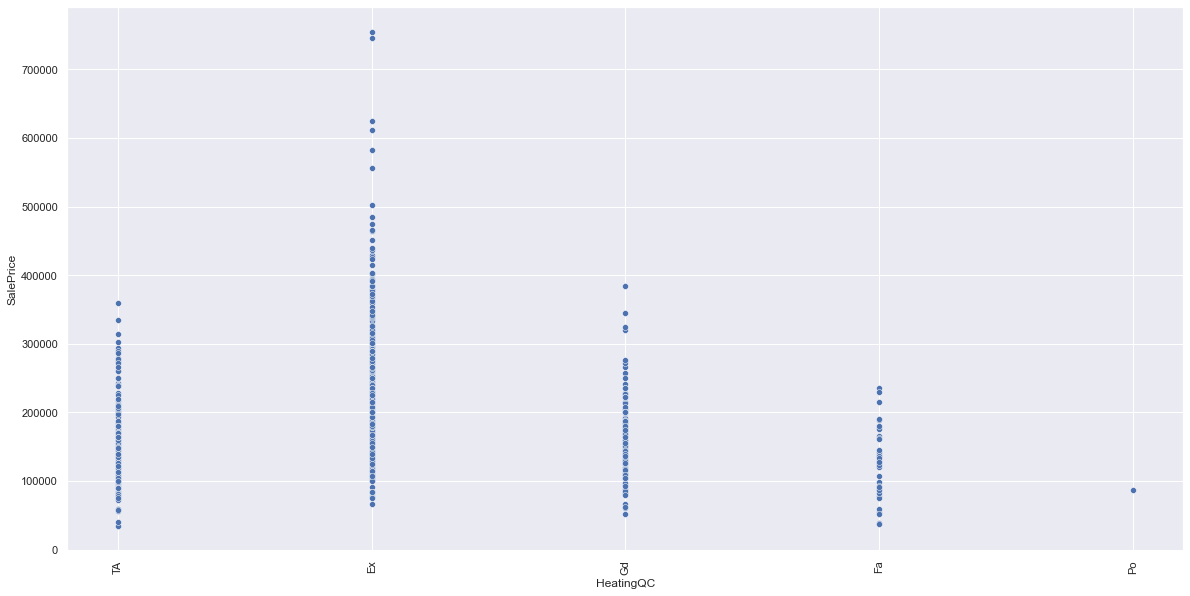

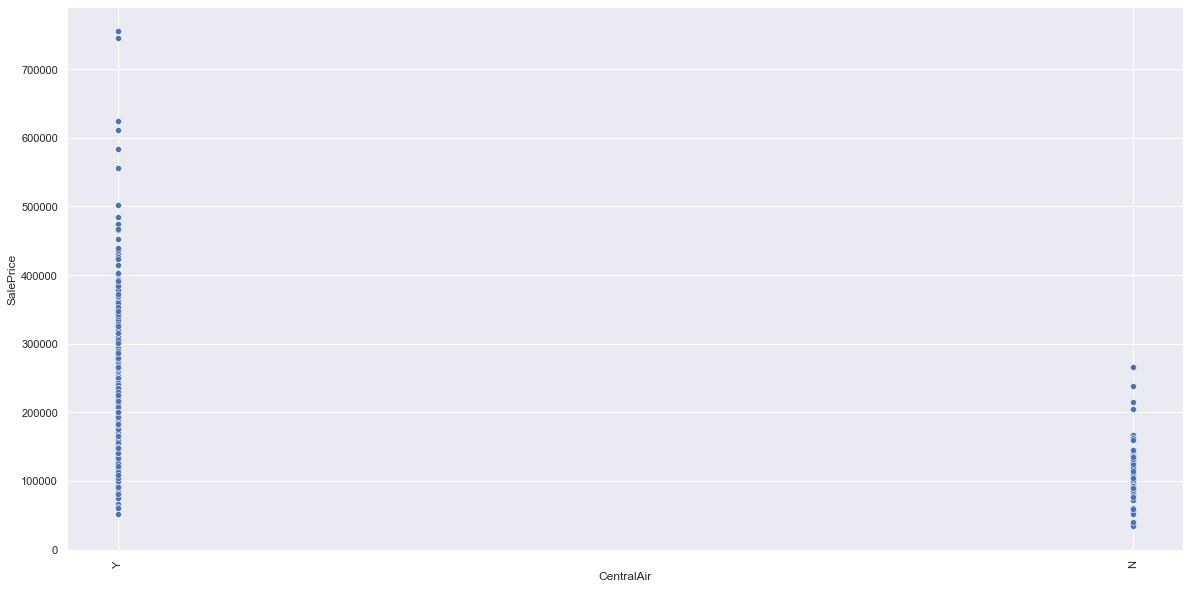

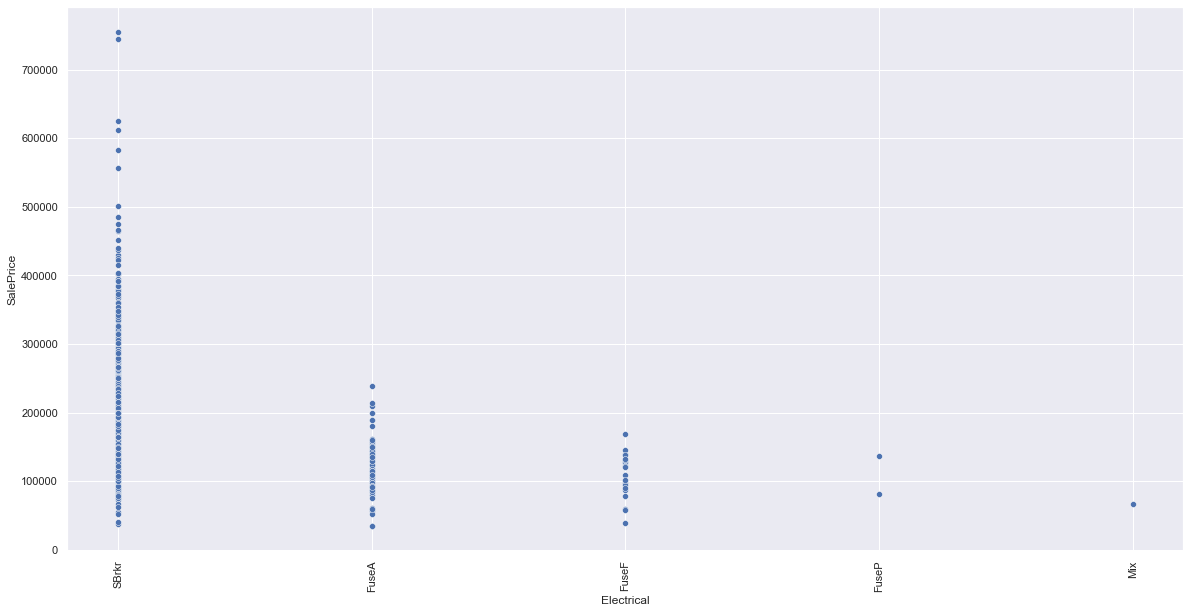

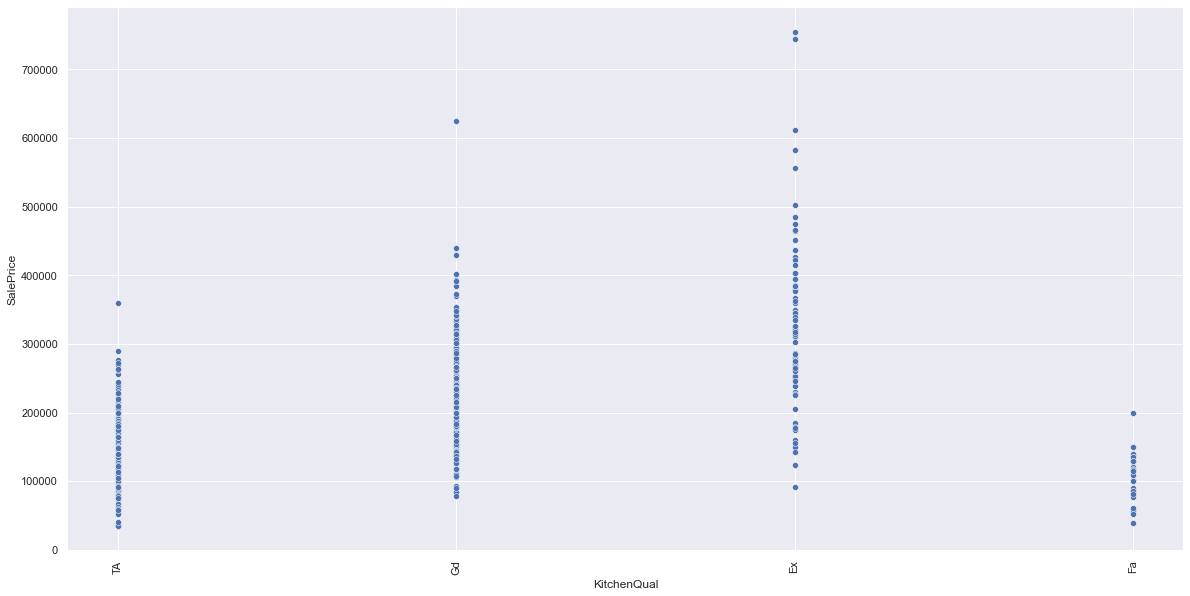

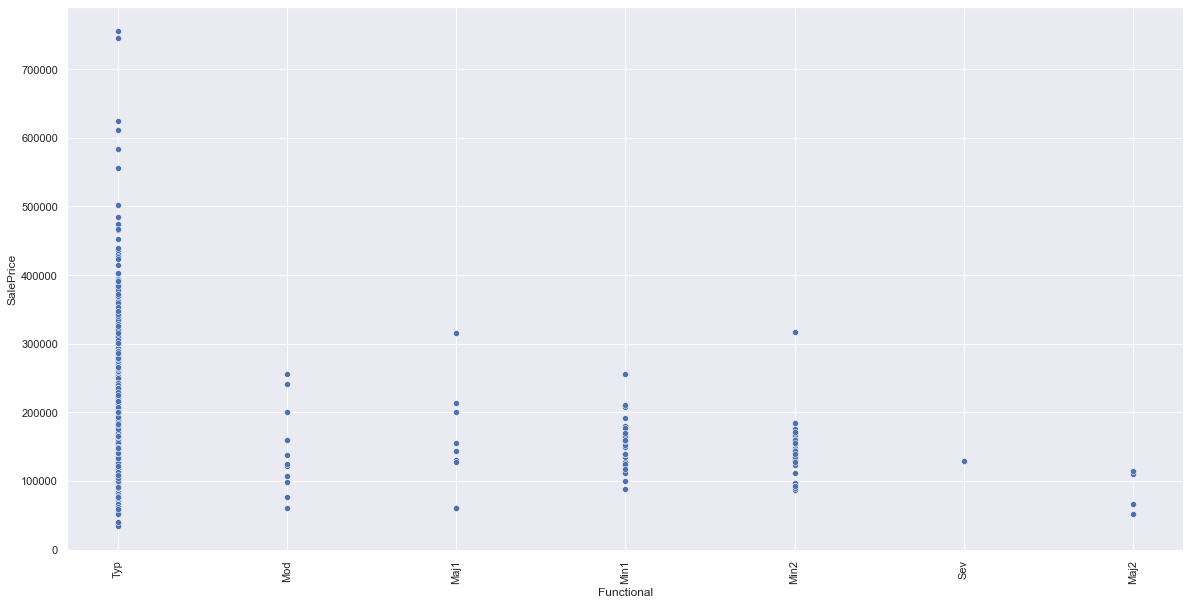

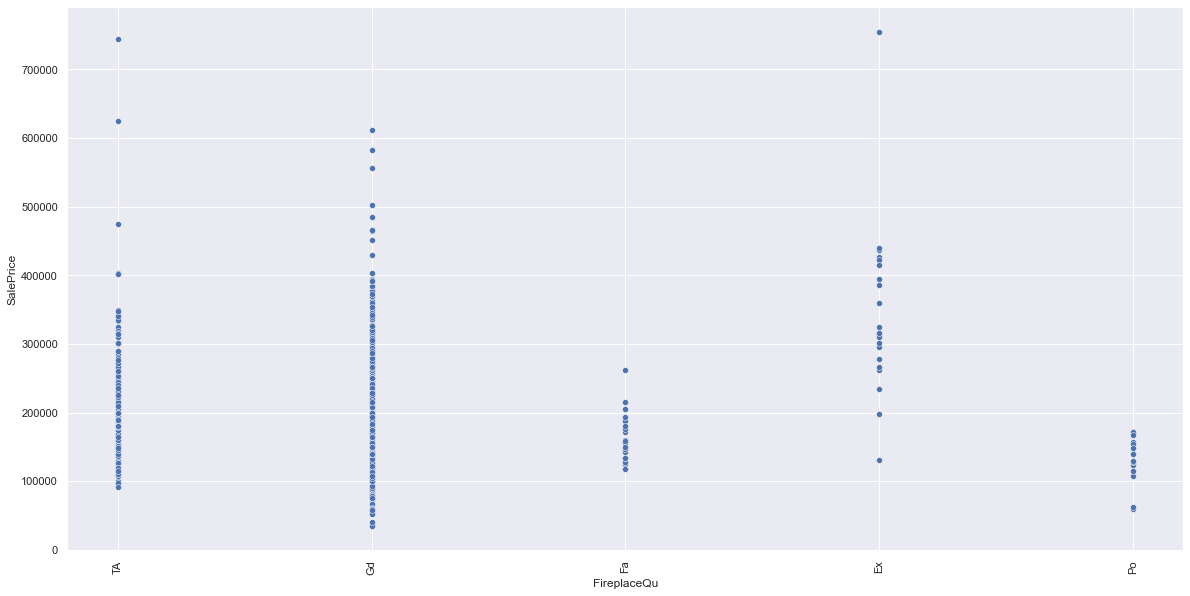

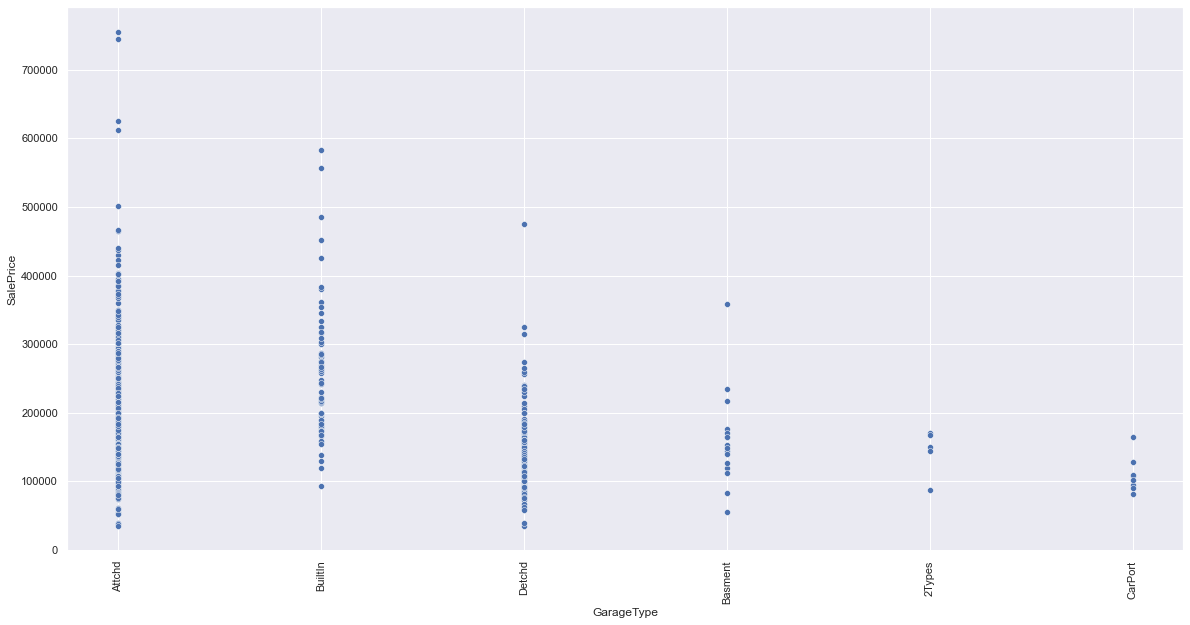

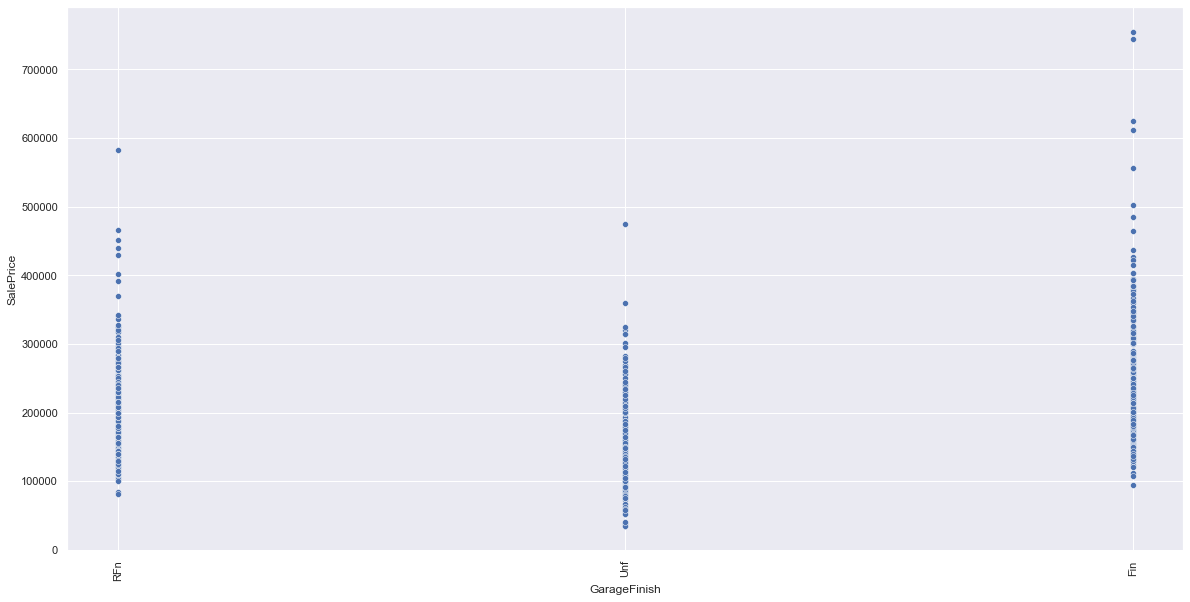

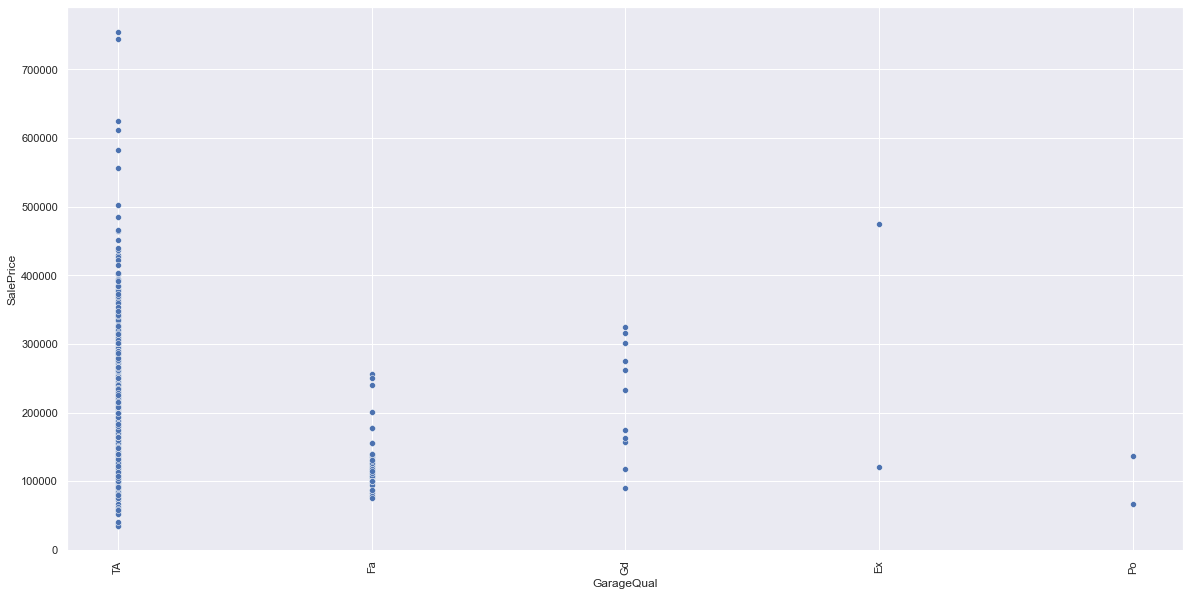

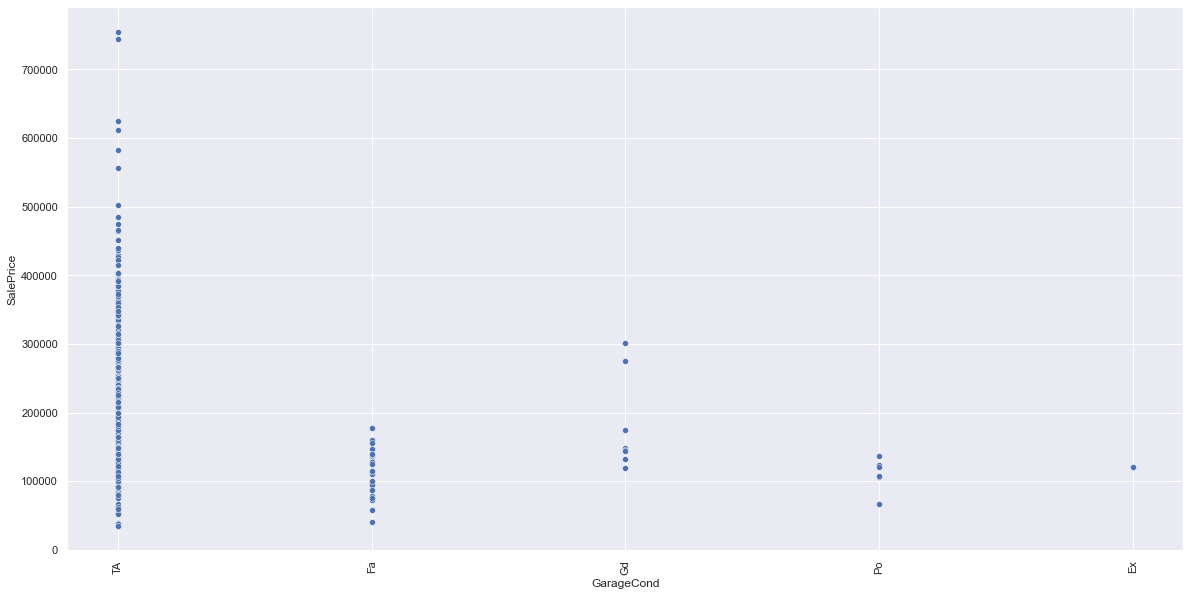

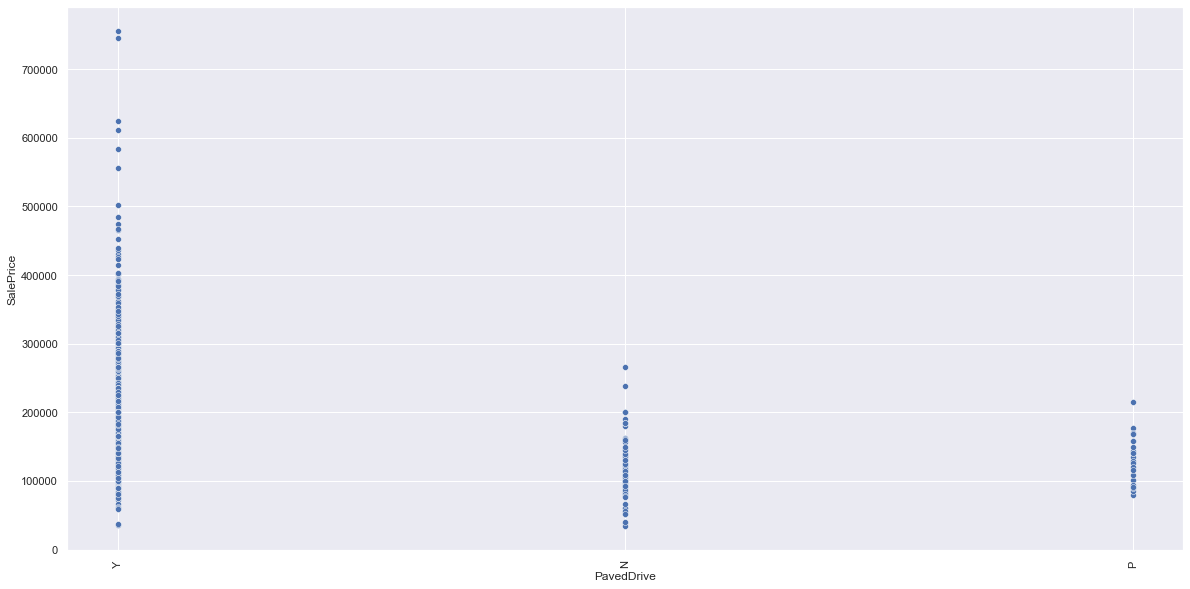

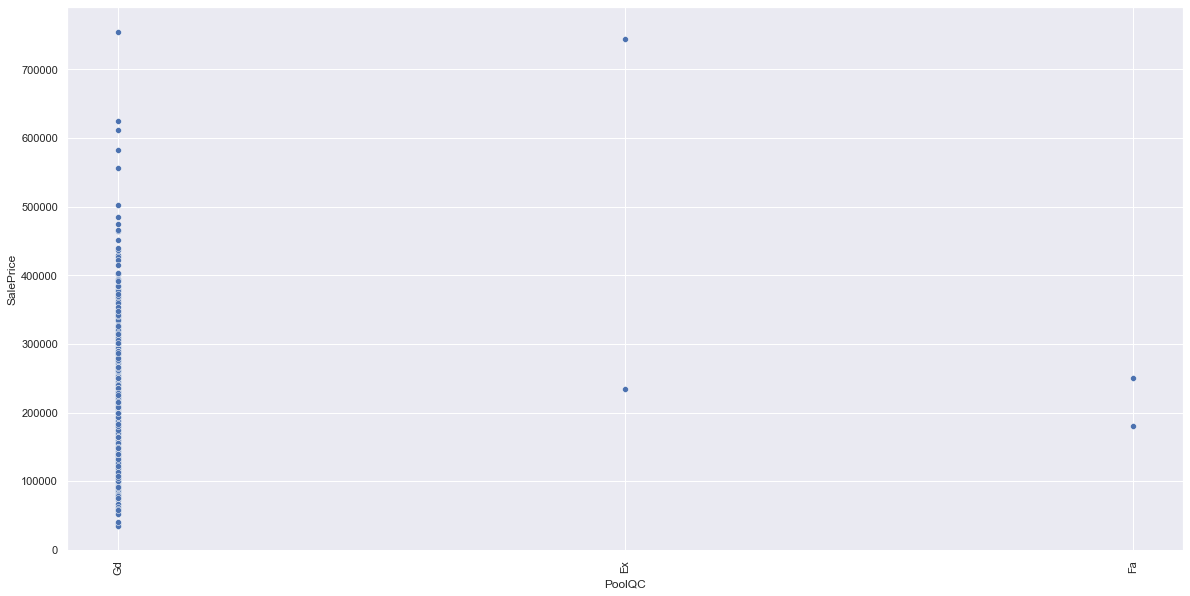

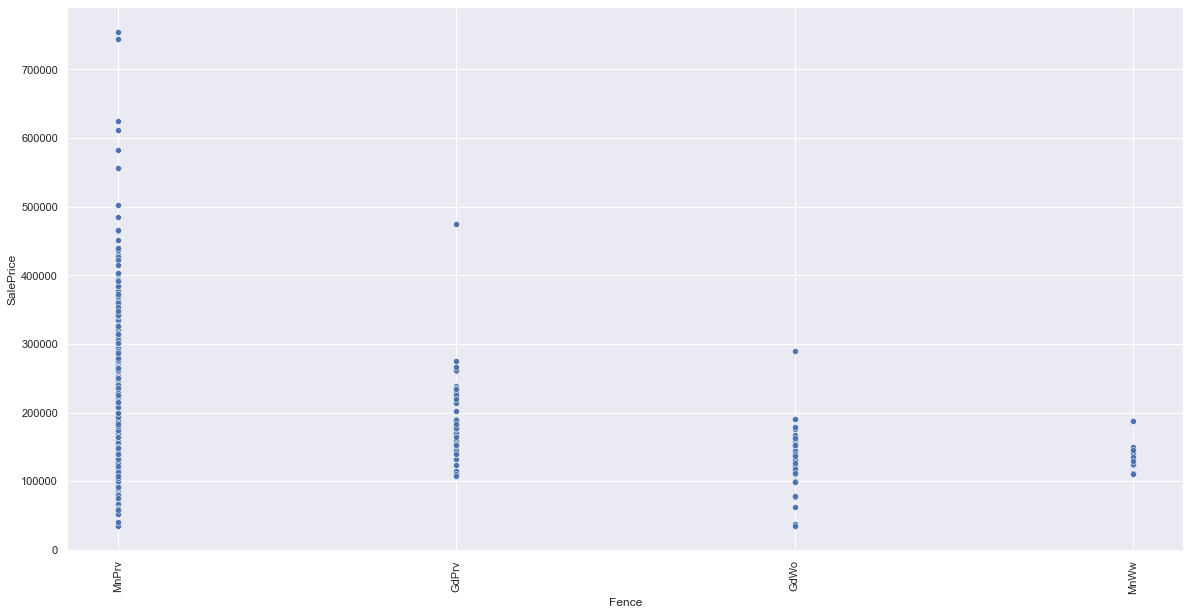

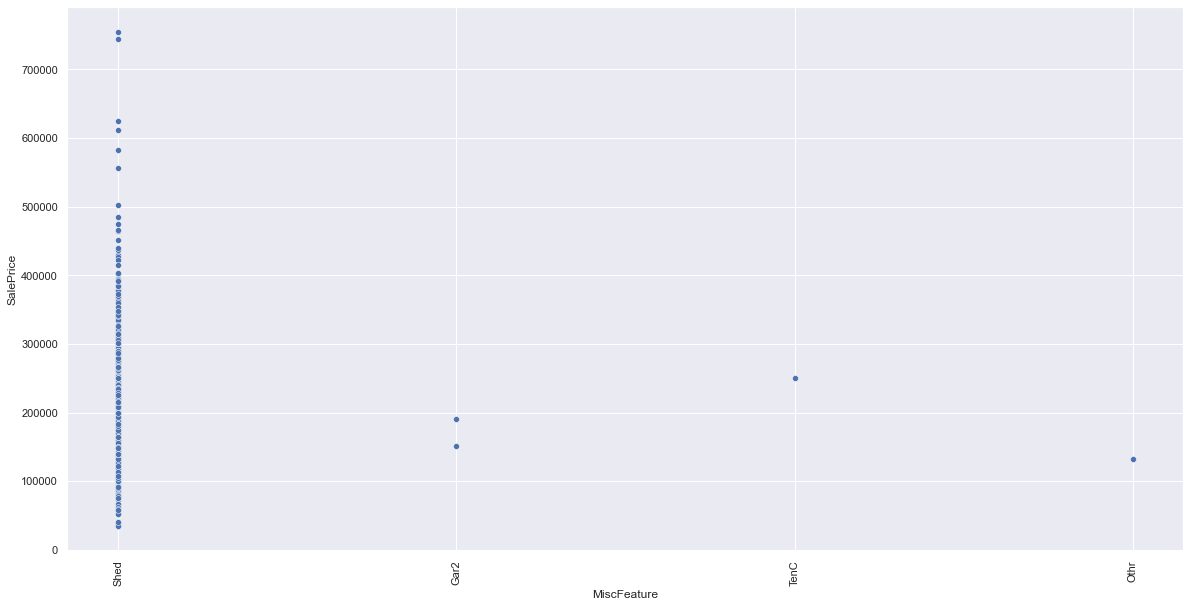

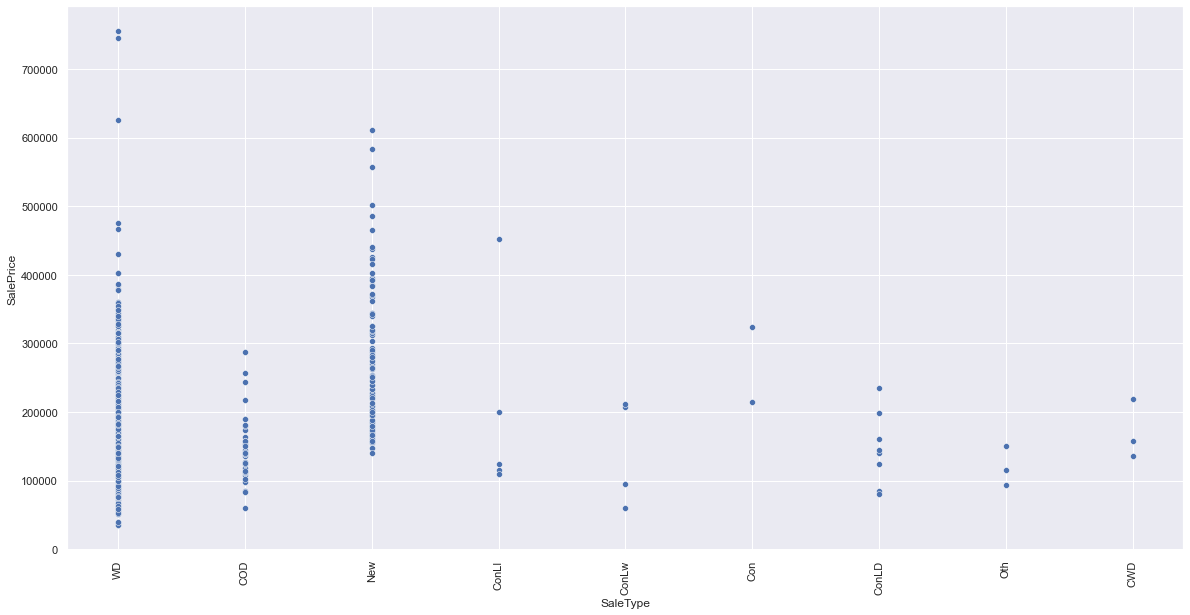

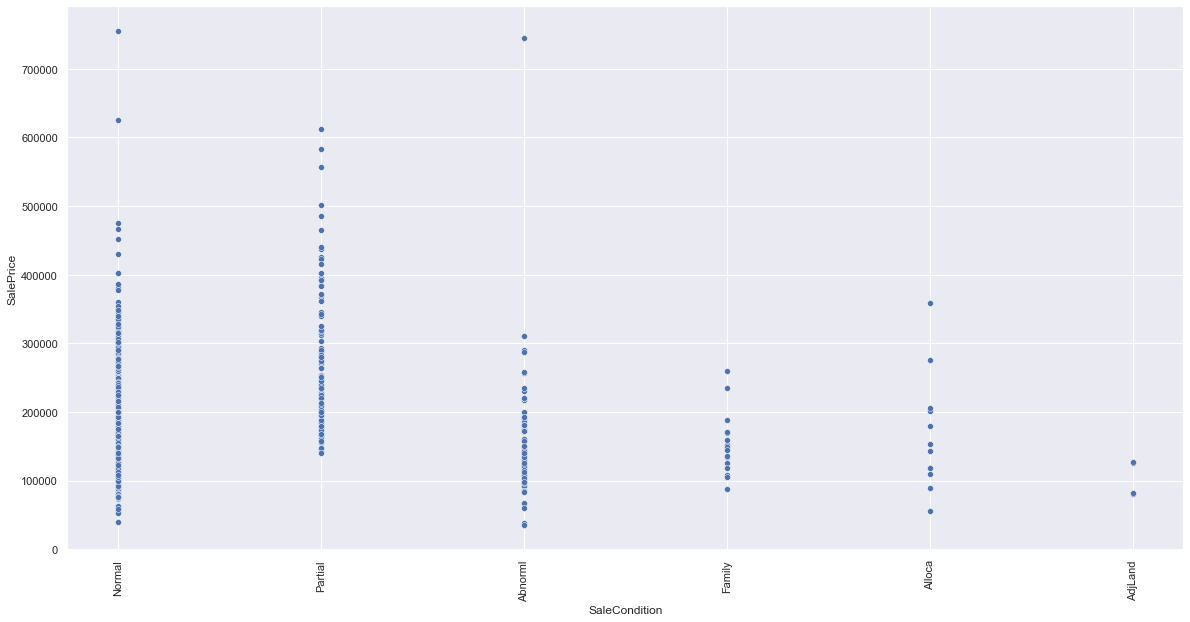

In [75]:
cat_data=df.select_dtypes(include='object')
#Plotting Scatter plot for each feature

for i in cat_data:
    plt.figure(figsize=(20,10))
    a=sns.scatterplot(x=df[i],y=df['SalePrice'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

## Encoding

In [76]:
oe=OrdinalEncoder()
for i in cat_data:
    df1=oe.fit_transform(df[[i]])
    df[i]=df1

## Describing the data

In [10]:
cont_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    71.036342   10484.749144     6.104452   
std     416.159877    41.940650    22.690926    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    68.282192    9522.500000     6.000000   
75%    1079.500000    70.000000    80.000000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.047152   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Checking correlation

In [11]:
df.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.004259  0.009307    -0.008279 -0.029212   
MSSubClass     0.004259    1.000000  0.007478    -0.336612 -0.124151   
MSZoning       0.009307    0.007478  1.000000    -0.066144 -0.023328   
LotFrontage   -0.008279   -0.336612 -0.066144     1.000000  0.293811   
LotArea       -0.029212   -0.124151 -0.023328     0.293811  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.023479   -0.016015 -0.051646     0.023248  0.015141   
YrSold        -0.008853   -0.038595 -0.004964    -0.011595 -0.035399   
SaleType       0.024384    0.035050  0.079854    -0.040561  0.005421   
SaleCondition -0.014726   -0.028981  0.004501     0.053376  0.034236   
SalePrice     -0.023897   -0.060775 -0.133221     0.318795  0.249499   

                 Street     Alley  LotShape  LandContour  Utilities  ...  \
Id             0.003613 -0.009049  0.022978    -0.020245        NaN  ...   
MSSubClass    -0.035981  0.216396  0.104485    -0.021387        NaN  ...   
MSZoning       0.140215 -0.371755  0.053655     0.001175        NaN  ...   
LotFrontage   -0.043595 -0.187116 -0.151934    -0.075193        NaN  ...   
LotArea       -0.263973 -0.093239 -0.189201    -0.159038        NaN  ...   
...                 ...       ...       ...          ...        ...  ...   
MoSold        -0.008860 -0.050530 -0.050418    -0.023872        NaN  ...   
YrSold        -0.019635 -0.007352  0.021421     0.009499        NaN  ...   
SaleType       0.025920 -0.002348 -0.015161    -0.041763        NaN  ...   
SaleCondition  0.014176 -0.043124 -0.054905     0.047715        NaN  ...   
SalePrice      0.044753 -0.029798 -0.248171     0.032836        NaN  ...   

               PoolArea    PoolQC     Fence  MiscFeature   MiscVal    MoSold  \
Id             0.065832 -0.013705 -0.003887     0.005644  0.001304  0.023479   
MSSubClass     0.009583 -0.002076  0.043111     0.005979 -0.023503 -0.016015   
MSZoning      -0.001663  0.001204 -0.035770     0.000802  0.003416 -0.051646   
LotFrontage    0.188853 -0.163345 -0.052612     0.016757 -0.010863  0.023248   
LotArea        0.097107 -0.047619 -0.003495    -0.017412  0.051679  0.015141   
...                 ...       ...       ...          ...       ...       ...   
MoSold        -0.038624  0.034737 -0.015444    -0.002149 -0.008773  1.000000   
YrSold        -0.066063  0.061556 -0.021308     0.001527 -0.008439 -0.144536   
SaleType       0.014047 -0.018351 -0.003769    -0.012223  0.015900 -0.063667   
SaleCondition -0.074354  0.121812  0.045229    -0.007701  0.012178 -0.003462   
SalePrice      0.103280 -0.152611  0.040678     0.018725 -0.013071  0.072764   

                 YrSold  SaleType  SaleCondition  SalePrice  
Id            -0.008853  0.024384      -0.014726  -0.023897  
MSSubClass    -0.038595  0.035050      -0.028981  -0.060775  
MSZoning      -0.004964  0.079854       0.004501  -0.133221  
LotFrontage   -0.011595 -0.040561       0.053376   0.318795  
LotArea       -0.035399  0.005421       0.034236   0.249499  
...                 ...       ...            ...        ...  
MoSold        -0.144536 -0.063667      -0.003462   0.072764  
YrSold         1.000000  0.013606       0.024505  -0.045508  
SaleType       0.013606  1.000000       0.143557  -0.050851  
SaleCondition  0.024505  0.143557       1.000000   0.217687  
SalePrice     -0.045508 -0.050851       0.217687   1.000000  

[81 rows x 81 columns]

In [14]:
# Plotting heat map for better analysis

sns.set(rc = {'figure.figsize':(200,200)})
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

<AxesSubplot:>

Observation: We can see that multicollinearity exists so we need to check vif score and also utilities is not having any relation with other features.Above also we have observed that utilities has same value for all so we can drop this column.

In [77]:
df=df.drop(['Utilities'],axis=1)

## VIF

In [24]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

             vif       features
0   4.320271e+00             Id
1   1.430124e+01     MSSubClass
2   3.825154e+01       MSZoning
3   1.958975e+01    LotFrontage
4   4.173071e+00        LotArea
5   3.506353e+02         Street
6   1.534318e+00          Alley
7   3.656301e+00       LotShape
8   2.187940e+01    LandContour
9   5.167430e+00      LotConfig
10  1.686429e+00      LandSlope
11  6.541764e+00   Neighborhood
12  7.492508e+00     Condition1
13  7.574749e+01     Condition2
14  5.354452e+00       BldgType
15  8.384544e+00     HouseStyle
16  8.752123e+01    OverallQual
17  5.190945e+01    OverallCond
18  3.410813e+04      YearBuilt
19  2.695380e+04   YearRemodAdd
20  5.040620e+00      RoofStyle
21  4.870547e+00       RoofMatl
22  3.870229e+01    Exterior1st
23  3.668161e+01    Exterior2nd
24  1.265315e+01     MasVnrType
25  2.356352e+00     MasVnrArea
26  3.869535e+01      ExterQual
27  3.207835e+01      ExterCond
28  1.019822e+01     Foundation
29  1.954072e+01       BsmtQual
30  2.18

Lets first drop those features with vif as infinity

In [78]:
df=df.drop(['BsmtFinSF1','1stFlrSF','GrLivArea'],axis=1)

In [54]:
#Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

           vif       features
0     1.068009             Id
1     5.978129     MSSubClass
2    38.562879       MSZoning
3     2.180851    LotFrontage
4     2.896124        LotArea
5   315.766231         Street
6     1.552116          Alley
7     3.749768       LotShape
8    21.623008    LandContour
9     5.105895      LotConfig
10    1.568961      LandSlope
11    6.536099   Neighborhood
12    7.476710     Condition1
13   70.373987     Condition2
14    5.436328       BldgType
15    8.597823     HouseStyle
16    4.347712    OverallQual
17    1.984210    OverallCond
18    9.876442      YearBuilt
19    3.217977   YearRemodAdd
20    5.024137      RoofStyle
21    4.728314       RoofMatl
22   38.453155    Exterior1st
23   36.548581    Exterior2nd
24   14.435361     MasVnrType
25    1.985726     MasVnrArea
26   38.487173      ExterQual
27   31.783678      ExterCond
28   10.423586     Foundation
29   19.689131       BsmtQual
30   21.838813       BsmtCond
31    8.080196   BsmtExposure
32    6.28

In [79]:
df=df.drop(['PoolQC'],axis=1)
#Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

             vif       features
0       4.317294             Id
1      14.228703     MSSubClass
2      38.209374       MSZoning
3      19.118091    LotFrontage
4       4.143442        LotArea
5     350.178271         Street
6       1.530948          Alley
7       3.654761       LotShape
8      21.800843    LandContour
9       5.164624      LotConfig
10      1.685807      LandSlope
11      6.541624   Neighborhood
12      7.488800     Condition1
13     75.609986     Condition2
14      5.270069       BldgType
15      8.333740     HouseStyle
16     87.432293    OverallQual
17     51.130539    OverallCond
18  33218.346194      YearBuilt
19  26797.029295   YearRemodAdd
20      4.971050      RoofStyle
21      4.689802       RoofMatl
22     38.331489    Exterior1st
23     36.451988    Exterior2nd
24     12.579499     MasVnrType
25      2.330914     MasVnrArea
26     38.273667      ExterQual
27     32.049969      ExterCond
28      9.956051     Foundation
29     19.485759       BsmtQual
30     2

In [80]:
df=df.drop(['MiscFeature'],axis=1)
#Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

             vif       features
0       4.317291             Id
1      14.223460     MSSubClass
2      38.201840       MSZoning
3      19.106138    LotFrontage
4       4.142302        LotArea
5     349.632023         Street
6       1.530791          Alley
7       3.654420       LotShape
8      21.799303    LandContour
9       5.164456      LotConfig
10      1.685785      LandSlope
11      6.540414   Neighborhood
12      7.461033     Condition1
13     73.597154     Condition2
14      5.270014       BldgType
15      8.333538     HouseStyle
16     87.295414    OverallQual
17     51.126941    OverallCond
18  33064.176868      YearBuilt
19  26787.705270   YearRemodAdd
20      4.946122      RoofStyle
21      4.684875       RoofMatl
22     38.330221    Exterior1st
23     36.451136    Exterior2nd
24     12.552182     MasVnrType
25      2.328393     MasVnrArea
26     38.272501      ExterQual
27     32.049740      ExterCond
28      9.930947     Foundation
29     19.478119       BsmtQual
30     2

In [81]:
df=df.drop(['Street'],axis=1)
#Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

             vif       features
0       4.316537             Id
1      14.203685     MSSubClass
2      37.348333       MSZoning
3      19.090653    LotFrontage
4       3.872497        LotArea
5       1.525413          Alley
6       3.647748       LotShape
7      21.748955    LandContour
8       5.164303      LotConfig
9       1.685593      LandSlope
10      6.540390   Neighborhood
11      7.458695     Condition1
12     73.596587     Condition2
13      5.265409       BldgType
14      8.332788     HouseStyle
15     87.239314    OverallQual
16     51.126682    OverallCond
17  33062.594973      YearBuilt
18  26740.848681   YearRemodAdd
19      4.945105      RoofStyle
20      4.675211       RoofMatl
21     38.302037    Exterior1st
22     36.428187    Exterior2nd
23     12.542402     MasVnrType
24      2.325594     MasVnrArea
25     37.724871      ExterQual
26     32.023726      ExterCond
27      9.915465     Foundation
28     19.460932       BsmtQual
29     21.748786       BsmtCond
30      

In [82]:
df=df.drop(['BsmtFinType2'],axis=1)
#Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

             vif       features
0       4.293053             Id
1      14.203657     MSSubClass
2      37.346195       MSZoning
3      19.088014    LotFrontage
4       3.862531        LotArea
5       1.525396          Alley
6       3.647745       LotShape
7      21.681861    LandContour
8       5.160225      LotConfig
9       1.684285      LandSlope
10      6.533834   Neighborhood
11      7.445152     Condition1
12     73.468627     Condition2
13      5.264747       BldgType
14      8.332244     HouseStyle
15     87.141937    OverallQual
16     50.683328    OverallCond
17  33011.594298      YearBuilt
18  26706.977257   YearRemodAdd
19      4.942494      RoofStyle
20      4.650922       RoofMatl
21     38.298208    Exterior1st
22     36.427468    Exterior2nd
23     12.533011     MasVnrType
24      2.320092     MasVnrArea
25     37.624023      ExterQual
26     32.005828      ExterCond
27      9.898214     Foundation
28     19.440797       BsmtQual
29     21.697295       BsmtCond
30      

In [83]:
df=df.drop(['GarageCond'],axis=1)
#Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

             vif       features
0       4.293034             Id
1      14.203043     MSSubClass
2      37.342643       MSZoning
3      19.085835    LotFrontage
4       3.858439        LotArea
5       1.525390          Alley
6       3.646110       LotShape
7      21.639484    LandContour
8       5.159000      LotConfig
9       1.680443      LandSlope
10      6.533420   Neighborhood
11      7.444776     Condition1
12     73.370485     Condition2
13      5.264205       BldgType
14      8.295520     HouseStyle
15     87.103184    OverallQual
16     50.663270    OverallCond
17  32988.421964      YearBuilt
18  26678.421914   YearRemodAdd
19      4.942416      RoofStyle
20      4.649081       RoofMatl
21     38.255363    Exterior1st
22     36.422810    Exterior2nd
23     12.516824     MasVnrType
24      2.316317     MasVnrArea
25     37.620150      ExterQual
26     32.005551      ExterCond
27      9.896817     Foundation
28     19.326649       BsmtQual
29     21.322143       BsmtCond
30      

In [84]:
y=df['SalePrice']
df=df.drop(['GarageQual','SalePrice'],axis=1)
#Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

             vif       features
0       4.292240             Id
1      14.075439     MSSubClass
2      37.025175       MSZoning
3      18.987662    LotFrontage
4       3.844828        LotArea
5       1.525318          Alley
6       3.636285       LotShape
7      21.498834    LandContour
8       5.149007      LotConfig
9       1.678074      LandSlope
10      6.500154   Neighborhood
11      7.416041     Condition1
12     72.946973     Condition2
13      5.261583       BldgType
14      8.214155     HouseStyle
15     80.990635    OverallQual
16     49.843649    OverallCond
17  32636.249281      YearBuilt
18  26546.526210   YearRemodAdd
19      4.897231      RoofStyle
20      4.539109       RoofMatl
21     38.171106    Exterior1st
22     36.405378    Exterior2nd
23     12.479925     MasVnrType
24      2.273178     MasVnrArea
25     37.307704      ExterQual
26     31.819680      ExterCond
27      9.813336     Foundation
28     18.724346       BsmtQual
29     21.270580       BsmtCond
30      

In [85]:
df=df.drop(['Condition2','ExterQual','Exterior1st'],axis=1)
#Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

             vif       features
0       4.276976             Id
1      13.915038     MSSubClass
2      36.644551       MSZoning
3      18.969998    LotFrontage
4       3.821381        LotArea
5       1.522967          Alley
6       3.625687       LotShape
7      21.420834    LandContour
8       5.126422      LotConfig
9       1.671640      LandSlope
10      6.481973   Neighborhood
11      7.344891     Condition1
12      5.213578       BldgType
13      8.176183     HouseStyle
14     78.947974    OverallQual
15     49.625214    OverallCond
16  32349.016834      YearBuilt
17  26446.956594   YearRemodAdd
18      4.841241      RoofStyle
19      4.538667       RoofMatl
20     10.389911    Exterior2nd
21     12.438559     MasVnrType
22      2.242586     MasVnrArea
23     31.515586      ExterCond
24      9.736408     Foundation
25     18.337554       BsmtQual
26     21.223237       BsmtCond
27      7.447172   BsmtExposure
28      6.478569   BsmtFinType1
29      1.306525     BsmtFinSF2
30      

## Checking outliers

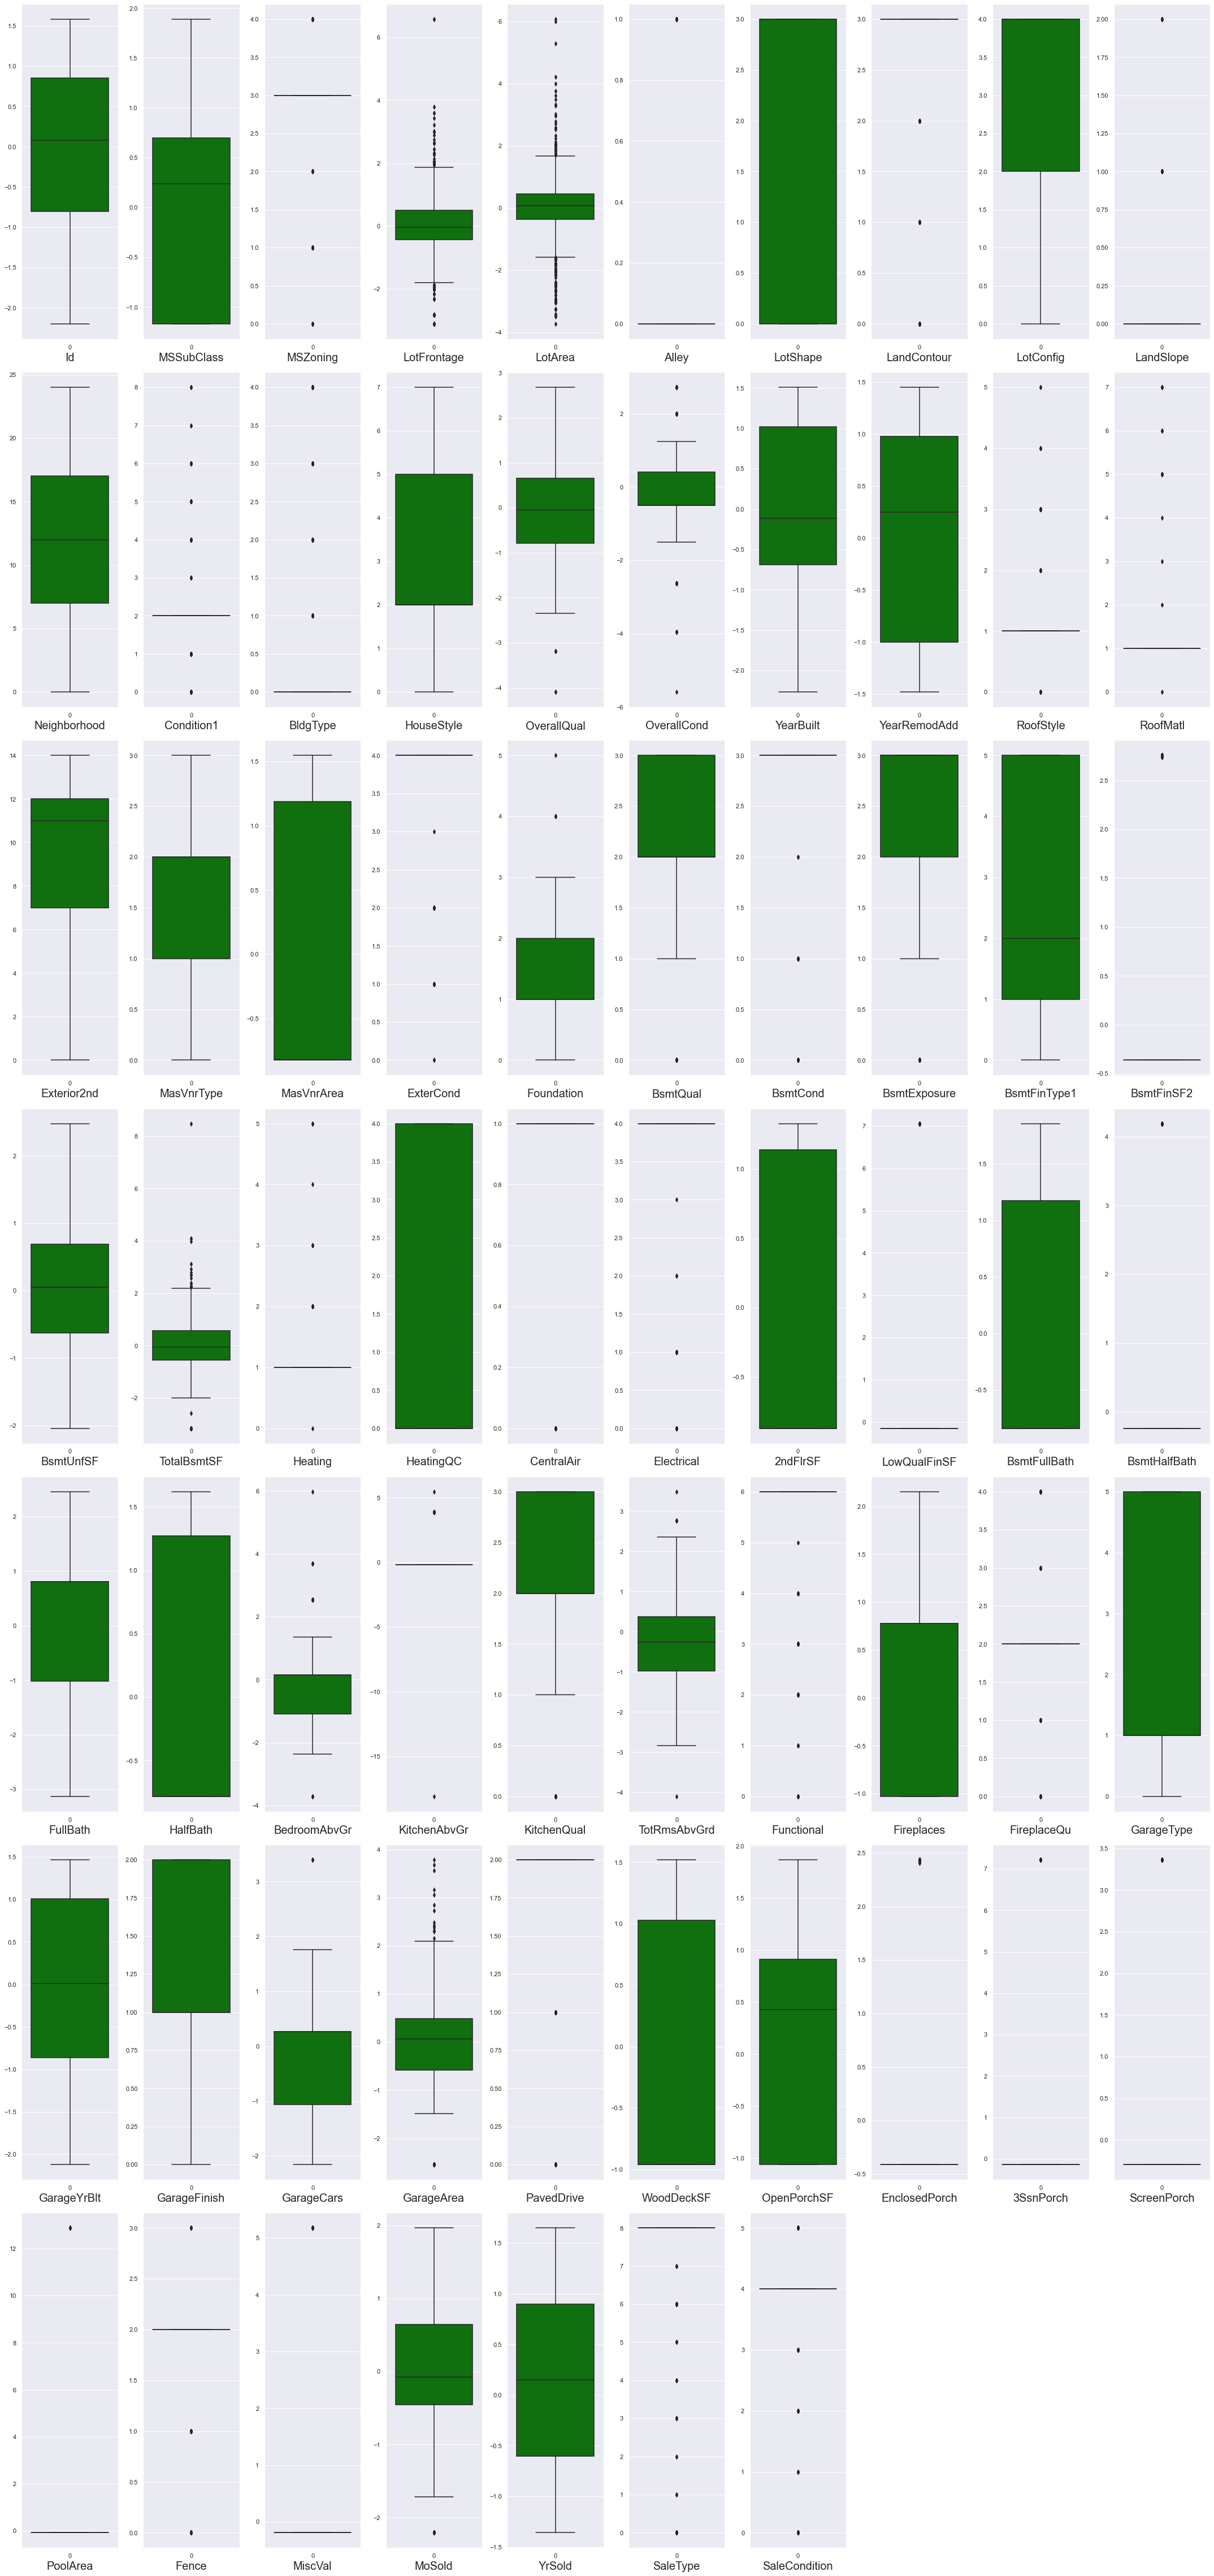

In [62]:
col=df.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

Outliers are present we need to treat it.

## Checking Skewness

In [63]:
with pd.option_context('display.max_rows',None):
    print(df.skew())


Id               -0.268486
MSSubClass        0.064007
MSZoning         -1.796785
LotFrontage       0.146819
LotArea           0.032509
Alley             5.436187
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.021658
OverallCond       0.048063
YearBuilt        -0.126641
YearRemodAdd     -0.225131
RoofStyle         1.498560
RoofMatl          7.577352
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        0.416370
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
Heating          10.103609
HeatingQC         0.449933
CentralAir       -3.475188
Electrical       -3.104209
2ndFlrSF          0.280208
L

Skewness is also present.

## Treating outliers

In [89]:
#Getting sure of outliers using z score



z=np.abs(zscore(df))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {1, 3, 4, 7, 8, 9, 10, 13, 14, 15, 18, 20, 22, 23, 25, 26, 27, 28, 29, 32, 33, 38, 39, 40, 42, 43, 46, 47, 48, 49, 51, 52, 54, 56, 58, 63, 64, 66, 68, 72, 73, 74, 76, 77, 81, 82, 83, 84, 85, 88, 89, 91, 93, 94, 95, 96, 97, 98, 99, 103, 106, 107, 112, 113, 114, 115, 119, 120, 122, 123, 124, 127, 128, 129, 130, 132, 133, 138, 140, 141, 142, 143, 146, 150, 151, 152, 153, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 170, 171, 174, 176, 177, 178, 180, 183, 184, 185, 186, 187, 191, 192, 195, 196, 197, 202, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 216, 217, 219, 221, 224, 225, 226, 228, 229, 232, 237, 238, 240, 241, 243, 244, 245, 247, 249, 253, 254, 255, 256, 257, 259, 266, 267, 269, 271, 272, 275, 277, 278, 279, 284, 287, 289, 290, 292, 295, 297, 298, 299, 301, 302, 303, 304, 305, 307, 308, 309, 310, 311, 312, 313, 318, 319, 320, 321, 323, 324, 325, 327, 329, 330, 333, 334, 335, 336, 338, 339, 341, 342, 344, 345, 346, 350, 351, 352, 354, 355, 356, 357, 35

In [45]:
df.shape

(1168, 80)

In [90]:
#Calculating Data Loss
loss=((1168-660)/1168)*100
print("The data loss-",100-loss,"%")

The data loss- 56.50684931506849 %


Since data loss is very high and its a regressive model so maybe these outliers are actually not an outlier, so we would proceed like this.

## Treating Skewness

In [91]:
#using yeo-johnson transformation
#using yeo-johnson transformation
df=power_transform(df,method='yeo-johnson')
df

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.89957552,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14807039,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.3590026 ,
         0.40906852,  0.02973497]])

## Standardization

In [92]:
scaler=StandardScaler()
x=scaler.fit_transform(df)
x

array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60482475,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60482475,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60482475,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.899557  ,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14805187,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.35902113,
         0.40906852,  0.02973497]])

## Train Test Split

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
max_ac=0
randomState=0
lr=LinearRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        if round(r2_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(r2_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 6

Train Accuracy-  82.3

Test Accuracy-  82.3


At random state: 357

Train Accuracy-  82.1

Test Accuracy-  82.1


At random state: 381

Train Accuracy-  82.3

Test Accuracy-  82.3


At random state: 457

Train Accuracy-  82.2

Test Accuracy-  82.2


 Best accuracy at random state- 6


## Linear Regression

In [94]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
lr_train_acc=round(r2_score(y_train,pred_train)*100,1)
lr_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",lr_train_acc)
print("\nTest Accuracy- ",lr_test_acc)


Train Accuracy-  81.8

Test Accuracy-  82.6


## Cross validation score

In [95]:
for i in range(2,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",lr_test_acc)



At cv- 2

 cross validation score is- 74.23731733229495

 Accuracy score is- 82.6


At cv- 3

 cross validation score is- 75.50787514287907

 Accuracy score is- 82.6


At cv- 4

 cross validation score is- 76.71719221856243

 Accuracy score is- 82.6


At cv- 5

 cross validation score is- 75.85841814485622

 Accuracy score is- 82.6


At cv- 6

 cross validation score is- 76.97682159972085

 Accuracy score is- 82.6


At cv- 7

 cross validation score is- 76.68614742456079

 Accuracy score is- 82.6


At cv- 8

 cross validation score is- 76.99469642833299

 Accuracy score is- 82.6


At cv- 9

 cross validation score is- 76.7394671750806

 Accuracy score is- 82.6


At cv- 10

 cross validation score is- 77.12592904908868

 Accuracy score is- 82.6


At cv- 11

 cross validation score is- 76.48512793262763

 Accuracy score is- 82.6


At cv- 12

 cross validation score is- 76.53419353968664

 Accuracy score is- 82.6


At cv- 13

 cross validation score is- 76.8360333664513

 Accuracy score

In [97]:
cv_score_best_lr=cross_val_score(lr,x,y,cv=10).mean()*100
print("cross validation score is-",cv_score_best_lr)
print("accuracy score for linear regression model is-",lr_test_acc)

cross validation score is- 77.12592904908868
accuracy score for linear regression model is- 82.6


## Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(r2_score(y_train,pred_train)*100,1)
rf_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  97.1

Test Accuracy-  87.9


## Cross validation score

In [101]:
for i in range(4,23):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 4

 cross validation score is- 82.61343034182613

 Accuracy score is- 87.9


At cv- 5

 cross validation score is- 83.1940535923233

 Accuracy score is- 87.9


At cv- 6

 cross validation score is- 83.5691091150372

 Accuracy score is- 87.9


At cv- 7

 cross validation score is- 82.49224287021113

 Accuracy score is- 87.9


At cv- 8

 cross validation score is- 84.06236533701686

 Accuracy score is- 87.9


At cv- 9

 cross validation score is- 83.7474433333083

 Accuracy score is- 87.9


At cv- 10

 cross validation score is- 82.57352889619861

 Accuracy score is- 87.9


At cv- 11

 cross validation score is- 82.6337293940517

 Accuracy score is- 87.9


At cv- 12

 cross validation score is- 83.02919847851884

 Accuracy score is- 87.9


At cv- 13

 cross validation score is- 82.4461992990722

 Accuracy score is- 87.9


At cv- 14

 cross validation score is- 81.22781123361537

 Accuracy score is- 87.9


At cv- 15

 cross validation score is- 82.64506769147036

 Accuracy score 

In [103]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=8).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest regression model is-",rf_test_acc)

cross validation score is- 84.3058280169497
accuracy score for random forest regression model is- 87.9


## XGBoost

In [104]:
from xgboost import XGBRegressor
xgmod=XGBRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)
xgmod.fit(x_train,y_train)
pred_train=xgmod.predict(x_train)
pred_test=xgmod.predict(x_test)
xg_train_acc=round(r2_score(y_train,pred_train)*100,1)
xg_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",xg_train_acc)
print("\nTest Accuracy- ",xg_test_acc)


Train Accuracy-  100.0

Test Accuracy-  81.7


## Cross Validation Score

In [105]:
cv_score_best_xg=cross_val_score(xgmod,x,y,cv=20).mean()*100
print("cross validation score is-",cv_score_best_xg)
print("accuracy score for Knn classifier model is-",xg_test_acc)

cross validation score is- 80.96035258551369
accuracy score for Knn classifier model is- 81.7


## Model Summary

In [106]:
models=['Linear Regression','Random Forest Regressor','XGBoost']
test_acc=[lr_test_acc,rf_test_acc,xg_test_acc]
cv_score=[cv_score_best_lr,cv_score_best_rf,cv_score_best_xg]
dfm=pd.DataFrame(list(zip(models,test_acc,cv_score)),columns=['Models','Test Accuracy','CV Score'])
dfm

Models  Test Accuracy   CV Score
0        Linear Regression           82.6  77.125929
1  Random Forest Regressor           87.9  84.305828
2                  XGBoost           81.7  80.960353

## Hyperparameter Tuning

In [107]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16],
    "bootstrap": [True, False],
    "min_samples_split": [2, 6, 10]
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


RandomForestRegressor(bootstrap=False, max_depth=50, max_features=10,
                      n_estimators=200)

In [108]:
rf1=RandomForestRegressor(bootstrap=False, max_depth=50, max_features=10,
                      n_estimators=200)
rf1.fit(x_train,y_train)
pred_train=rf1.predict(x_train)
pred_test=rf1.predict(x_test)
train_acc=round(r2_score(y_train,pred_train)*100,1)
test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  100.0

Test Accuracy-  84.2


Accuracy didnot improve so we will use our previous model only.

## Model Saving

In [109]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

## Testing Data

In [112]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [115]:
#LotFrontage
dtest['LotFrontage']=dtest['LotFrontage'].fillna(dtest.groupby('LotConfig')['LotFrontage'].transform('mean'))

#MasVnrType
dtest['MasVnrType']=dtest['MasVnrType'].fillna(dtest['MasVnrType'].agg(pd.Series.mode)[0])
#MasVnrArea
dtest['MasVnrArea']=dtest['MasVnrArea'].fillna(dtest['MasVnrArea'].mean())
#BsmtQual
dtest['BsmtQual']=dtest['BsmtQual'].fillna(dtest.groupby('Foundation')['BsmtQual'].agg(pd.Series.mode)[0])
#BsmtExposure
dtest['BsmtExposure']=dtest['BsmtExposure'].fillna(dtest['BsmtExposure'].agg(pd.Series.mode)[0])
#BsmtFinType1
dtest['BsmtFinType1']=dtest['BsmtFinType1'].fillna(dtest['BsmtFinType1'].agg(pd.Series.mode)[0])
#BsmtCond
dtest['BsmtCond']=dtest['BsmtCond'].fillna(dtest.groupby('BsmtFinType1')['BsmtCond'].agg(pd.Series.mode)[0])
#BsmtFinType2
dtest['BsmtFinType2']=dtest['BsmtFinType2'].fillna(dtest['BsmtFinType2'].agg(pd.Series.mode)[0])

#GarageYrBlt
dtest['GarageYrBlt']=dtest['GarageYrBlt'].fillna(dtest['GarageYrBlt'].agg(pd.Series.mode)[0])
#GarageType
dtest['GarageType']=dtest['GarageType'].fillna(dtest['GarageType'].agg(pd.Series.mode)[0])
#GarageFinish
dtest['GarageFinish']=dtest['GarageFinish'].fillna(dtest['GarageFinish'].agg(pd.Series.mode)[0])
dtest['GarageQual']=dtest['GarageQual'].fillna(dtest['GarageQual'].agg(pd.Series.mode)[0])
dtest['GarageCond']=dtest['GarageCond'].fillna(dtest['GarageCond'].agg(pd.Series.mode)[0])
dtest=dtest.drop(['PoolQC'],axis=1)
dtest['Fence']=dtest['Fence'].fillna(dtest['Fence'].agg(pd.Series.mode)[0])
dtest['MiscFeature']=dtest['MiscFeature'].fillna(dtest['MiscFeature'].agg(pd.Series.mode)[0])

In [117]:
#Alley
dtest['Alley']=dtest['Alley'].fillna(dtest['Alley'].agg(pd.Series.mode)[0])
#FireplaceQu
dtest['FireplaceQu']=dtest['FireplaceQu'].fillna(dtest['FireplaceQu'].agg(pd.Series.mode)[0])

In [120]:
dtest['Electrical']=dtest['Electrical'].fillna(dtest['Electrical'].agg(pd.Series.mode)[0])

In [121]:
with pd.option_context('display.max_rows',None):
    print(dtest.isna().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [122]:
#Encoding
cat_data=dtest.select_dtypes(include='object')
oe=OrdinalEncoder()
for i in cat_data:
    df1=oe.fit_transform(dtest[[i]])
    dtest[i]=df1

In [123]:
dtest=dtest.drop(['Utilities'],axis=1)
dtest=dtest.drop(['BsmtFinSF1','1stFlrSF','GrLivArea'],axis=1)
dtest=dtest.drop(['MiscFeature'],axis=1)
dtest=dtest.drop(['Street'],axis=1)
dtest=dtest.drop(['BsmtFinType2'],axis=1)
dtest=dtest.drop(['GarageCond'],axis=1)
dtest=dtest.drop(['GarageQual'],axis=1)
dtest=dtest.drop(['Condition2','ExterQual','Exterior1st'],axis=1)

In [124]:
scaler=StandardScaler()
x=scaler.fit_transform(dtest)
x

array([[-0.94827766, -0.85605433, -0.28700579, ..., -0.65090813,
         0.23029007,  0.14865423],
       [ 0.59312021,  1.43198105, -0.28700579, ...,  0.86355541,
        -6.49418003, -3.32390858],
       [ 0.39167468, -0.85605433, -0.28700579, ...,  0.86355541,
         0.23029007,  0.14865423],
       ...,
       [-1.67257621, -0.85605433, -0.28700579, ...,  1.62078718,
         0.23029007,  0.14865423],
       [-0.52727912, -0.16964372,  1.80813647, ..., -1.4081399 ,
         0.23029007,  0.14865423],
       [ 1.41021953,  2.3471952 ,  1.80813647, ..., -1.4081399 ,
         0.23029007,  0.14865423]])

In [125]:
pred=rf.predict(x)

In [126]:
dtest['Price']=pred
dtest

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
0     337          20       2.0    86.000000    14157    0.0       0.0   
1    1018         120       2.0    53.200000     5814    0.0       0.0   
2     929          20       2.0    65.515957    11838    0.0       3.0   
3    1148          70       2.0    75.000000    12000    0.0       3.0   
4    1227          60       2.0    86.000000    14598    0.0       0.0   
..    ...         ...       ...          ...      ...    ...       ...   
287    83          20       2.0    78.000000    10206    0.0       3.0   
288  1048          20       2.0    57.000000     9245    0.0       1.0   
289    17          20       2.0    53.200000    11241    0.0       0.0   
290   523          50       3.0    50.000000     5000    0.0       3.0   
291  1379         160       3.0    21.000000     1953    0.0       3.0   

     LandContour  LotConfig  LandSlope  ...  3SsnPorch  ScreenPorch  PoolArea  \
0            1.0        0.0        0.0  ...          0            0         0   
1            3.0        1.0        0.0  ...          0            0         0   
2            3.0        4.0        0.0  ...          0            0         0   
3            0.0        4.0        0.0  ...          0            0         0   
4            3.0        1.0        0.0  ...          0            0         0   
..           ...        ...        ...  ...        ...          ...       ...   
287          3.0        4.0        0.0  ...          0            0         0   
288          3.0        4.0        0.0  ...          0            0         0   
289          3.0        1.0        0.0  ...          0            0         0   
290          3.0        0.0        0.0  ...          0            0         0   
291          3.0        4.0        0.0  ...          0            0         0   

     Fence  MiscVal  MoSold  YrSold  SaleType  SaleCondition      Price  
0      2.0        0       7    2007       5.0            2.0  343192.05  
1      2.0        0       8    2009       0.0            0.0  228213.17  
2      2.0        0       6    2009       5.0            2.0  250936.65  
3      2.0        0       7    2009       5.0            2.0  166169.29  
4      2.0        0       1    2008       5.0            2.0  220146.82  
..     ...      ...     ...     ...       ...            ...        ...  
287    2.0        0      10    2008       5.0            2.0  292189.74  
288    2.0        0       2    2008       5.0            2.0  138885.21  
289    2.0      700       3    2010       5.0            2.0  153076.50  
290    2.0        0      10    2006       5.0            2.0  152095.90  
291    2.0        0       6    2006       5.0            2.0  109217.58  

[292 rows x 68 columns]